# RCFM Model

## 1. Import modules and helper functions

In [1]:
# Modules
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt
from scipy.optimize import curve_fit

# Helper functions from DataAid.py and DataImport.py
import DataAid
import DataImporter

# Numerically stable class of functions from Neros_v2.py
import Neros_v4

## 2. Load Galaxy Data

In [2]:
# Load Galaxy Data
sparcGalaxies = DataAid.GetGalaxyData("data/Sparc/Rotmod_LTG/")
littleDataGalaxies = DataAid.GetGalaxyData("data/little-data-things/data/")
lcmGalaxies = DataAid.GetGalaxyData("data/LCMFits/data/")

# Load Milky Way Model Data
xueSofueGalaxies = DataAid.GetGalaxyData("data/XueSofue/")
mcGaughMW = DataAid.GetGalaxyData("data/McGaugh/")
eilersMW = DataAid.GetGalaxyData("data/Eilers/")

# Create array of Milky Way radius and vlum tuples from model data
MWXueSofue = np.array(xueSofueGalaxies['MW_lum'])
MWMcGaugh = np.array(mcGaughMW['MW_lumMcGaugh'])
MWEilers = np.array(eilersMW['MW_lum'])


## 3. Create Neros class instance

In [3]:
# Create Neros instance to perform calculations with the supplied Milky Way model as comparison
# Change Milky Way model by changing the variable in the parentheses
# i.e. neros_fns = Neros_v2.Neros(MWModelVariable)

neros_fns = Neros_v4.Neros(MWEilers)
MW_name = "MWEilers" # Change this if you change the MW model in neros_fns!
MW_rad = neros_fns.mw_rad
MW_vLum = neros_fns.mw_vLum
#MW_phi = neros_fns.mw_phi

MW_vLum_interp_func = neros_fns.mw_vLum_interp

## 4. Designate outfile name, initialize variables, and designate galaxy sample

In [4]:
# This designates which galaxy sample to fit
galaxies = sparcGalaxies


## 5. Fit galaxies, print and save graphs

galaxyName is: NGC5371_rotmod
chi_squared is: 1.653684951900557
alpha is: 66.63280885832737
disk_scale is: 0.7995261326304343
bulge_scale is: 1.0
phi_zero is: 1.0863430793210972e-06
--------------------------
Running average chi_squared: 1.653684951900557
Galaxy radius not in range of MW Model
galaxyName is: UGC07603_rotmod
Galaxy radius not in range of MW model
!!!
ERROR FITTING GALAXY!
 The galaxy radii are out of range of the milky way model
!!!
--------------------------
galaxyName is: NGC4138_rotmod
chi_squared is: 0.3609285289829288
alpha is: 775.0775736347415
disk_scale is: 0.00012594193468346042
bulge_scale is: 2.04604672385588
phi_zero is: 9.902478132122592e-07
--------------------------
Running average chi_squared: 1.0073067404417428
galaxyName is: UGC12632_rotmod
chi_squared is: 1.2687376258423007
alpha is: 1.778177261868666e-07
disk_scale is: 2.316577594452526
bulge_scale is: 1.0
phi_zero is: 6.950964371950431e-07
--------------------------
Running average chi_squared: 1.09

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


galaxyName is: UGC05253_rotmod
chi_squared is: 63.157140846725184
alpha is: 7.519215164506514e-08
disk_scale is: 1.439513407298126
bulge_scale is: 0.02495554795357616
phi_zero is: 1.08979551585681e-06
--------------------------
Running average chi_squared: 16.584354454015912
galaxyName is: UGC12506_rotmod
chi_squared is: 0.7916596371938934
alpha is: 36.85040472781352
disk_scale is: 1.394173131551866
bulge_scale is: 1.0
phi_zero is: 1.0969959558422147e-06
--------------------------
Running average chi_squared: 15.866504689614912
galaxyName is: NGC2998_rotmod
chi_squared is: 19.447856049814828
alpha is: 1.211684286650469e-09
disk_scale is: 1.115682290262101
bulge_scale is: 1.0
phi_zero is: 1.07534862809909e-06
--------------------------
Running average chi_squared: 16.022215618319255
galaxyName is: UGC00731_rotmod
chi_squared is: 1.5485355333938382
alpha is: 1.909963872415091e-08
disk_scale is: 4.47587776770639
bulge_scale is: 1.0
phi_zero is: 7.080687181306329e-07
----------------------

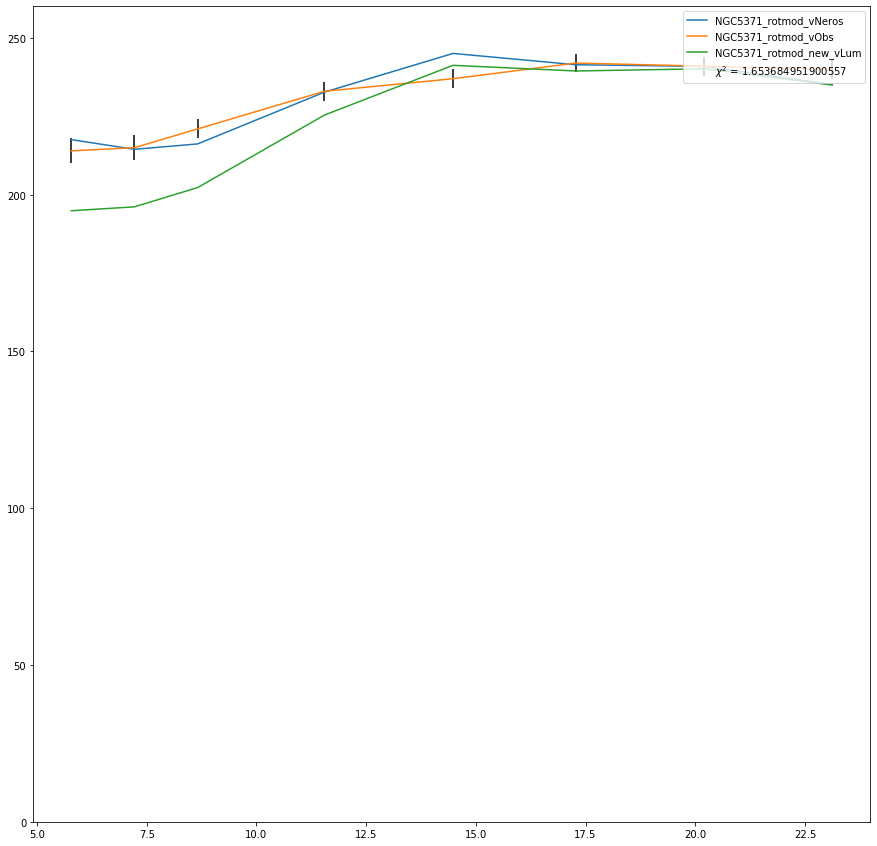

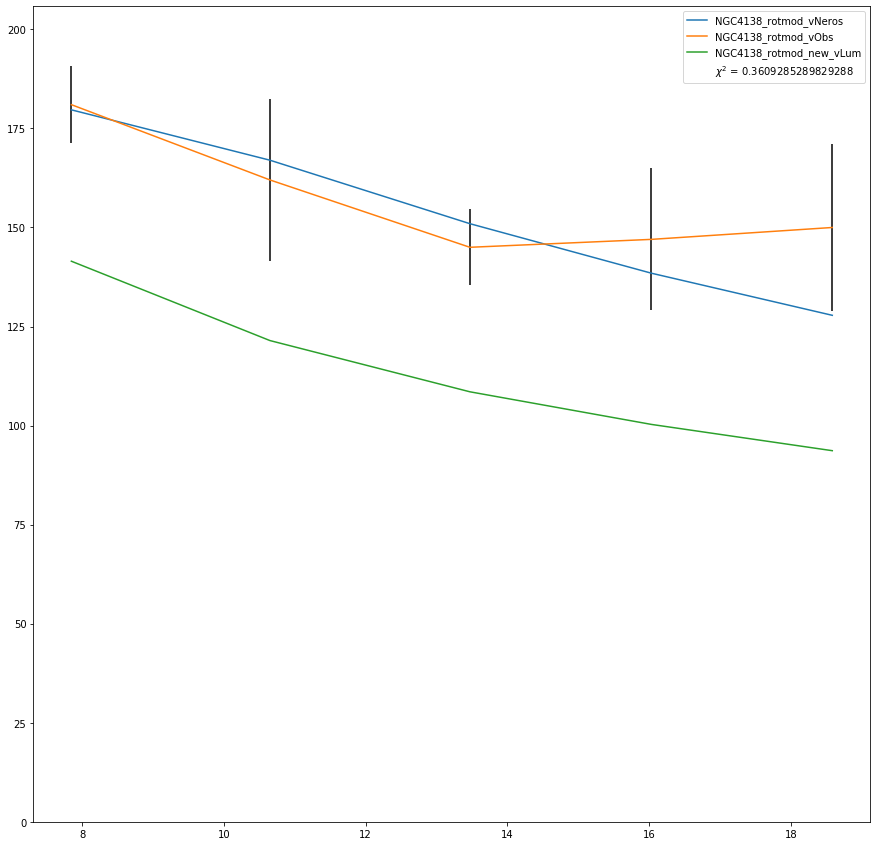

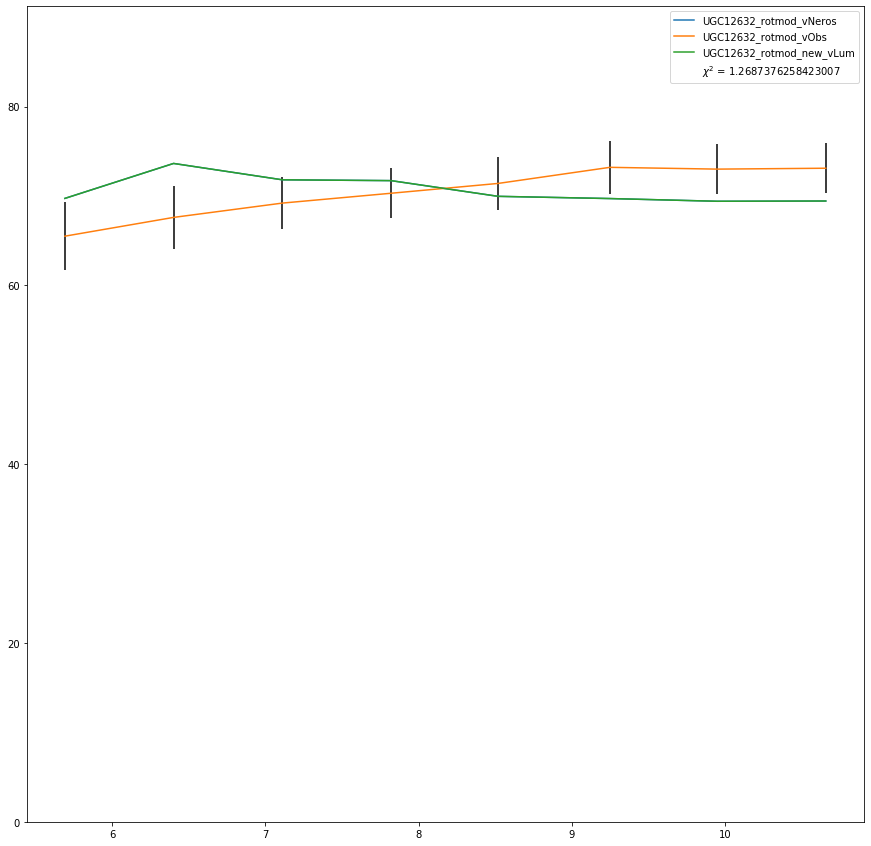

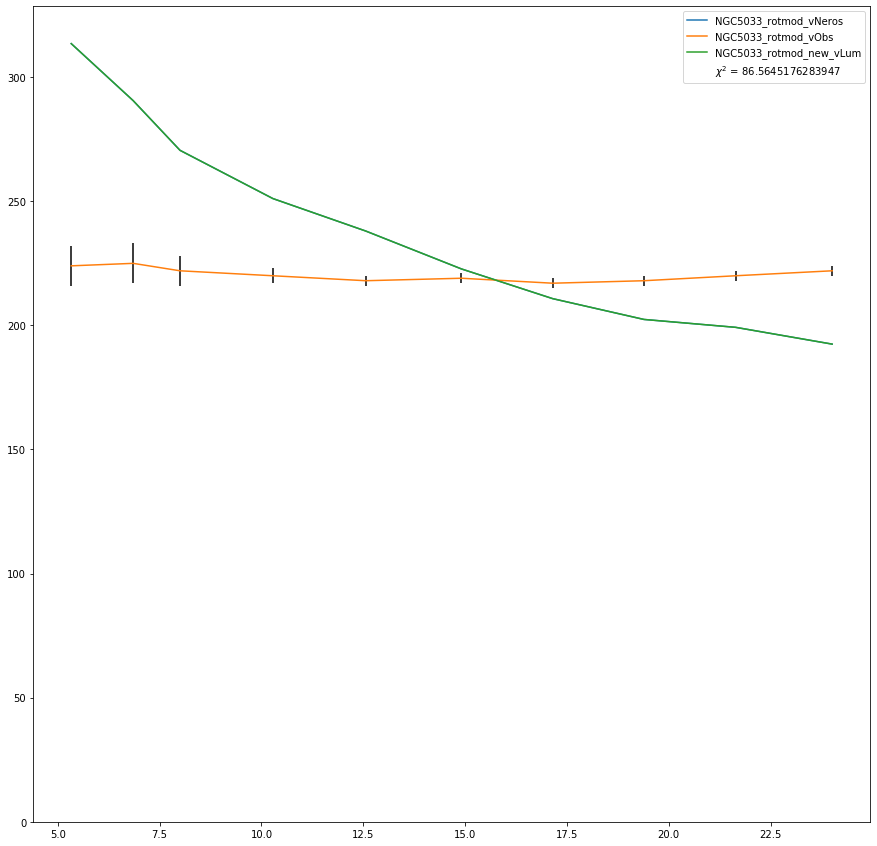

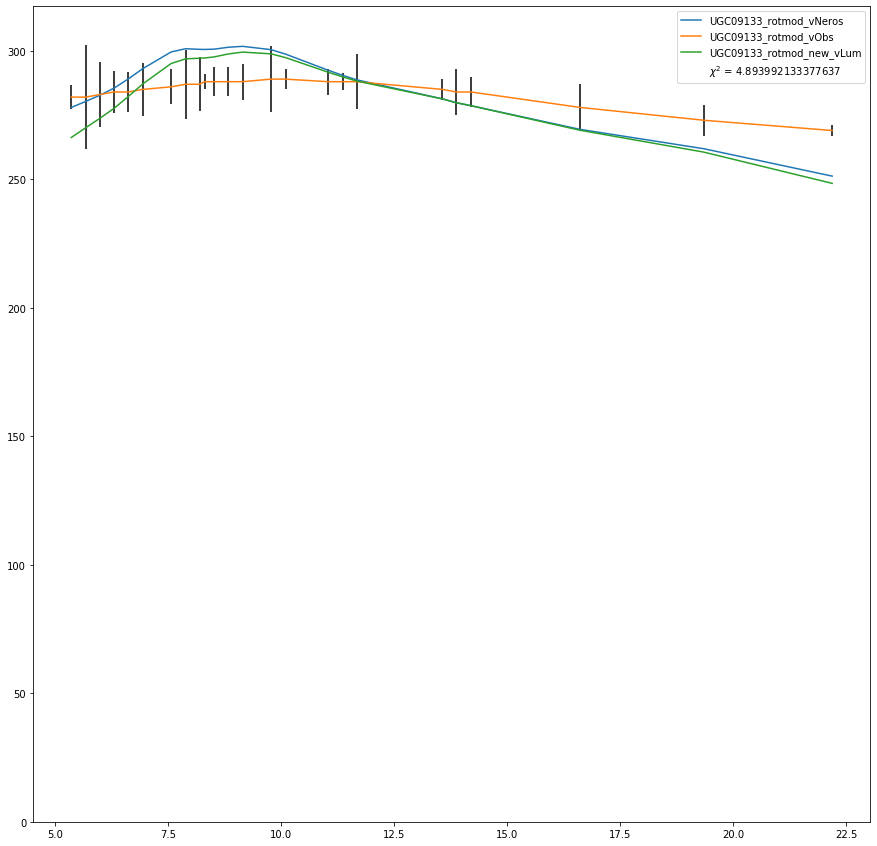

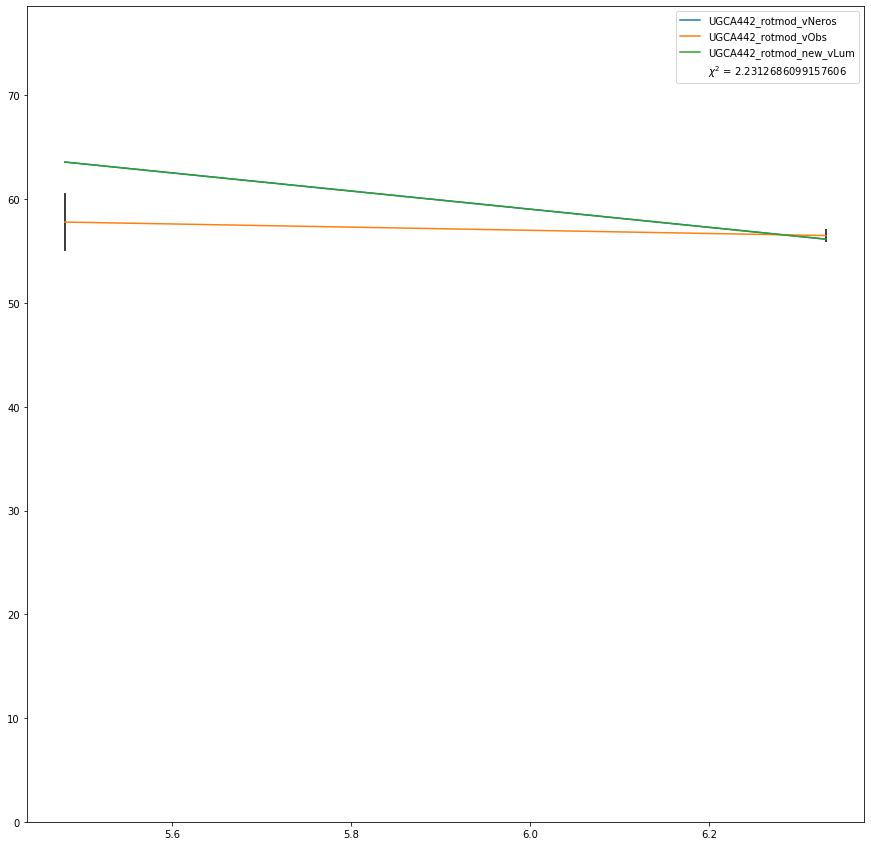

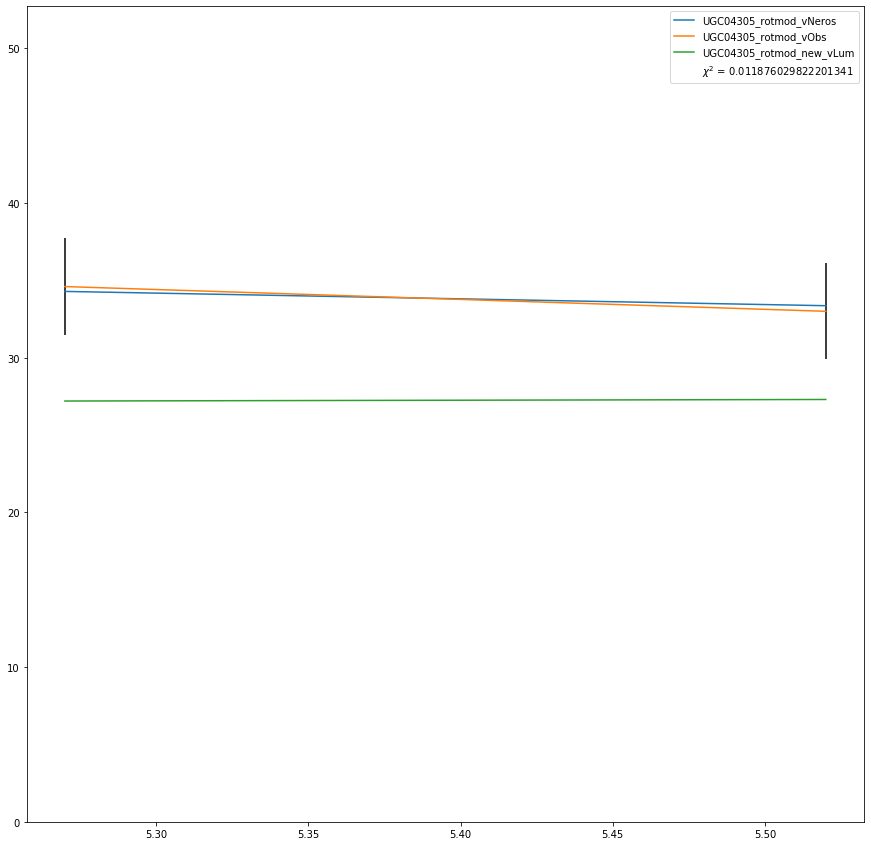

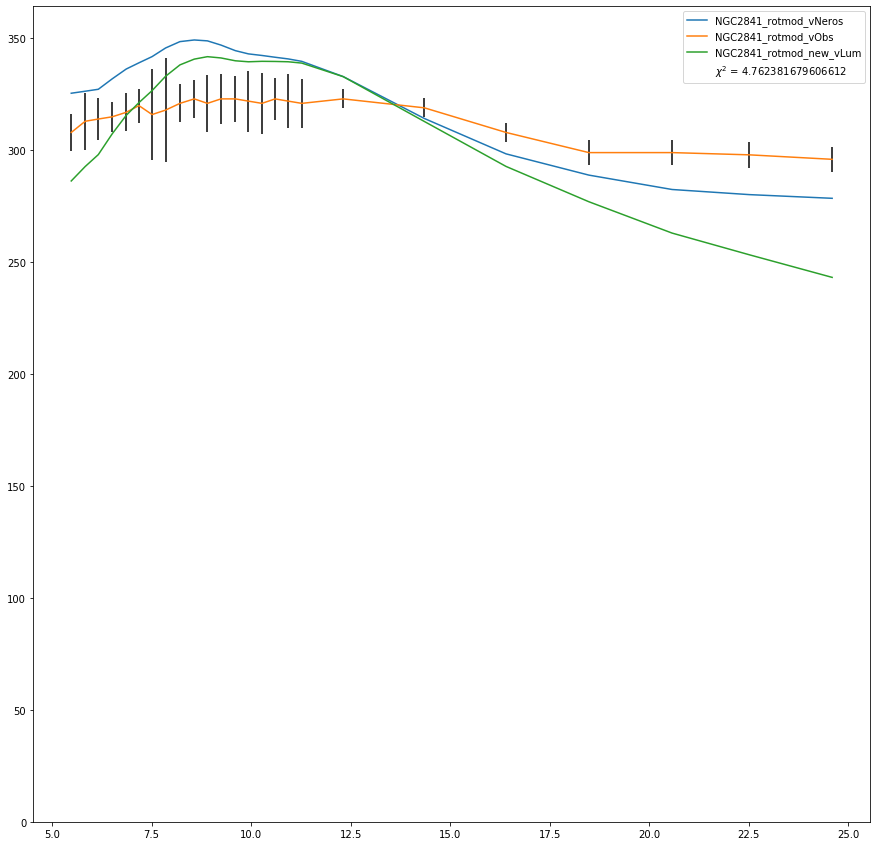

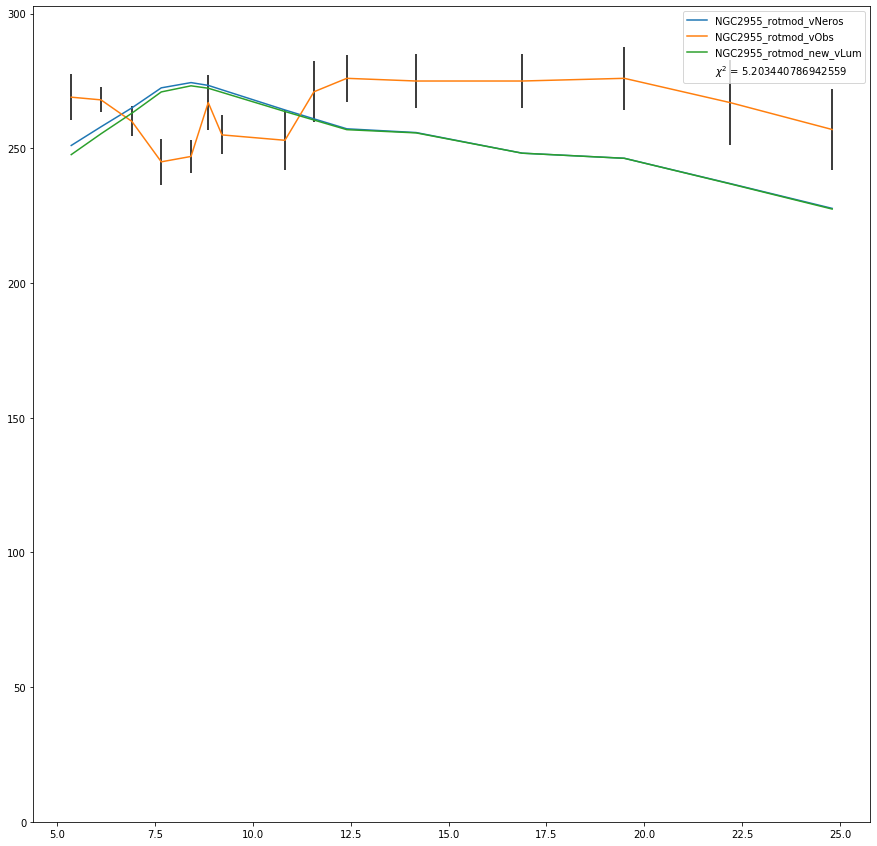

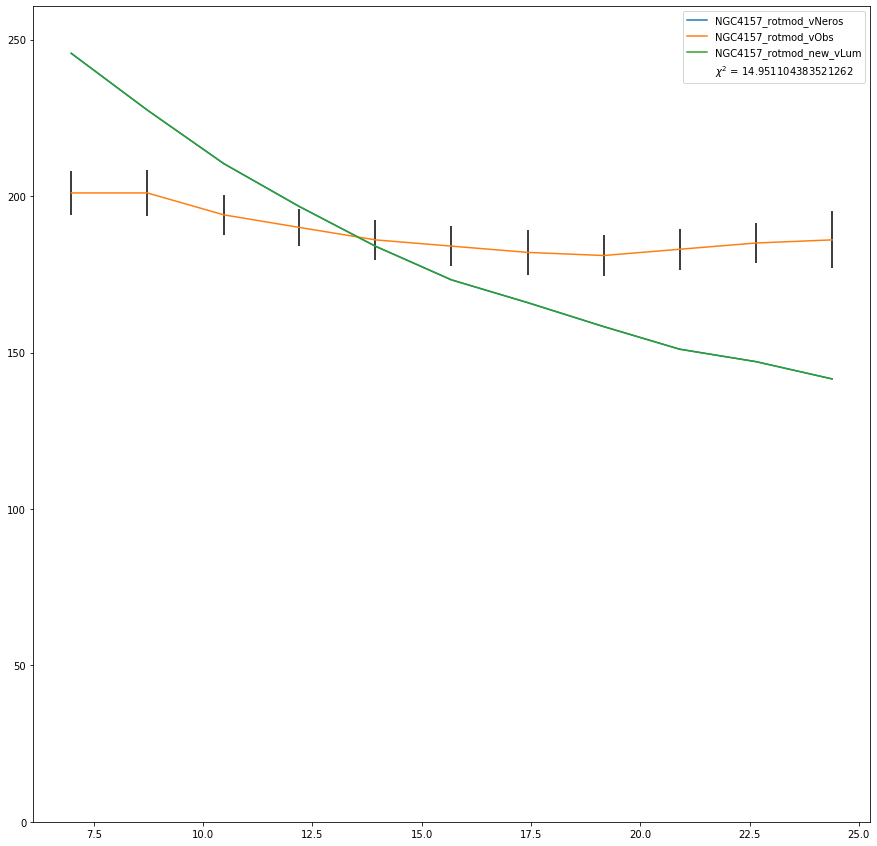

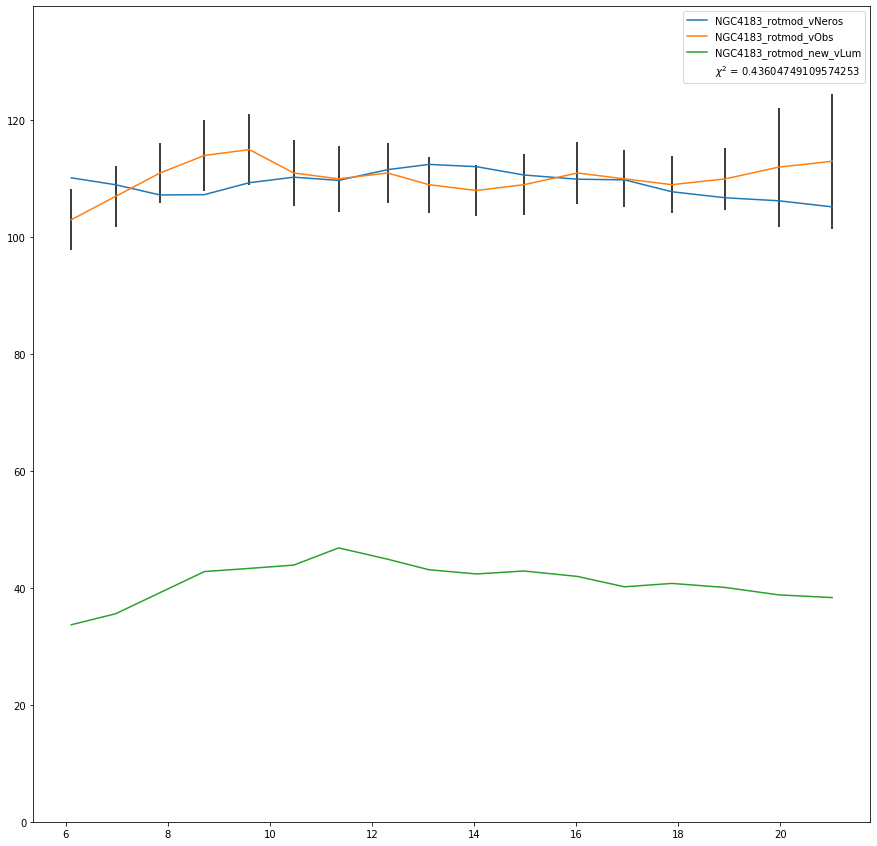

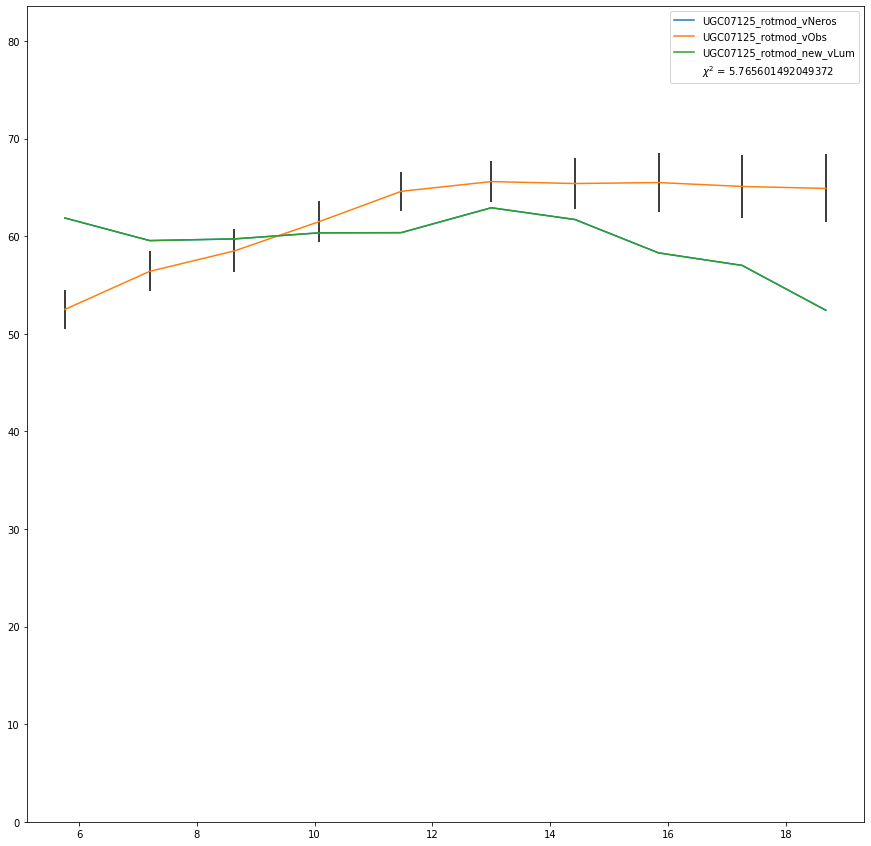

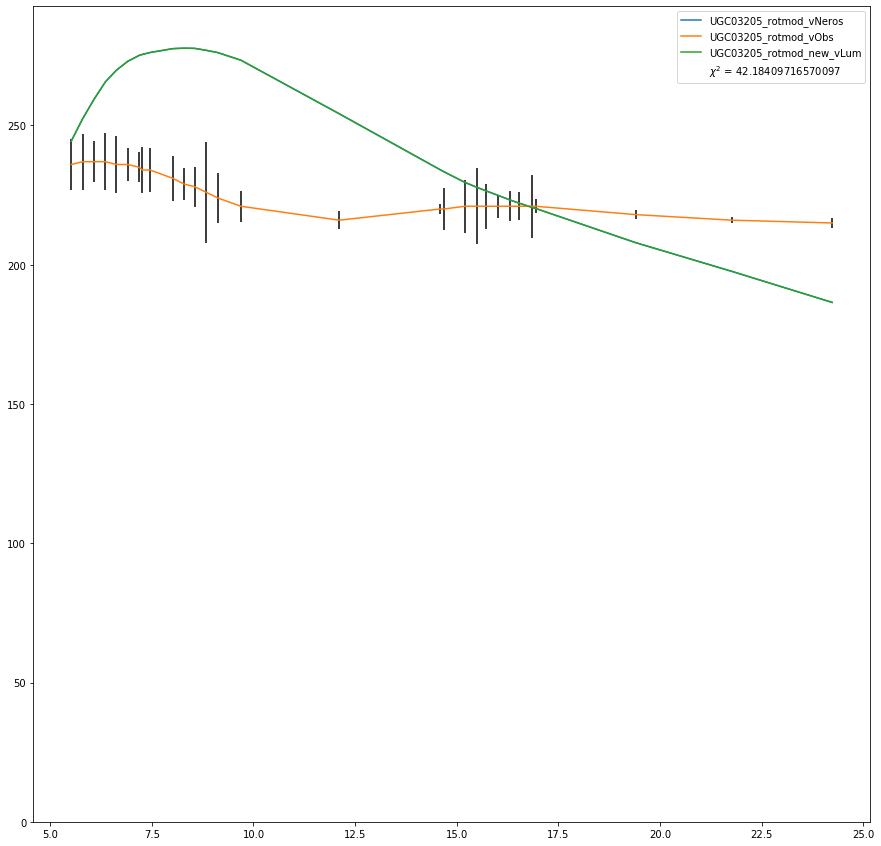

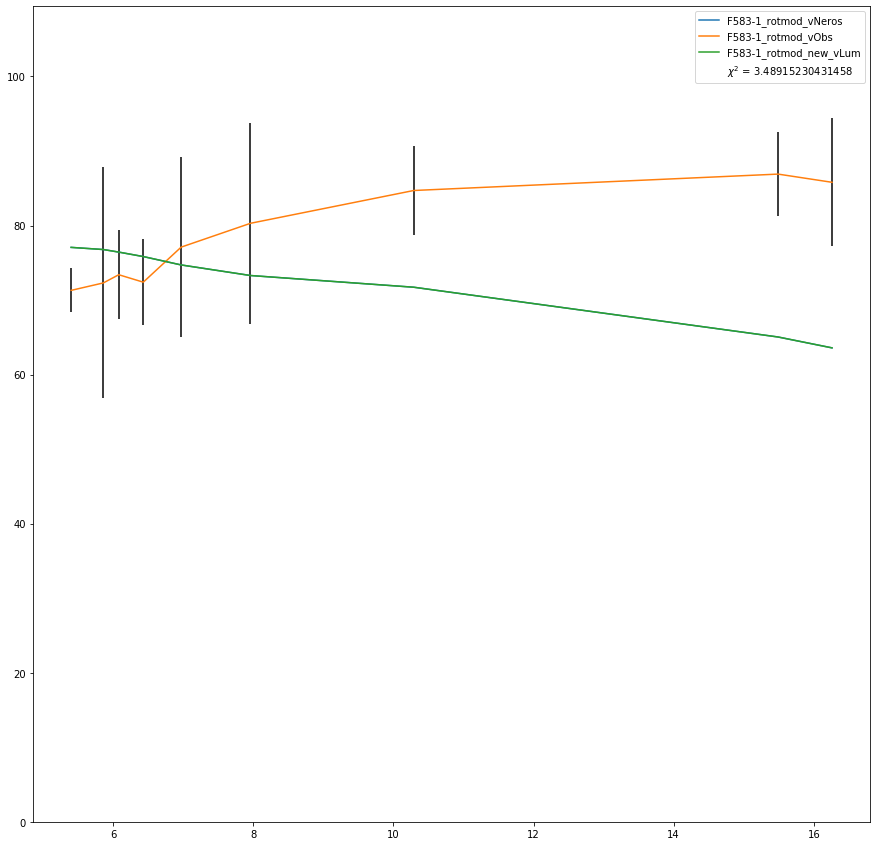

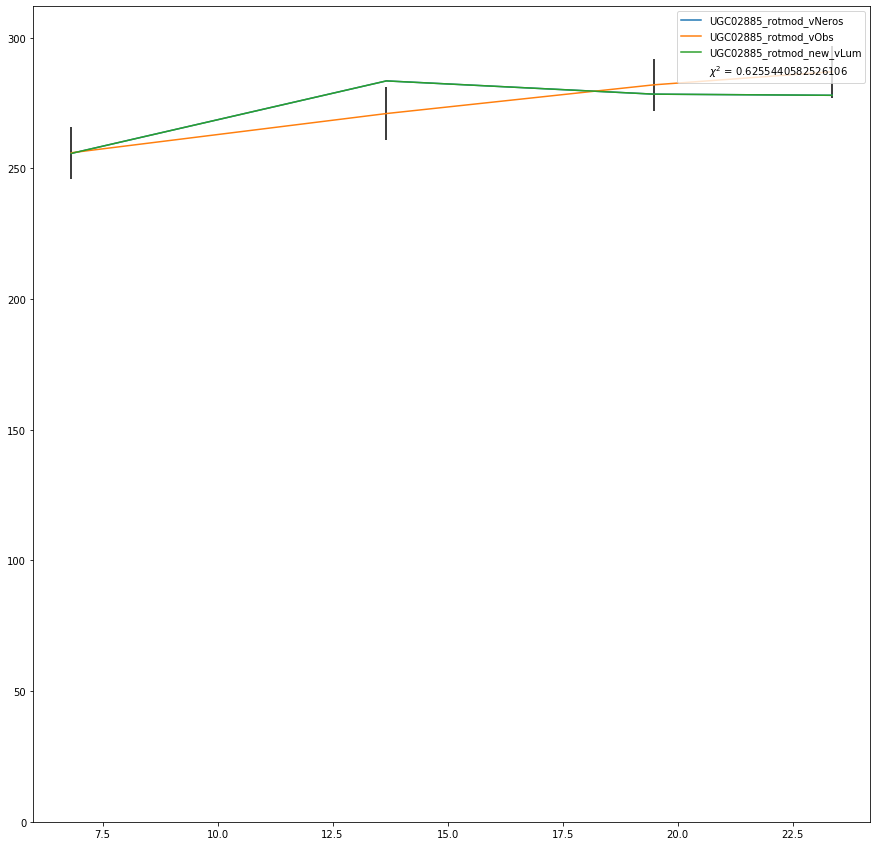

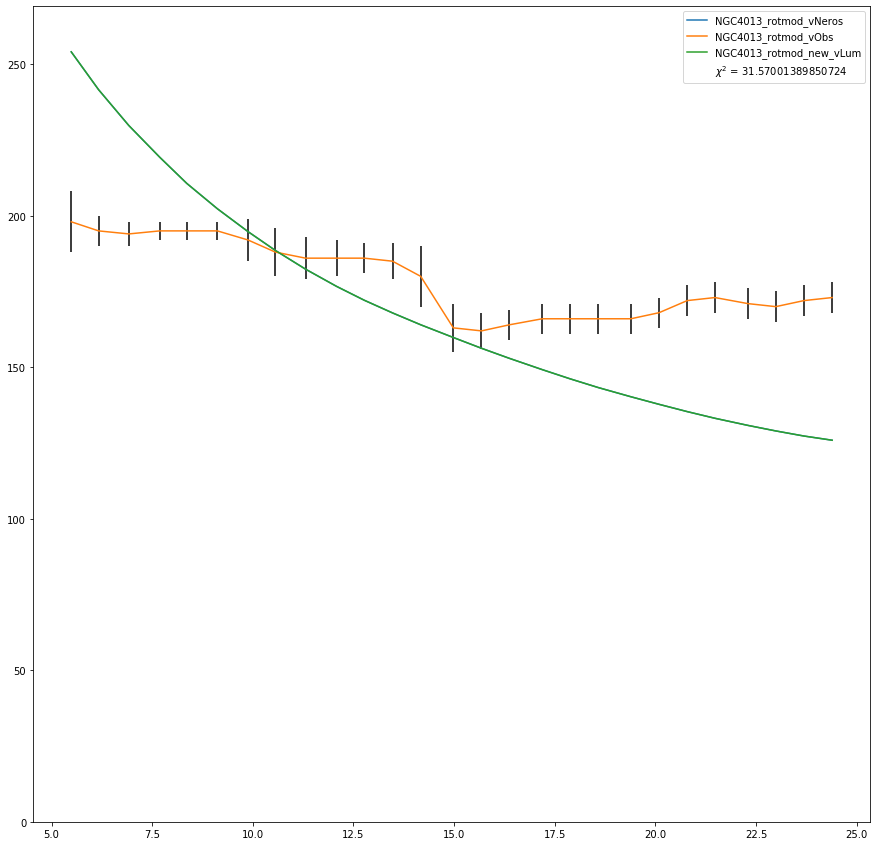

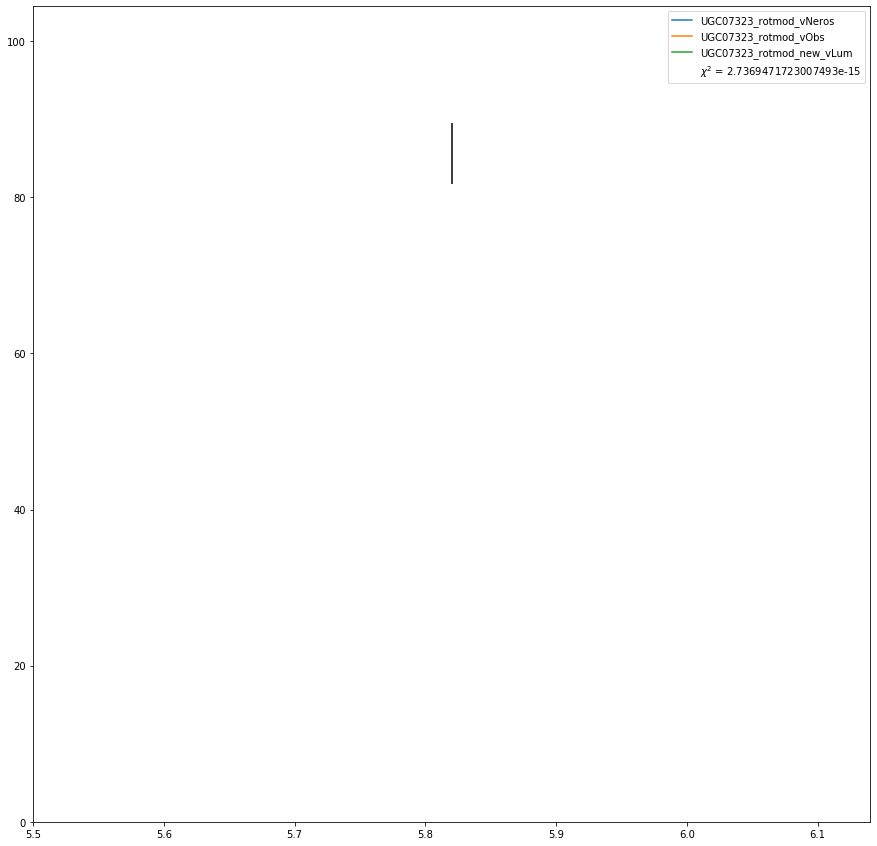

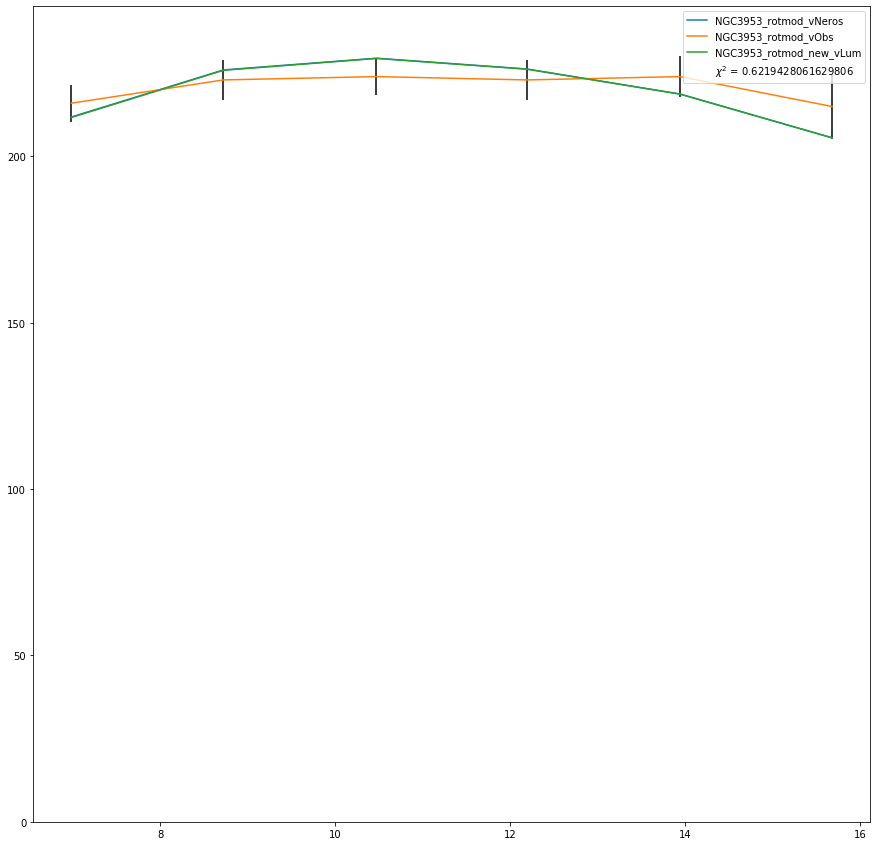

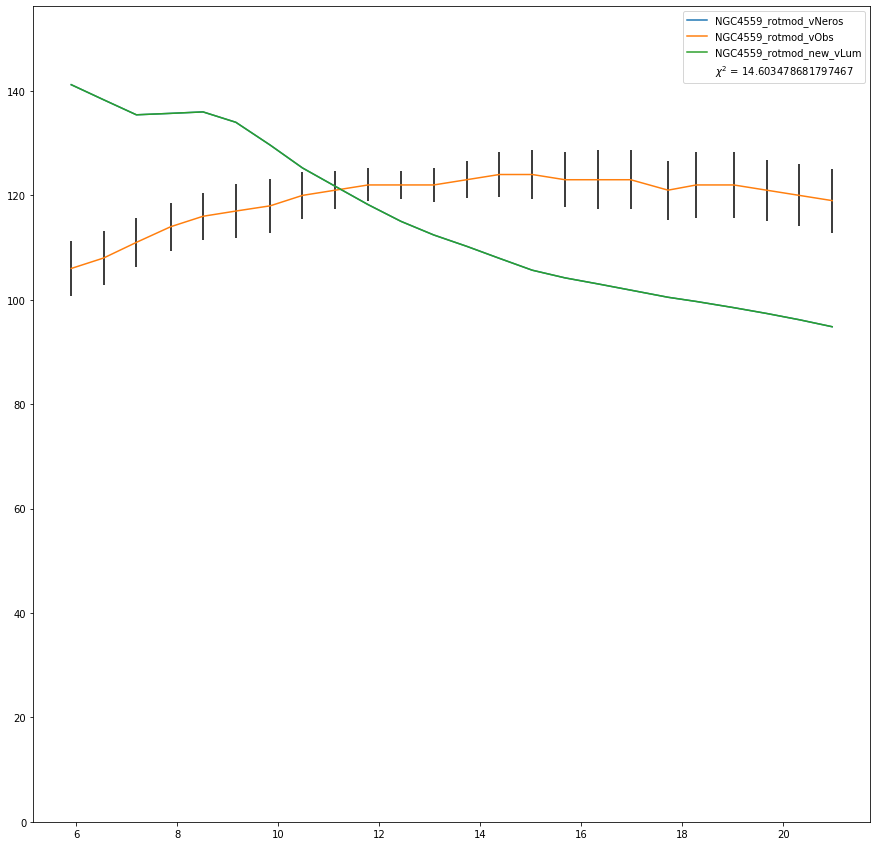

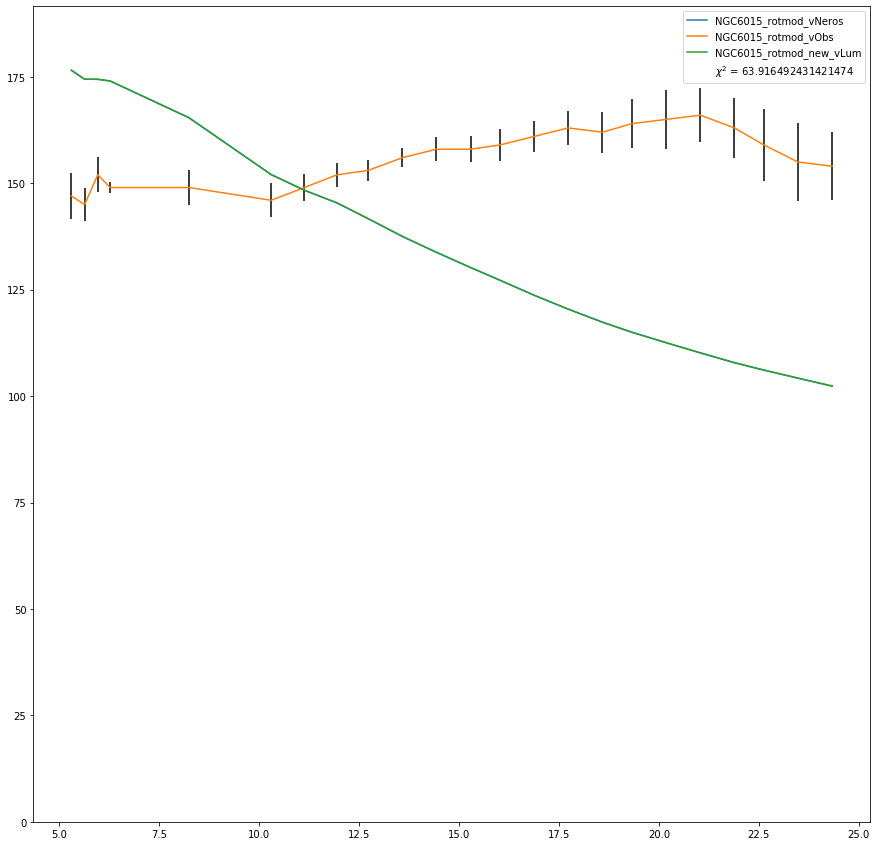

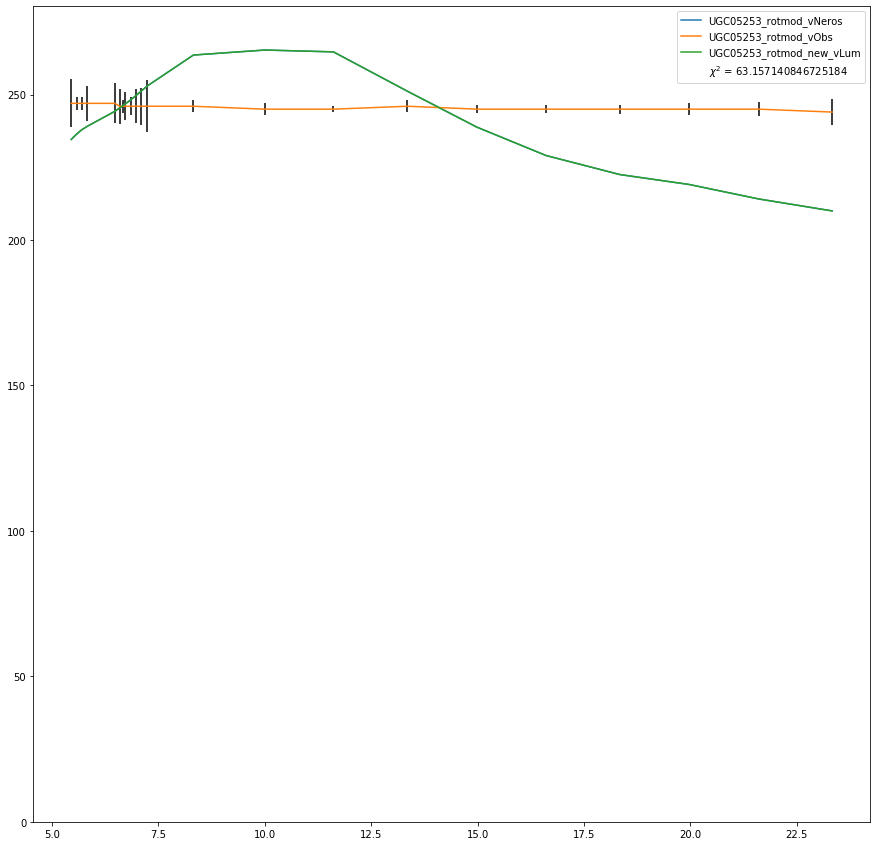

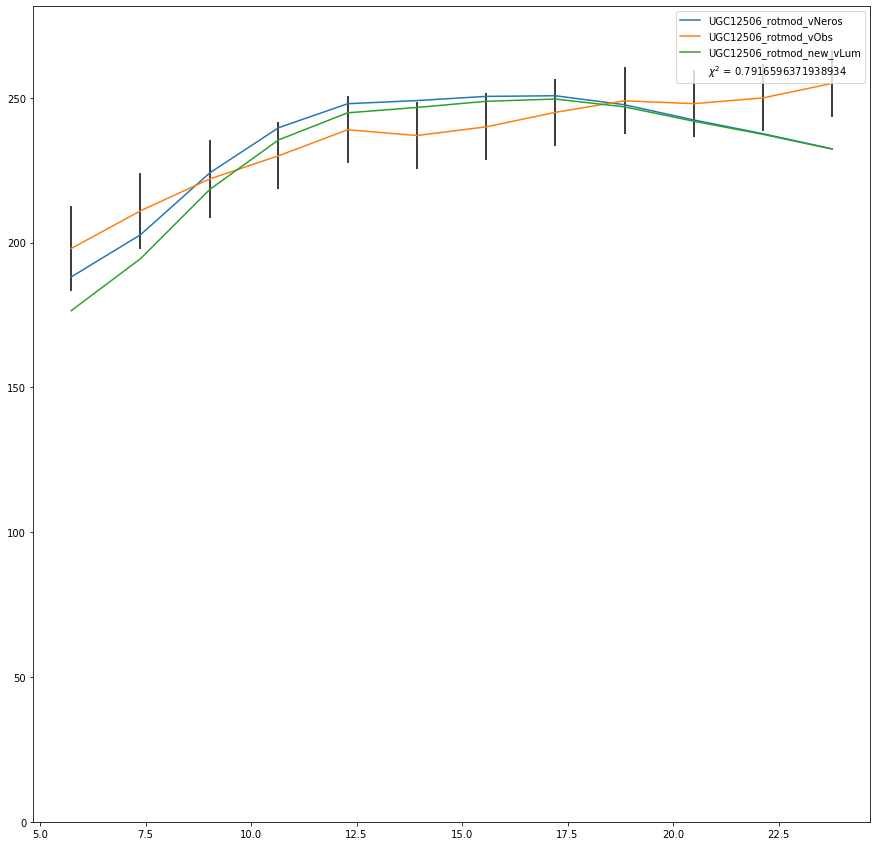

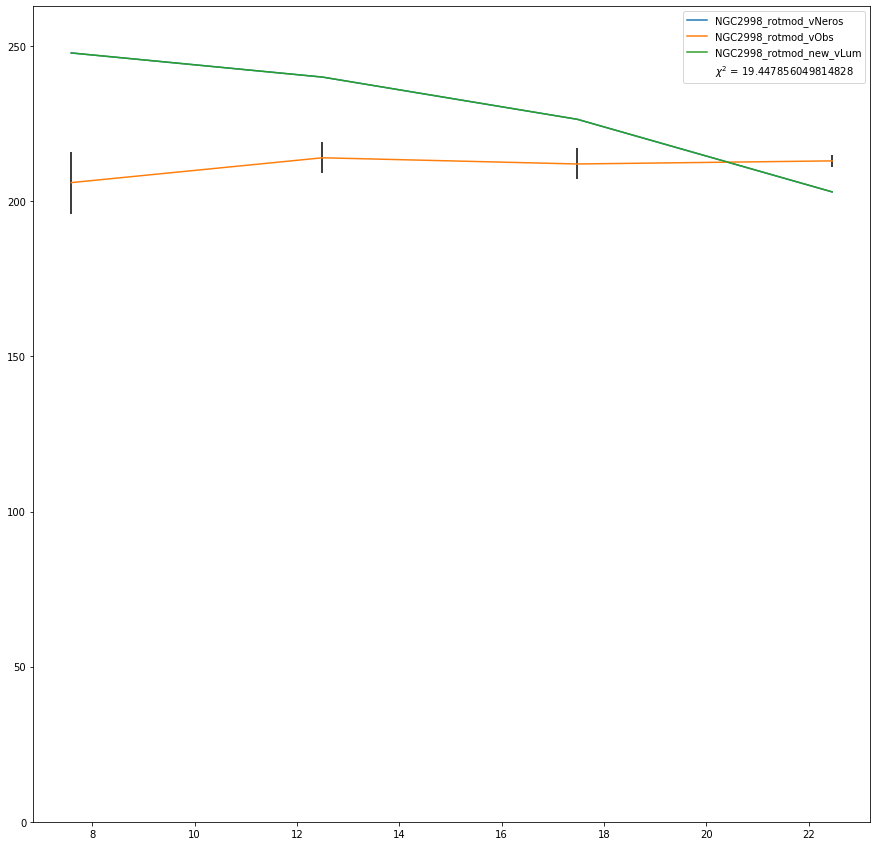

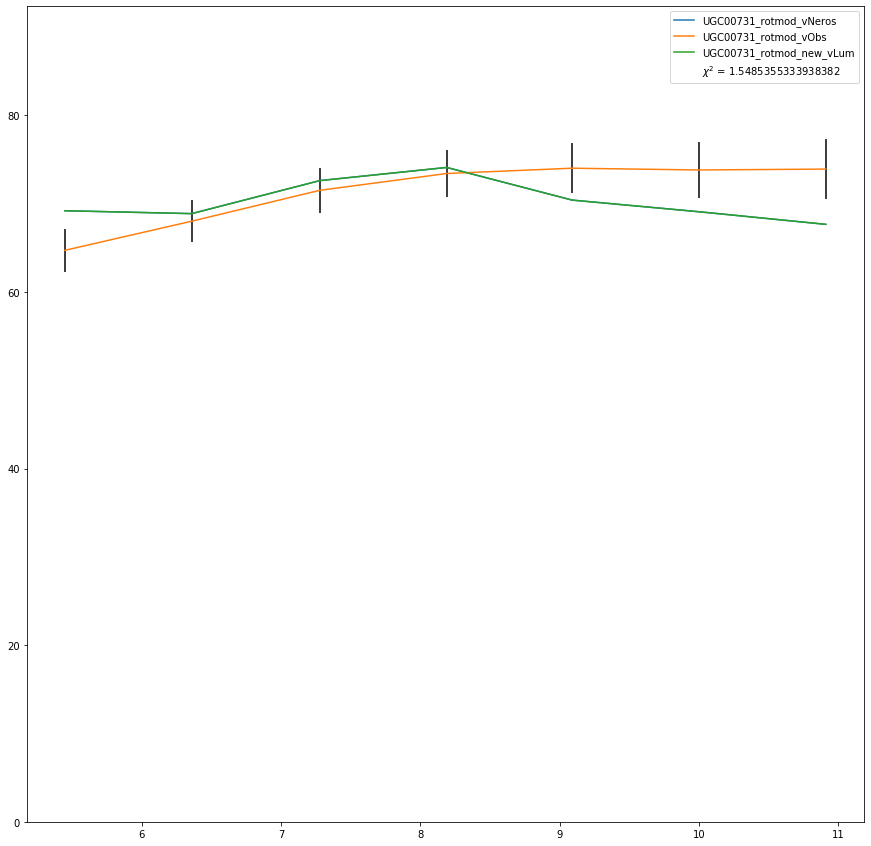

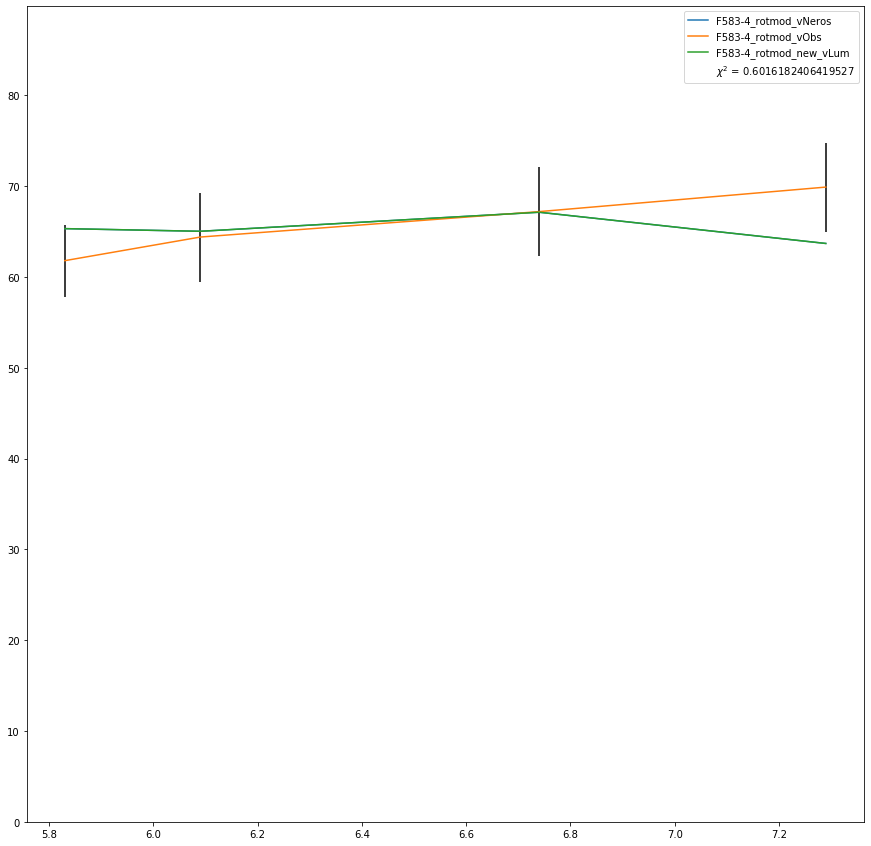

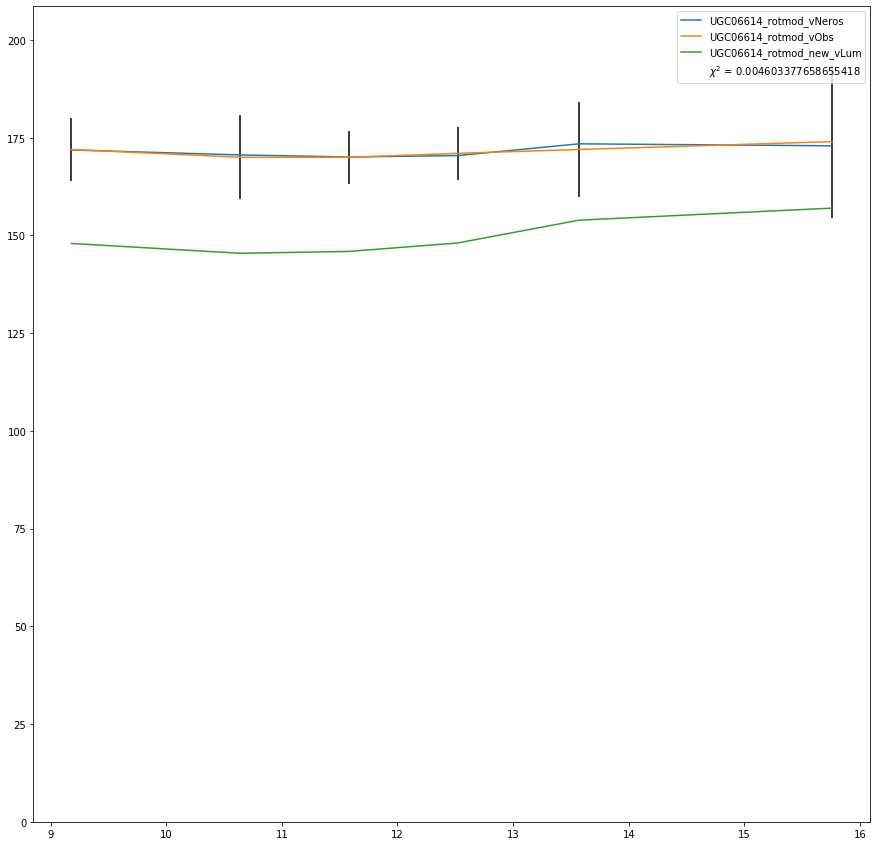

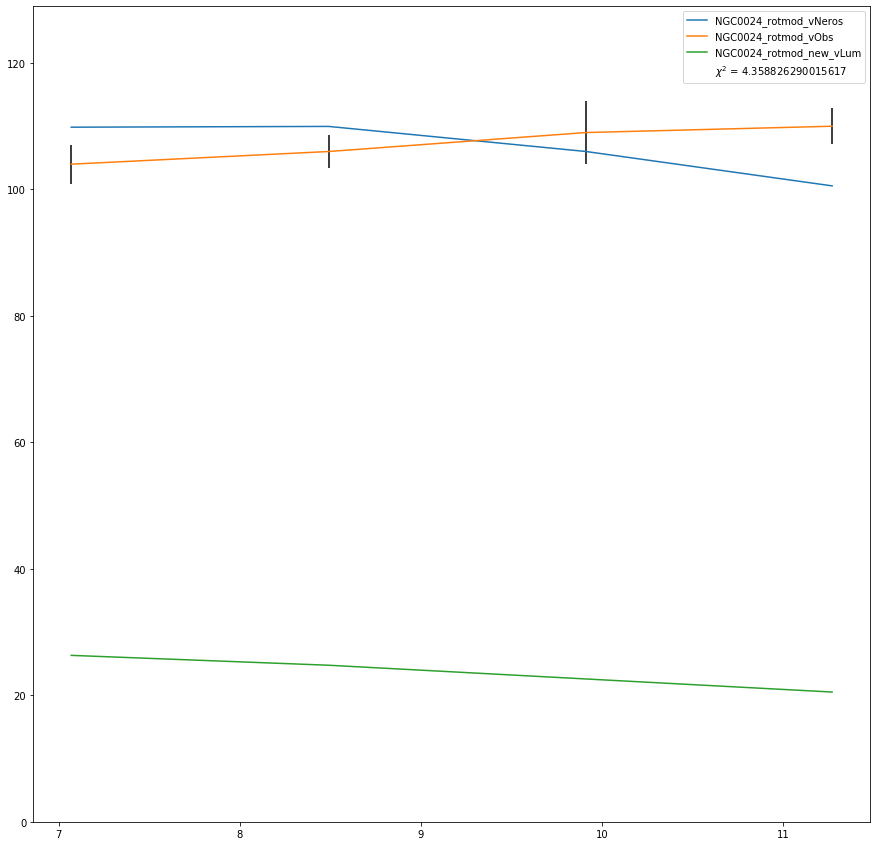

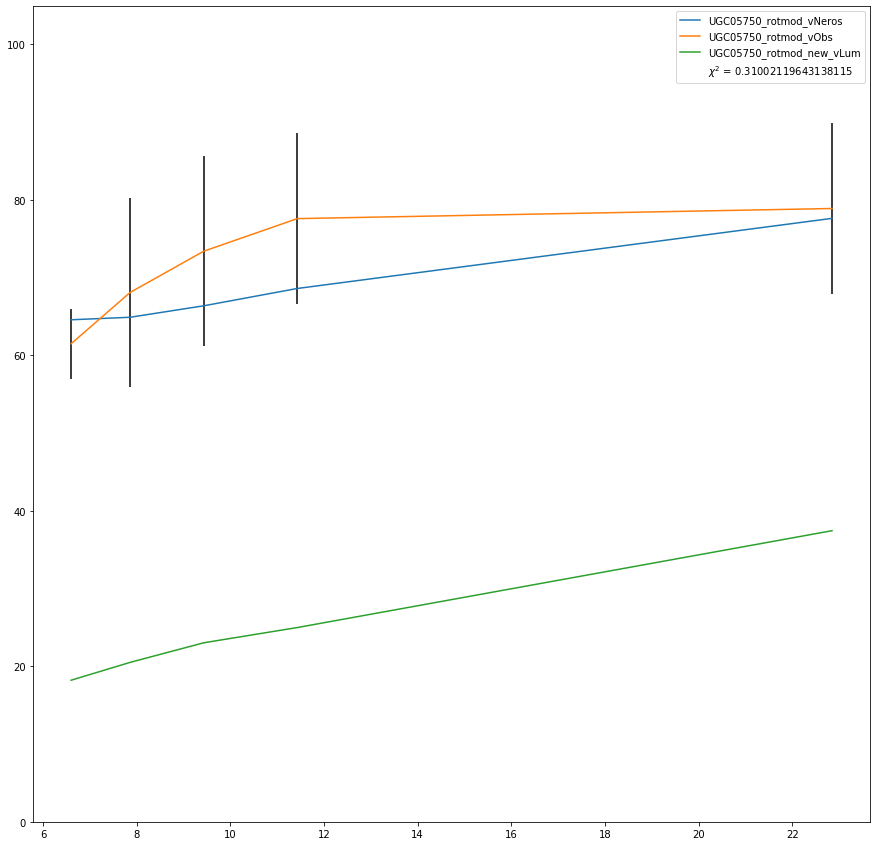

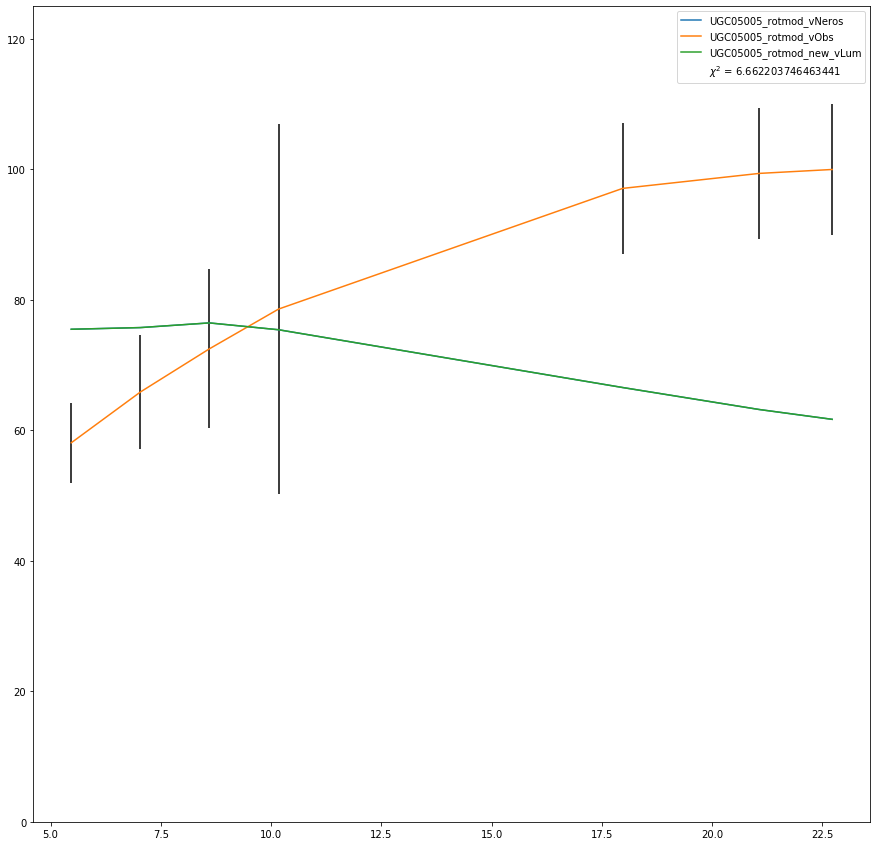

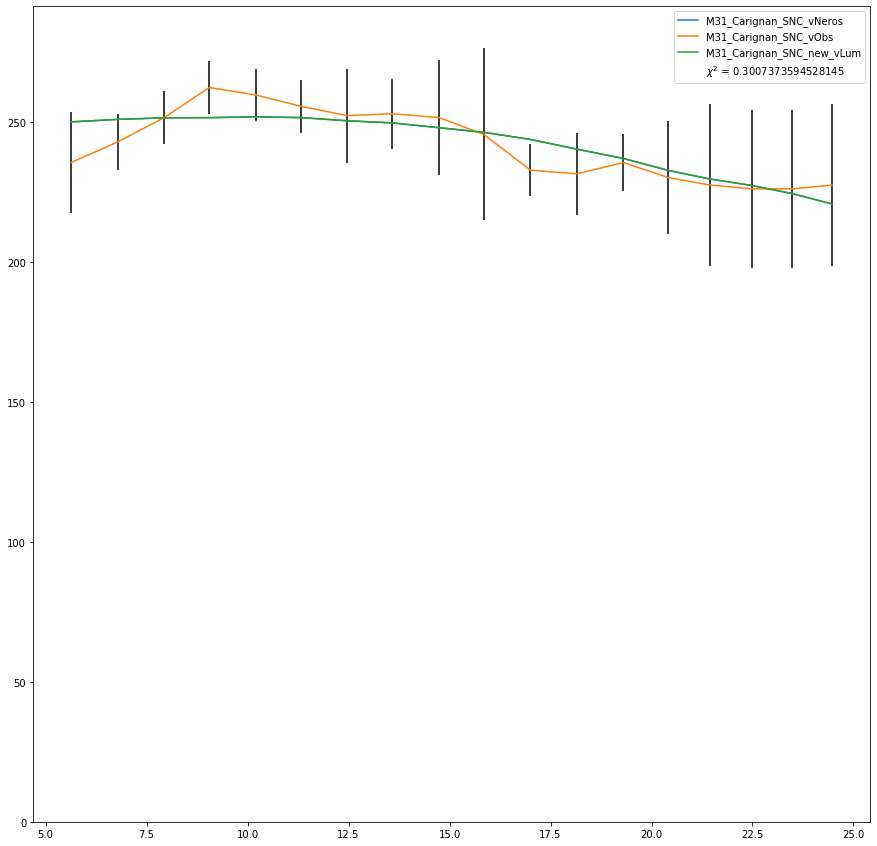

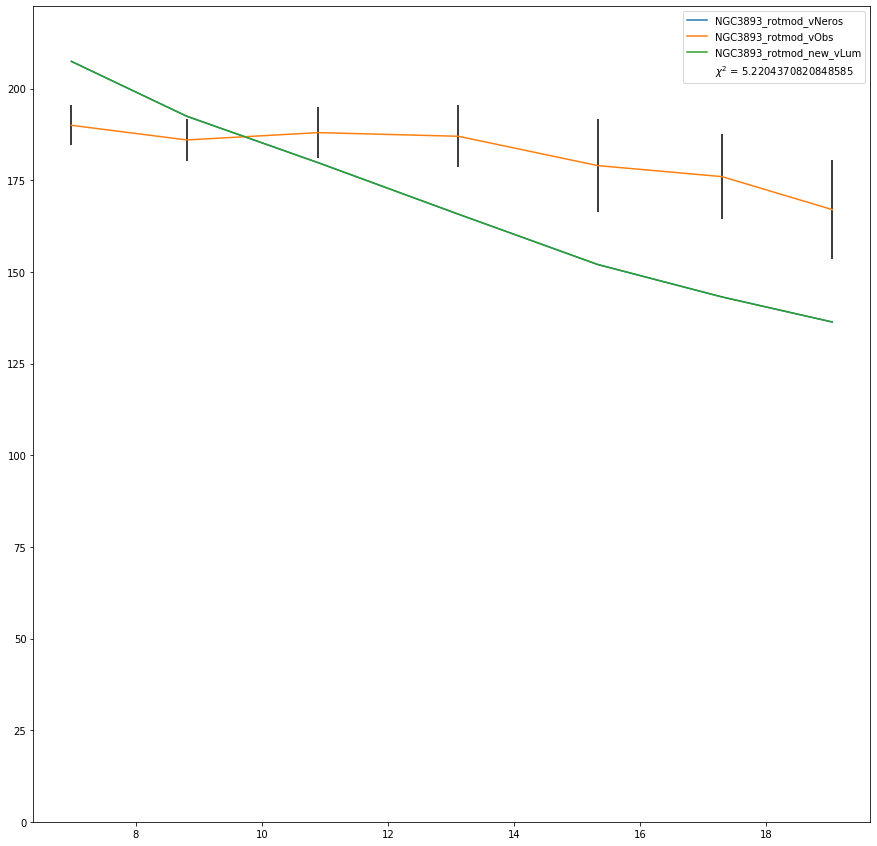

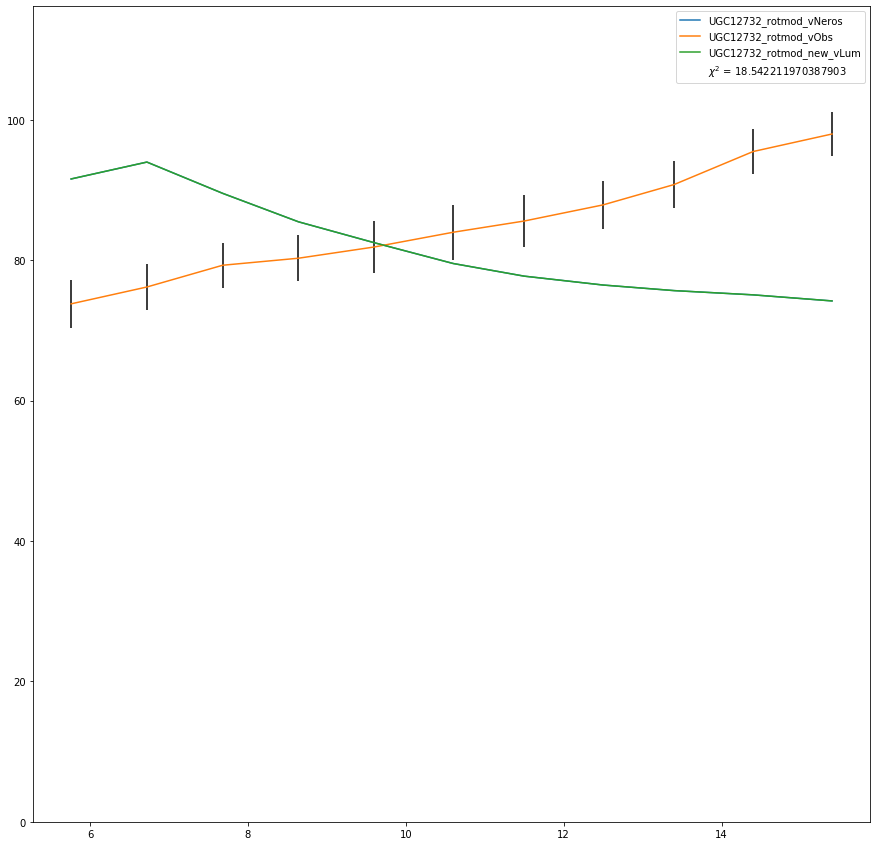

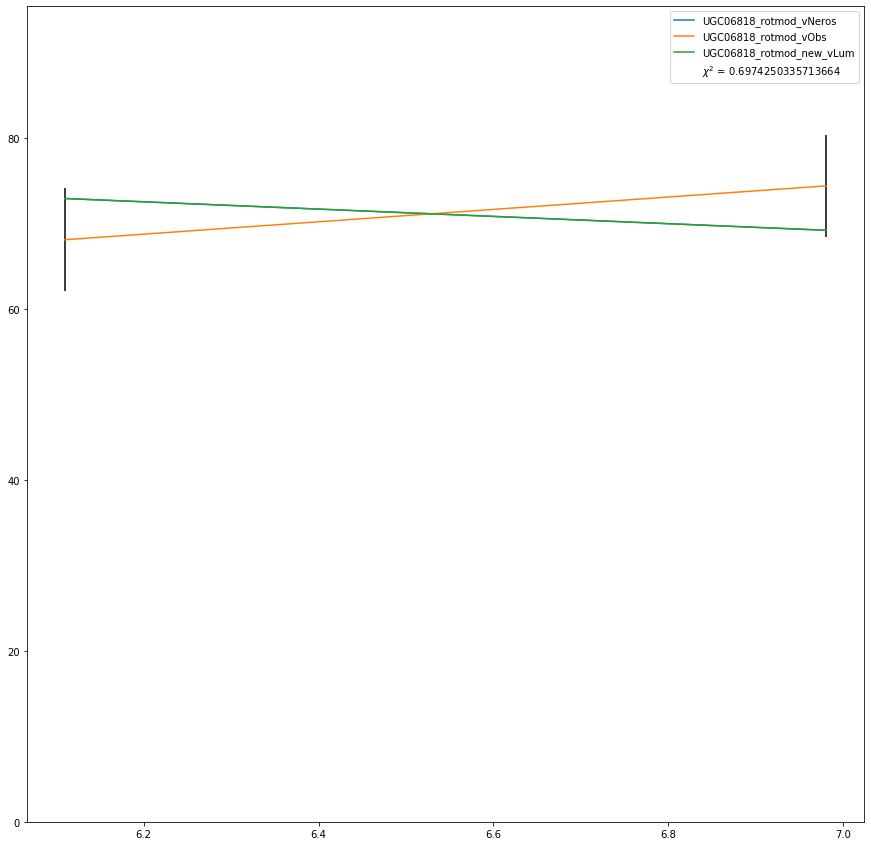

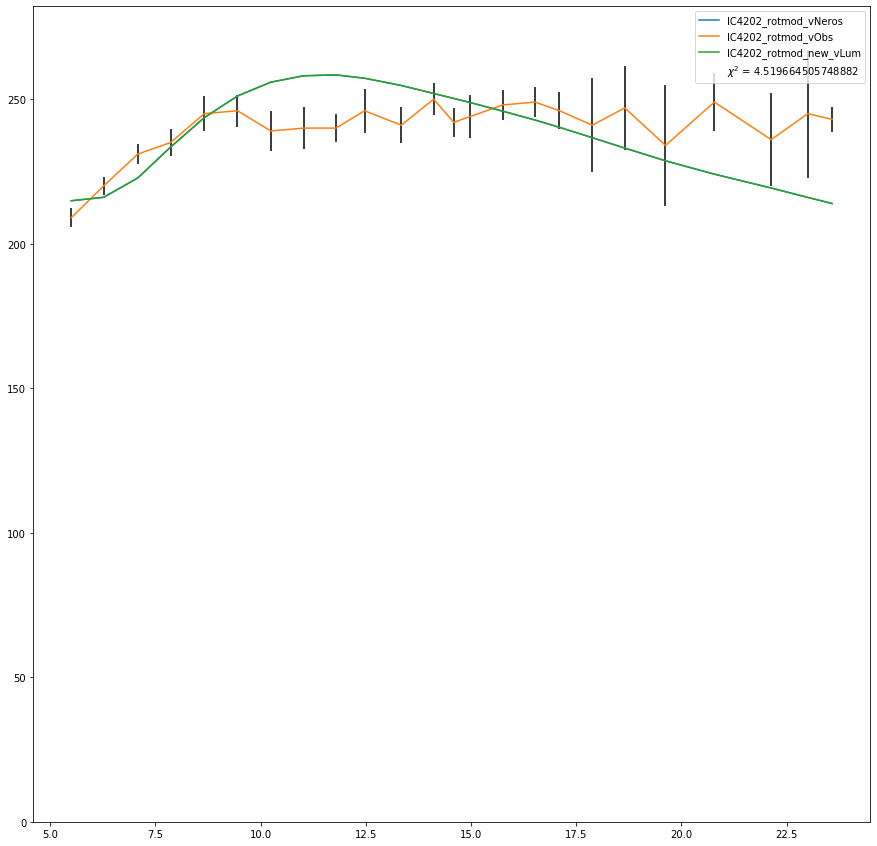

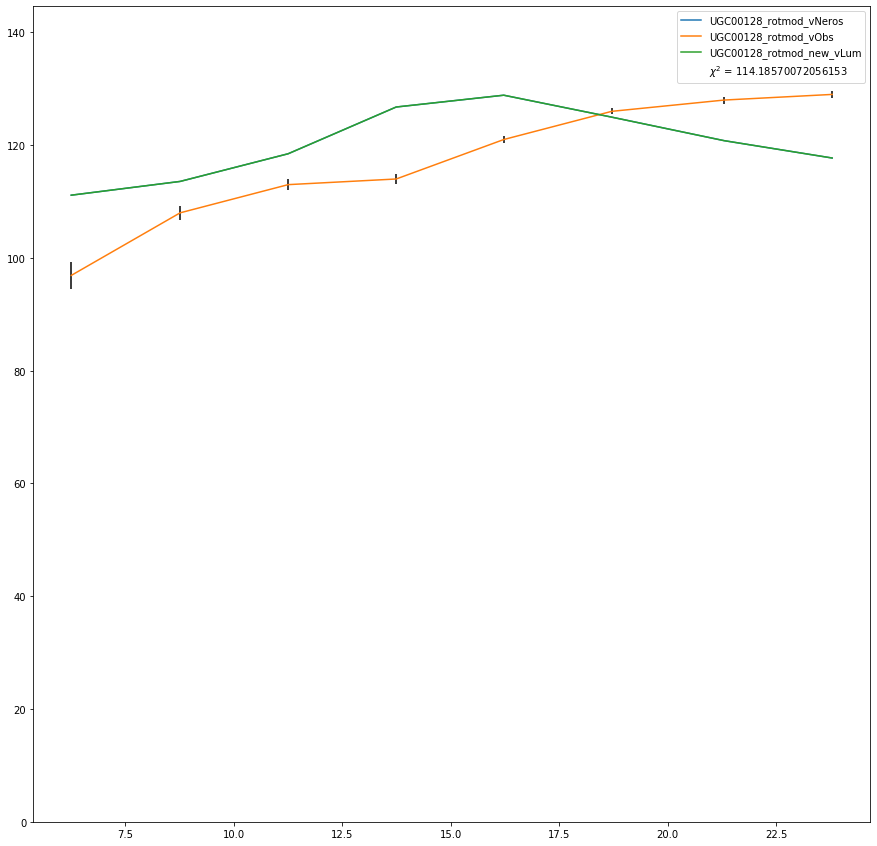

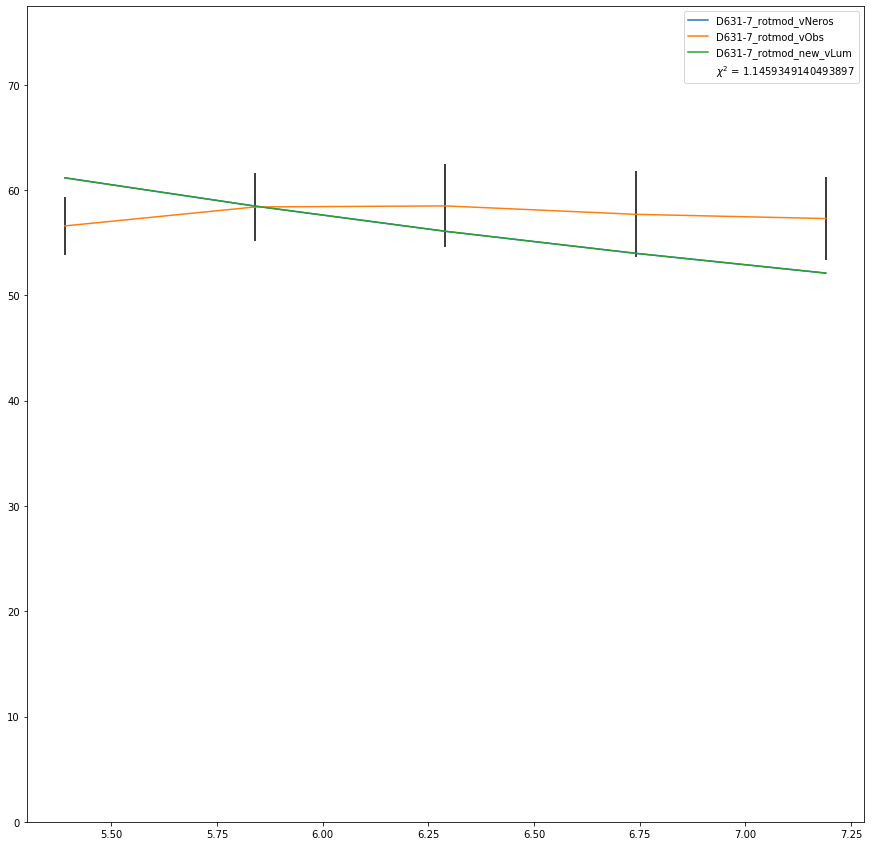

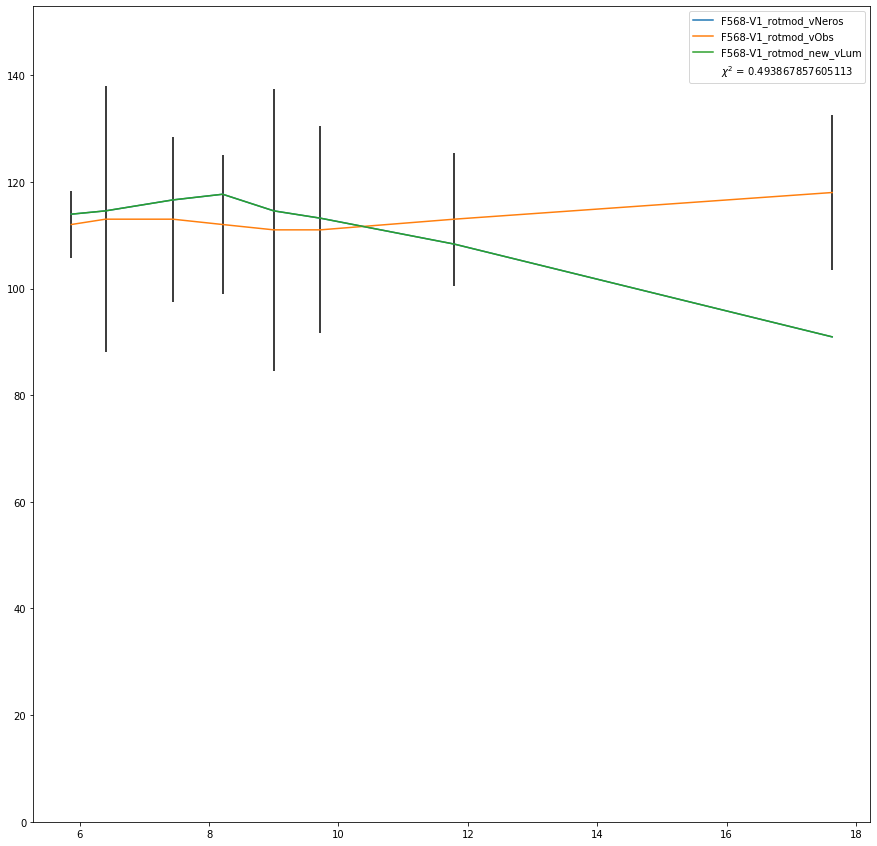

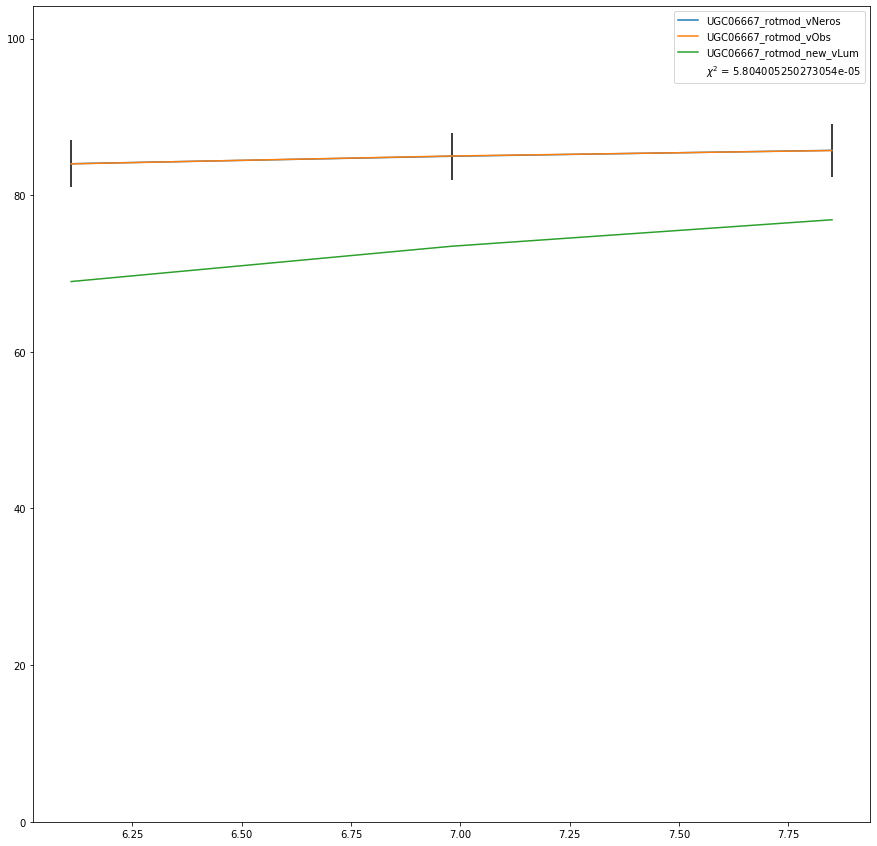

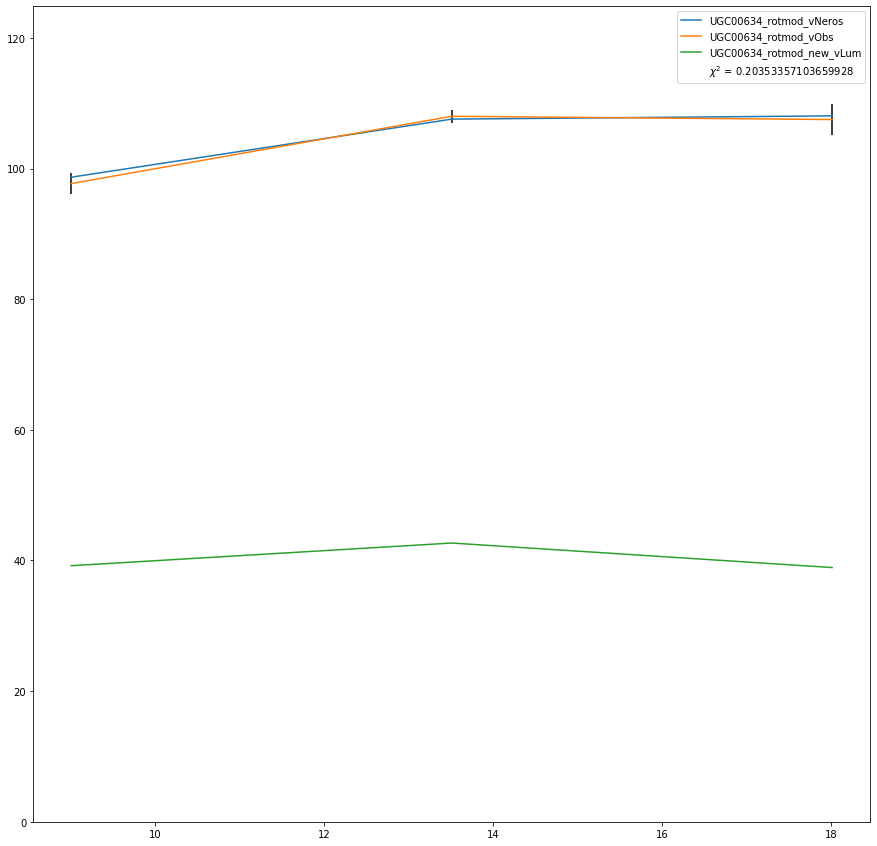

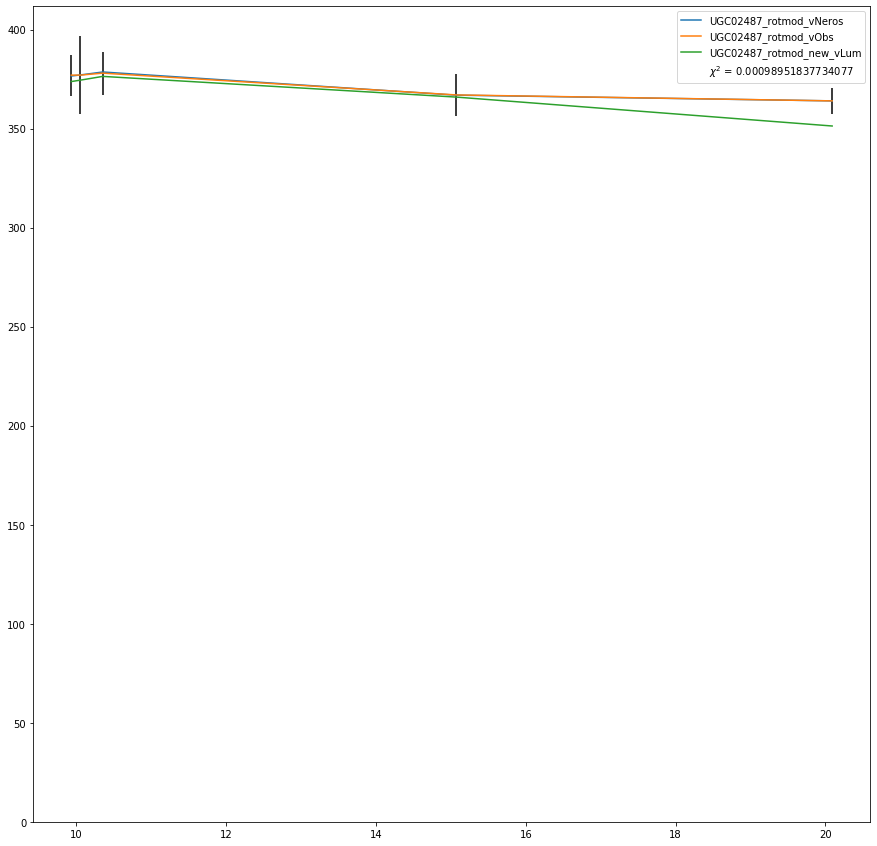

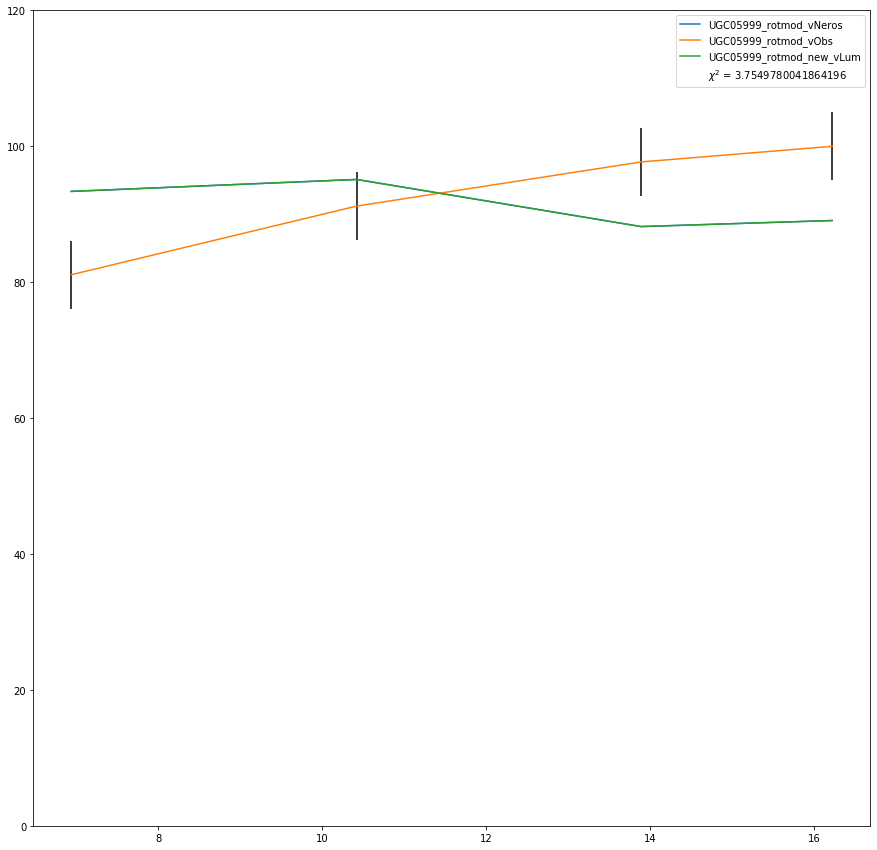

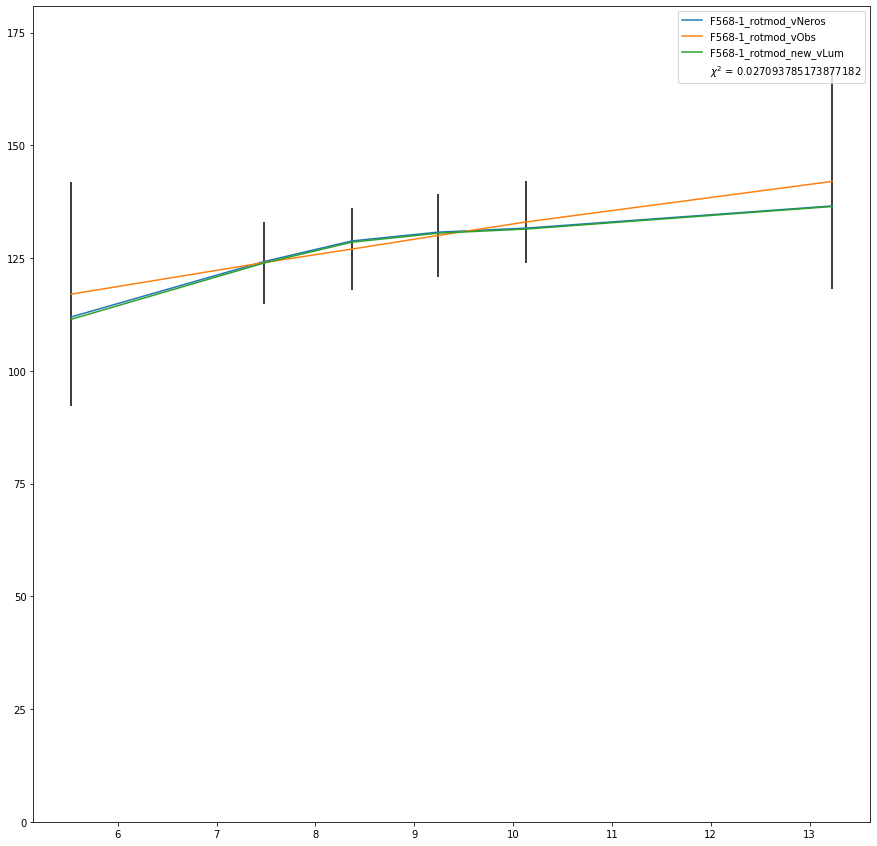

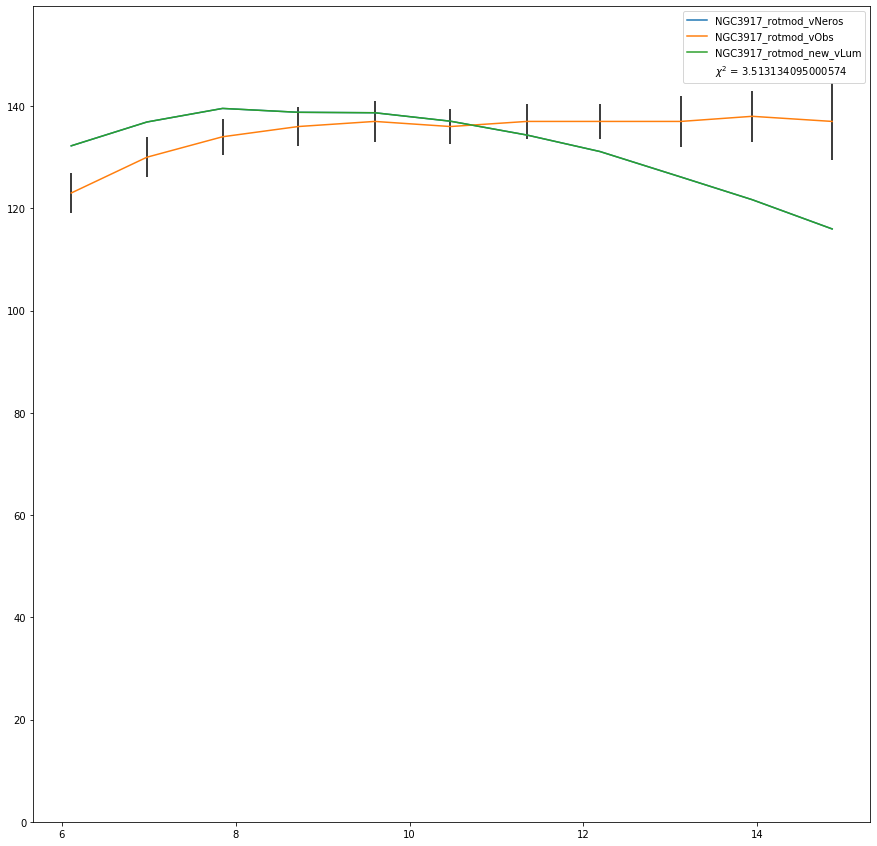

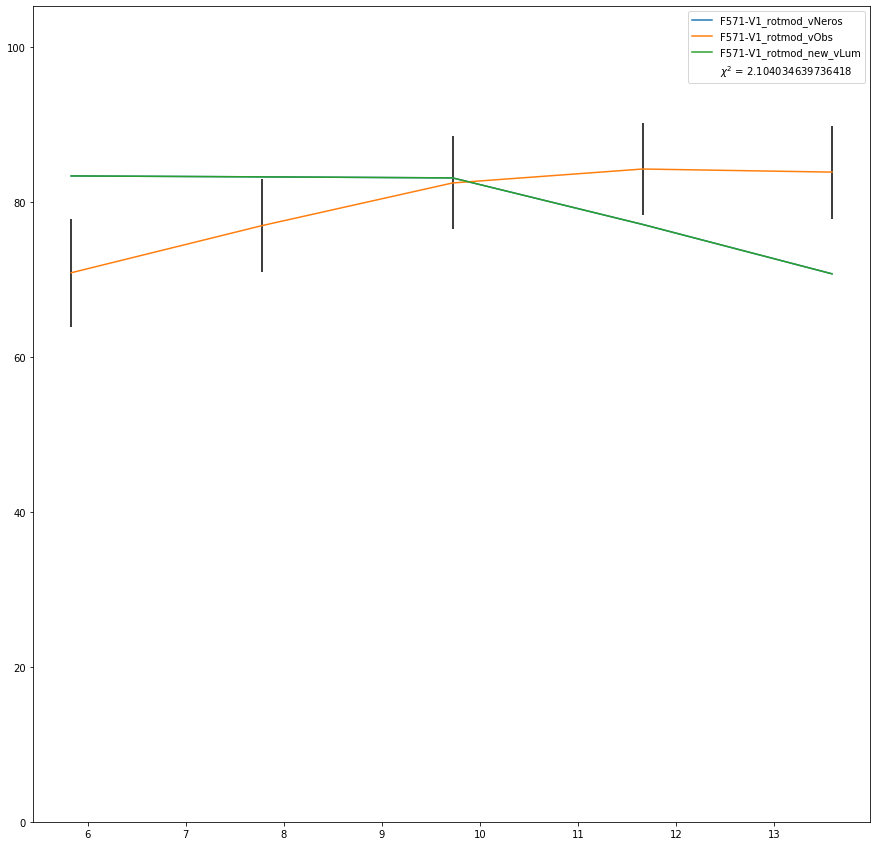

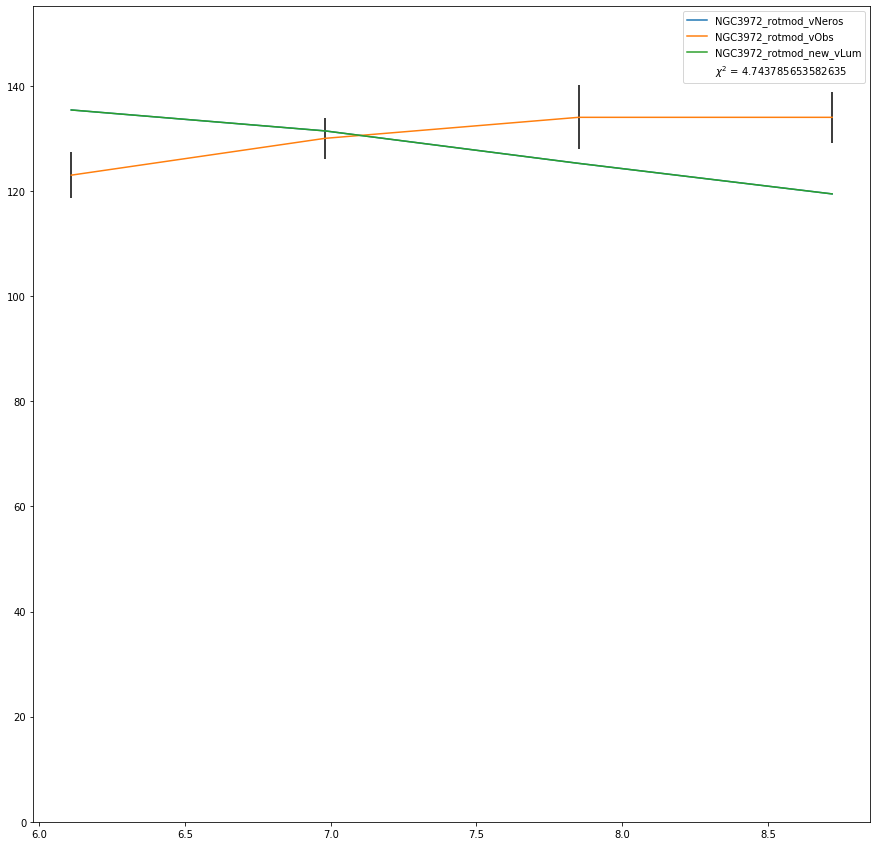

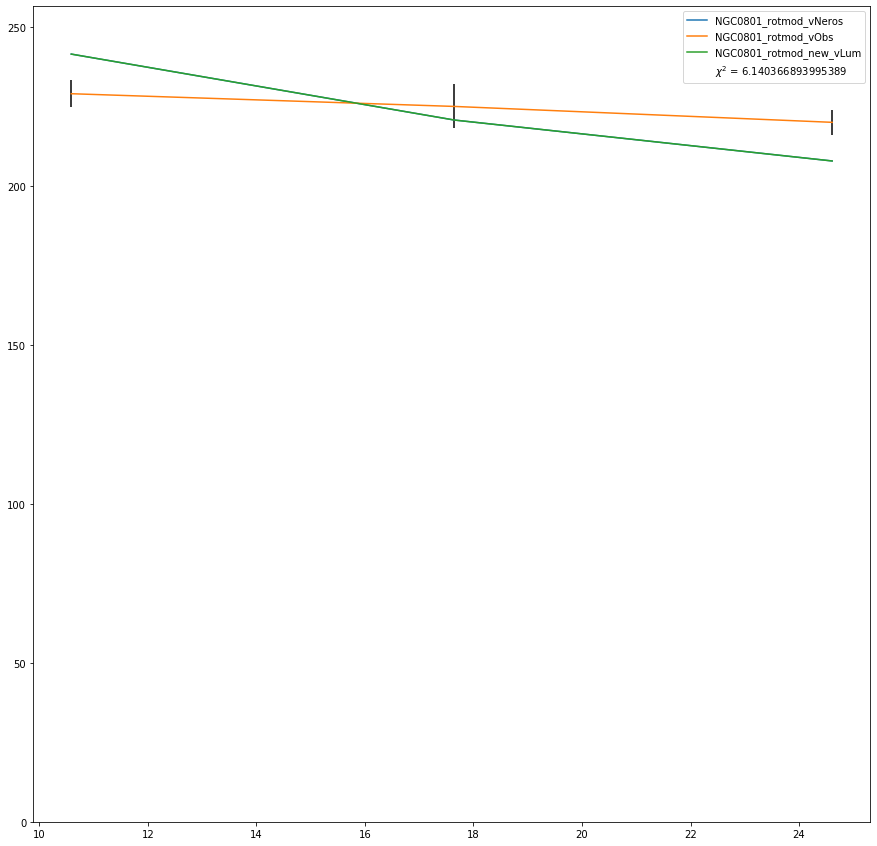

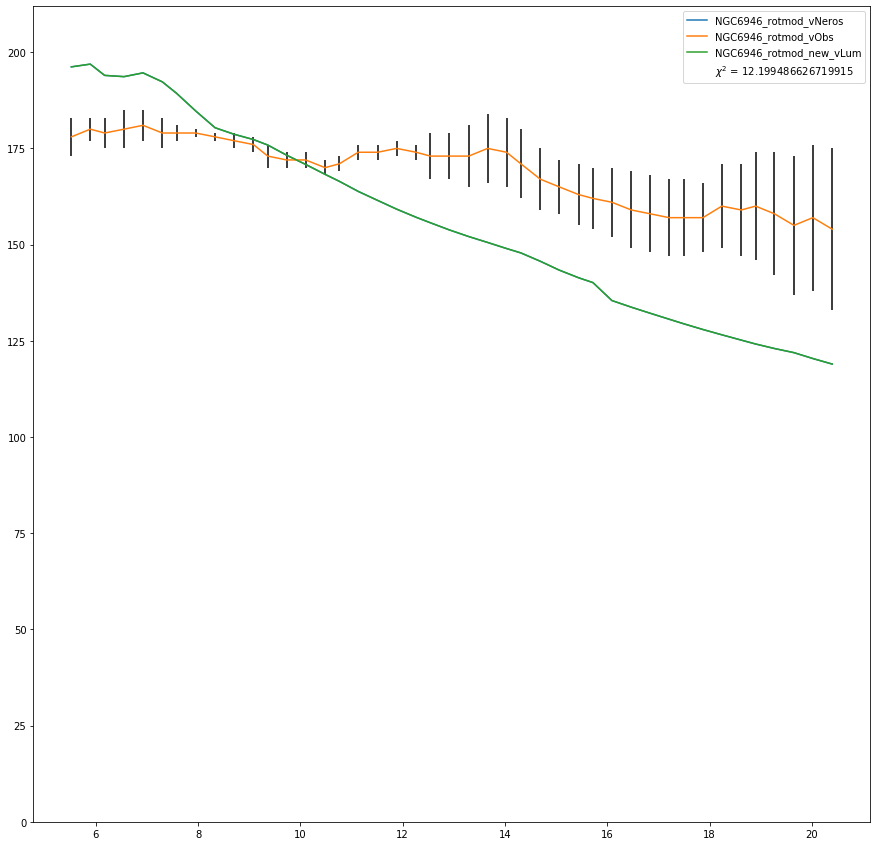

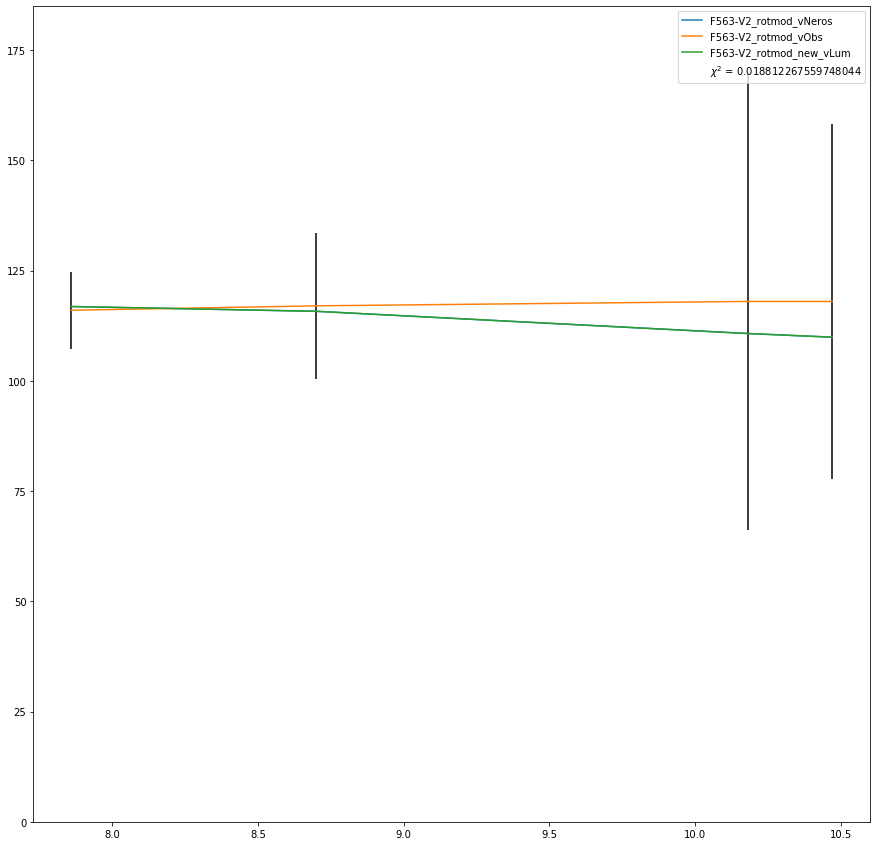

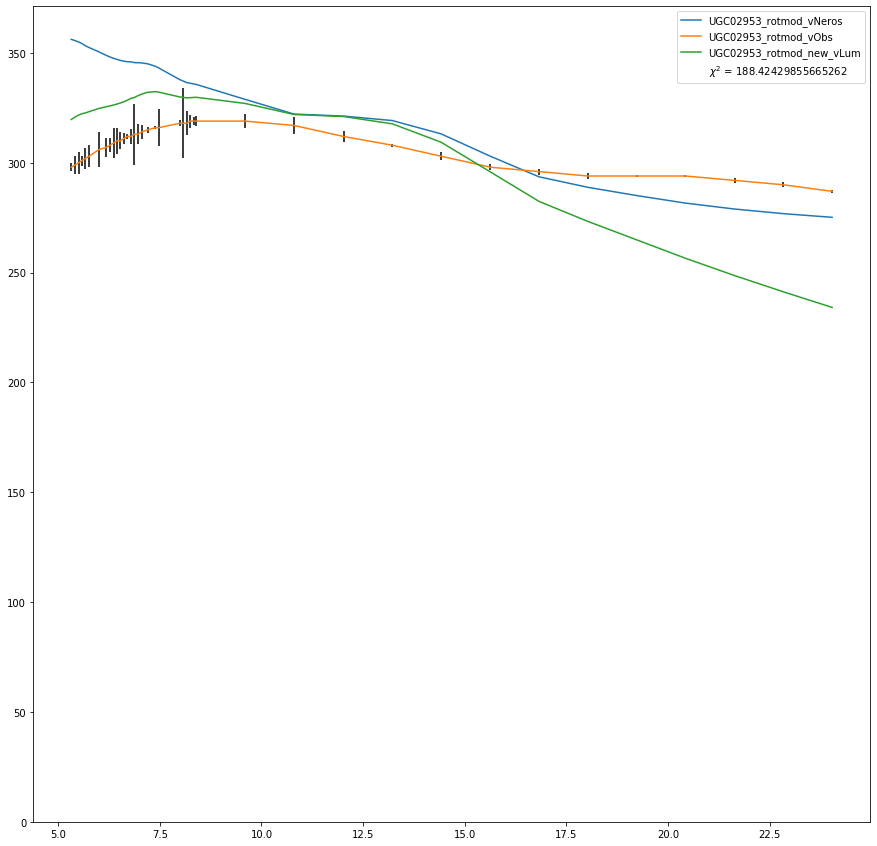

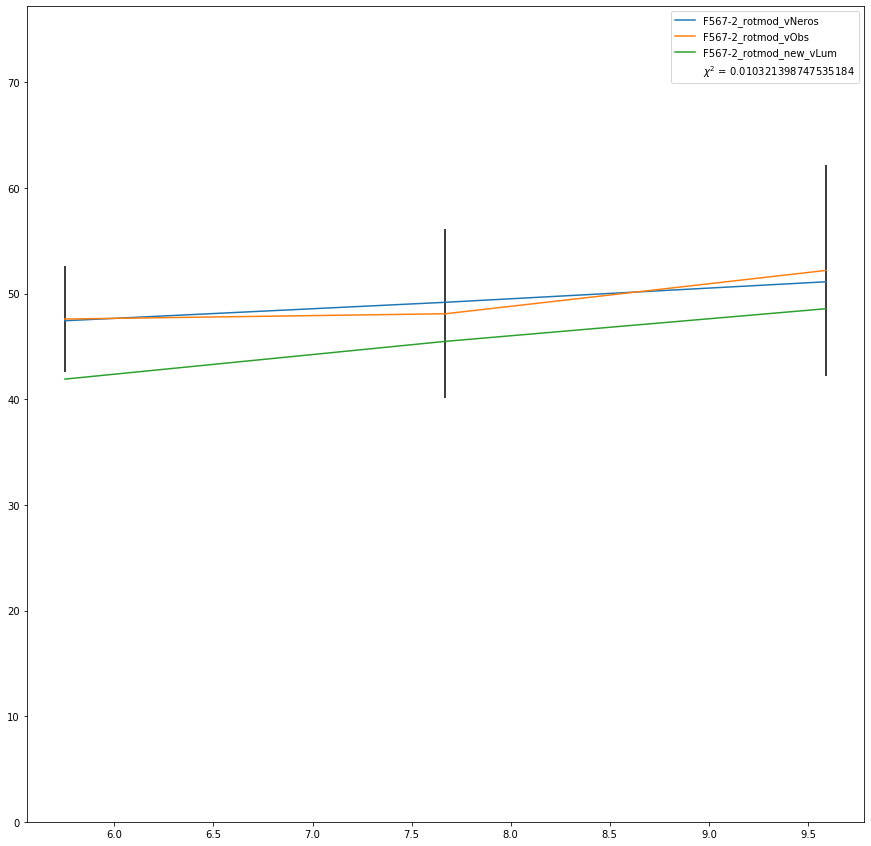

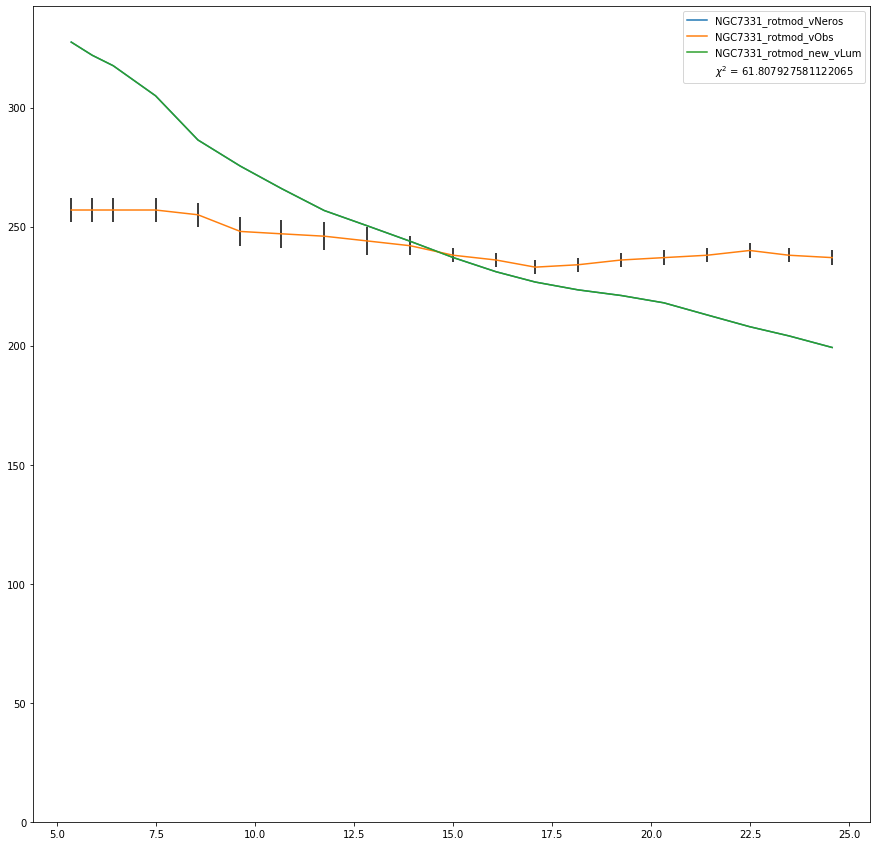

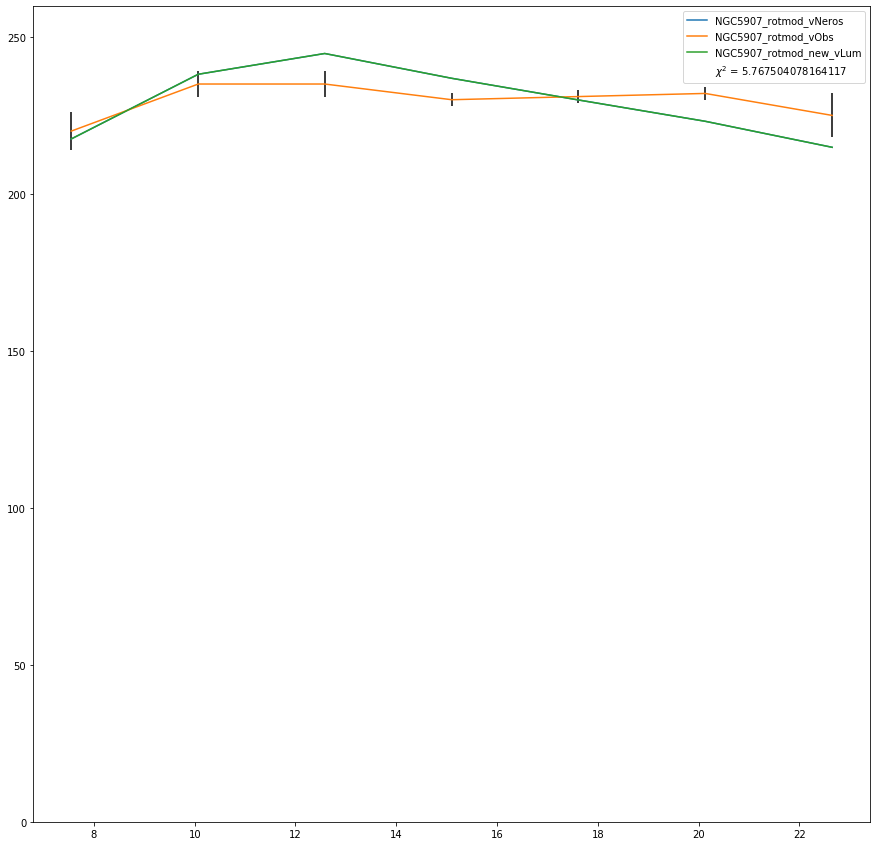

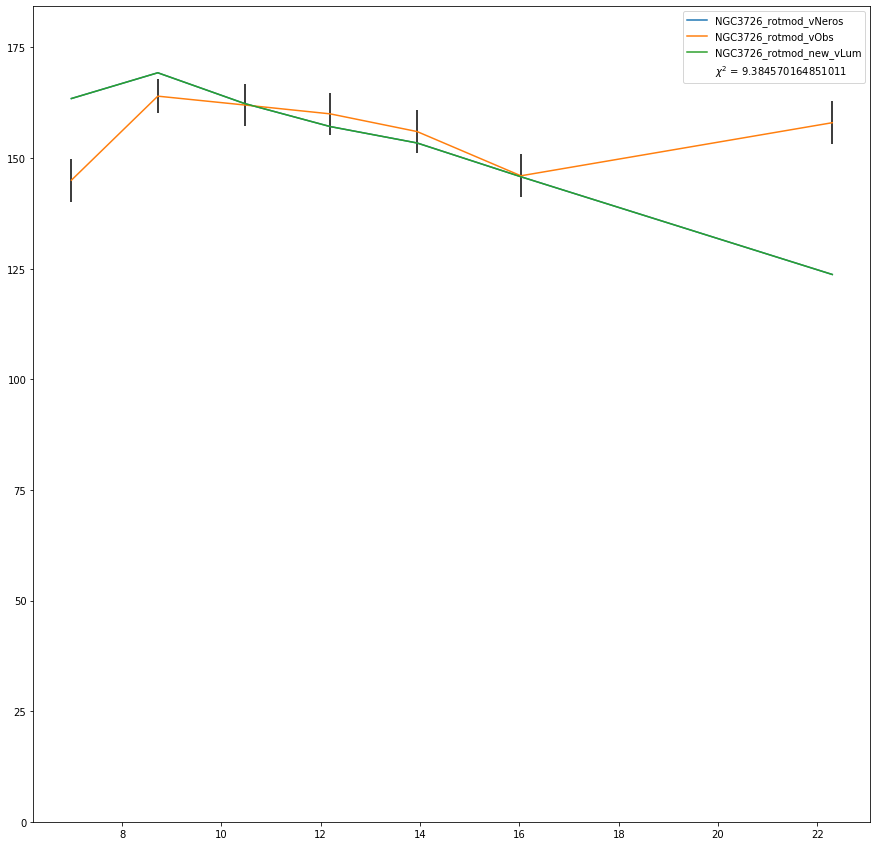

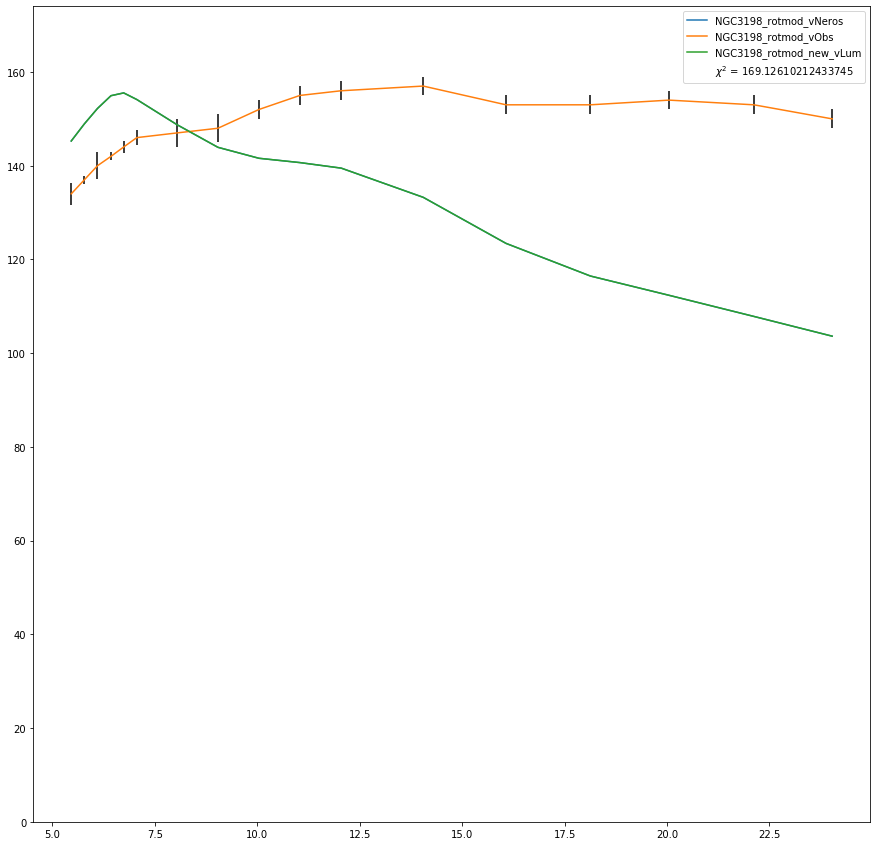

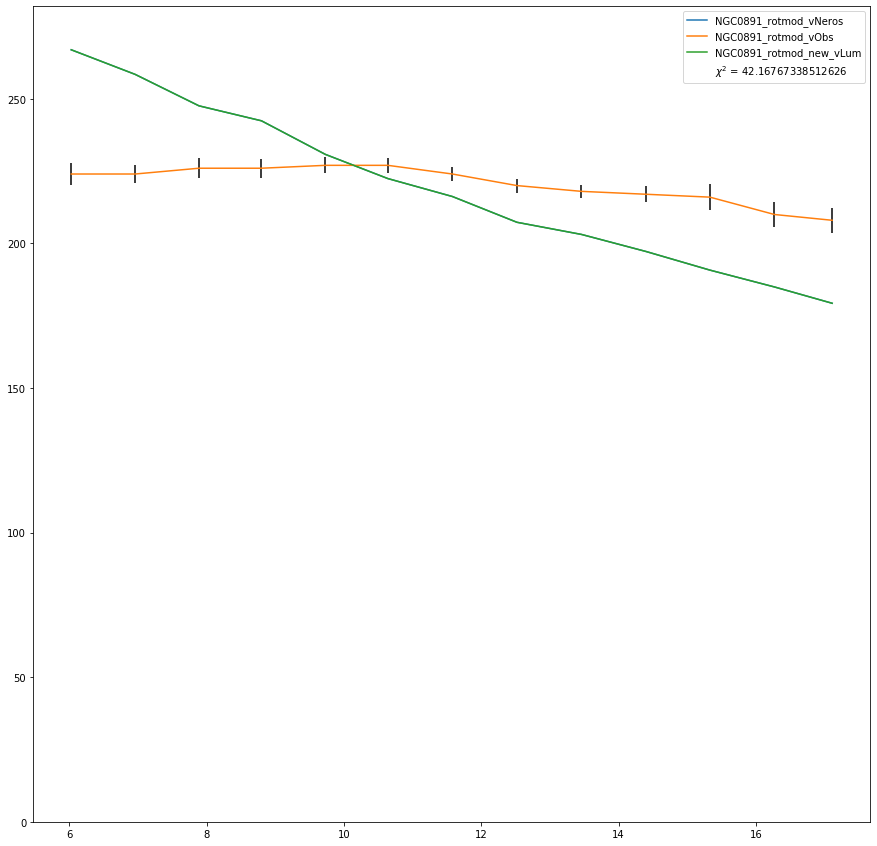

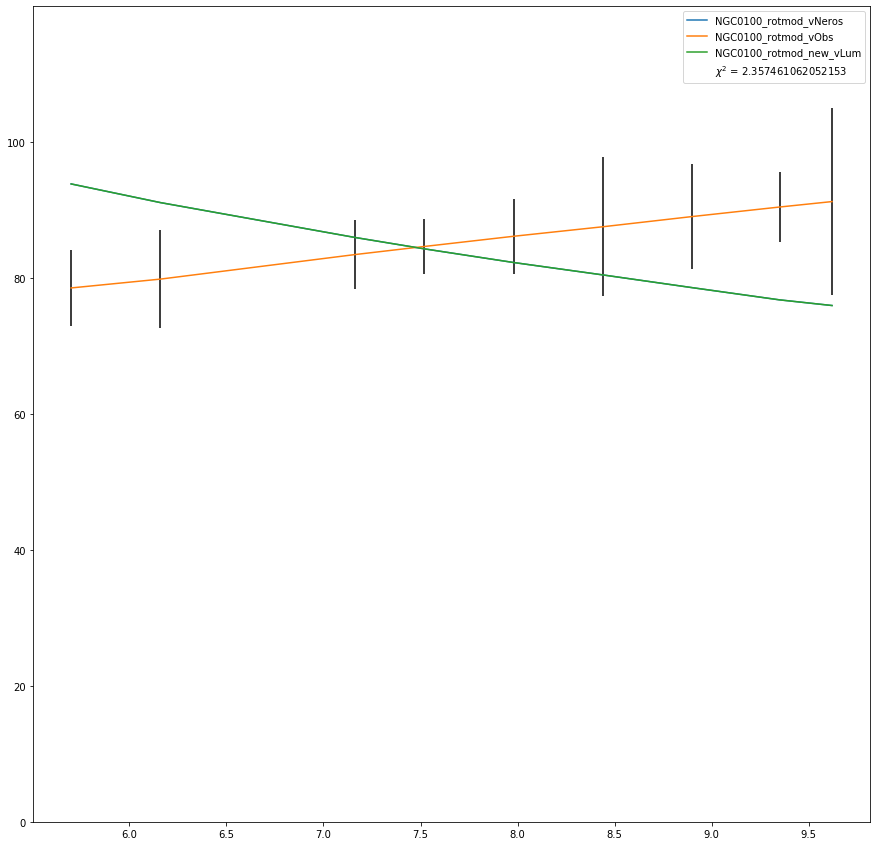

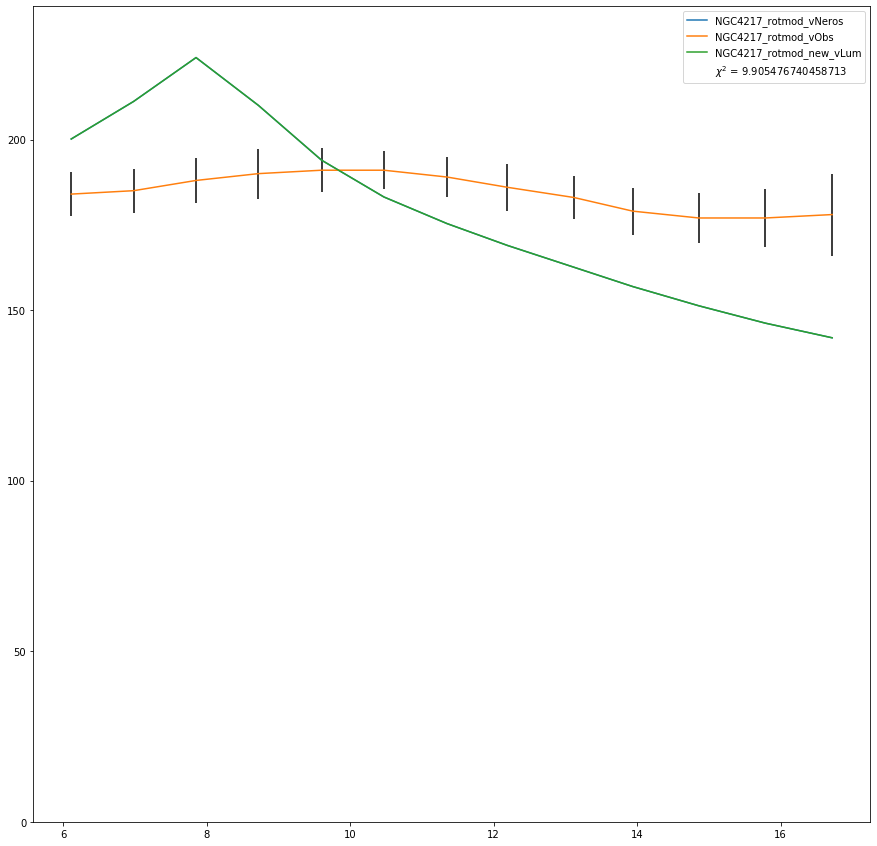

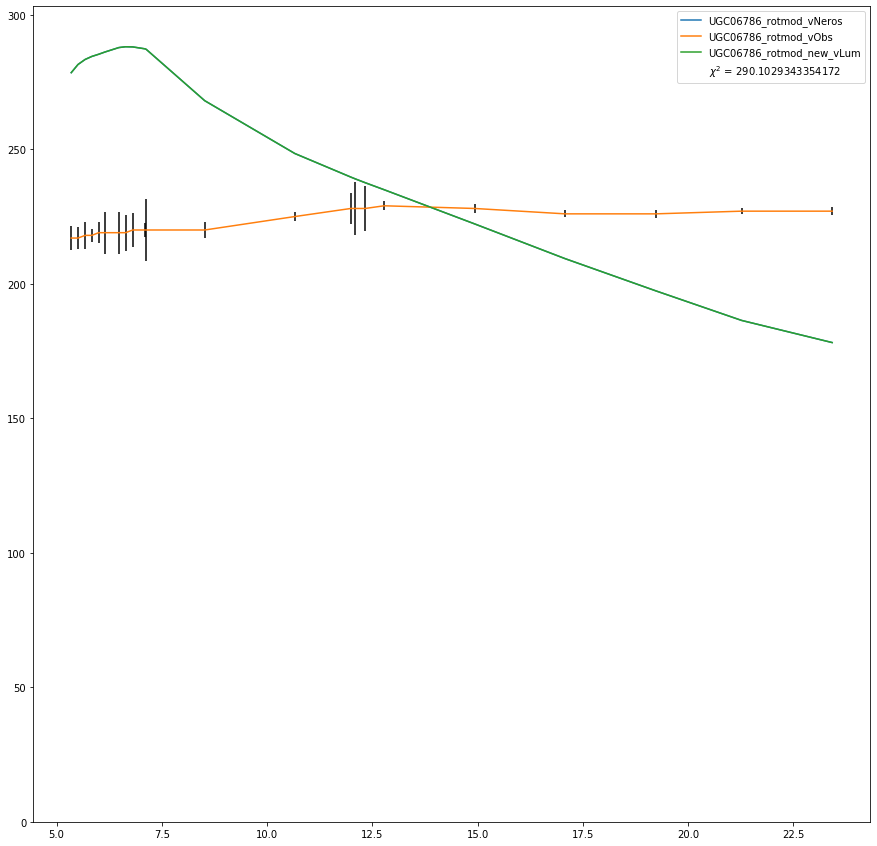

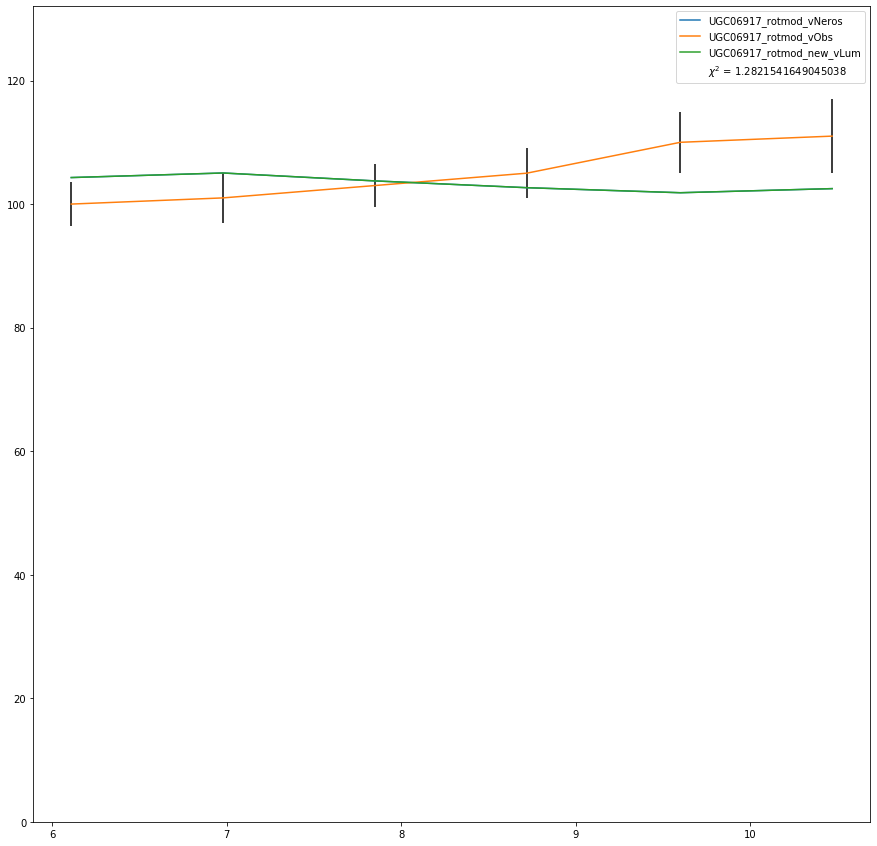

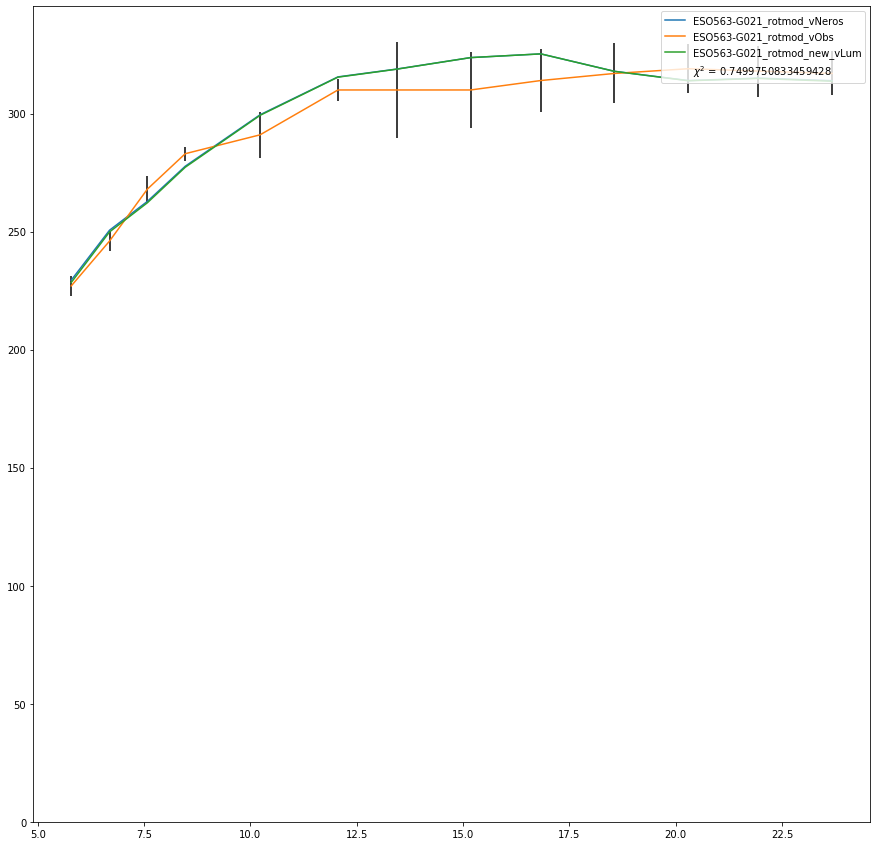

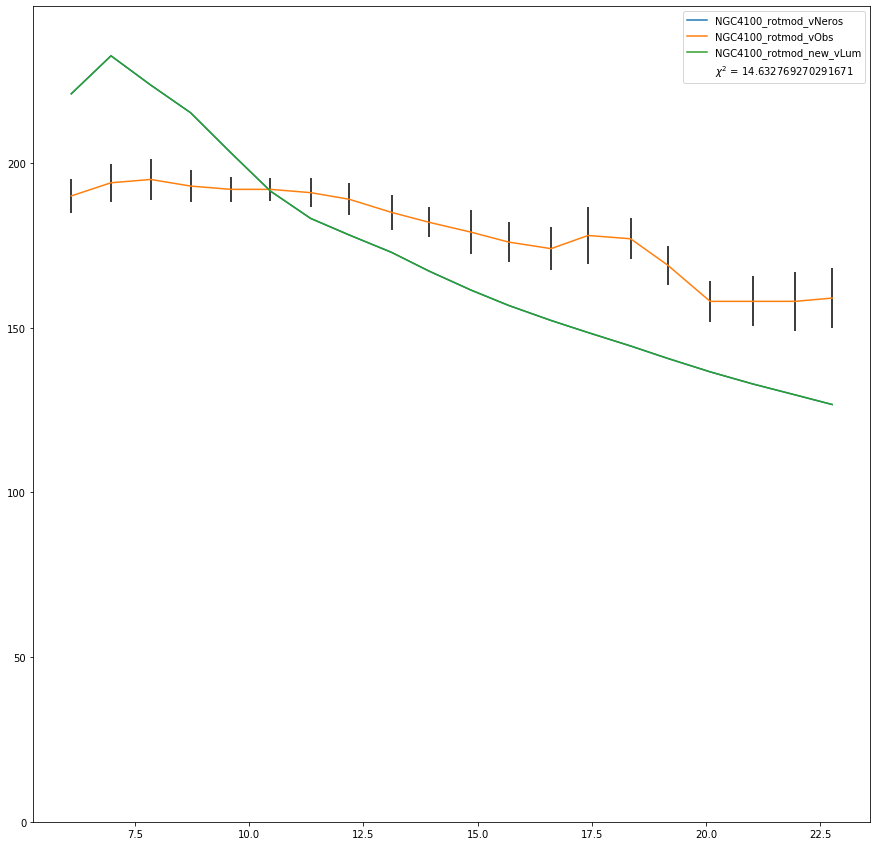

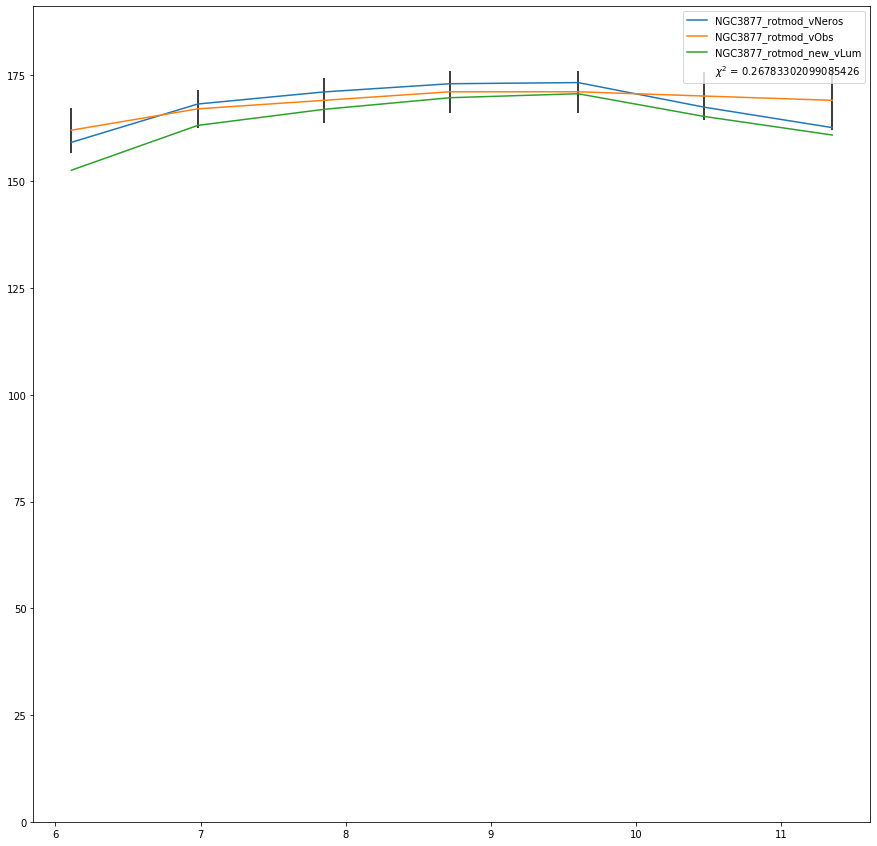

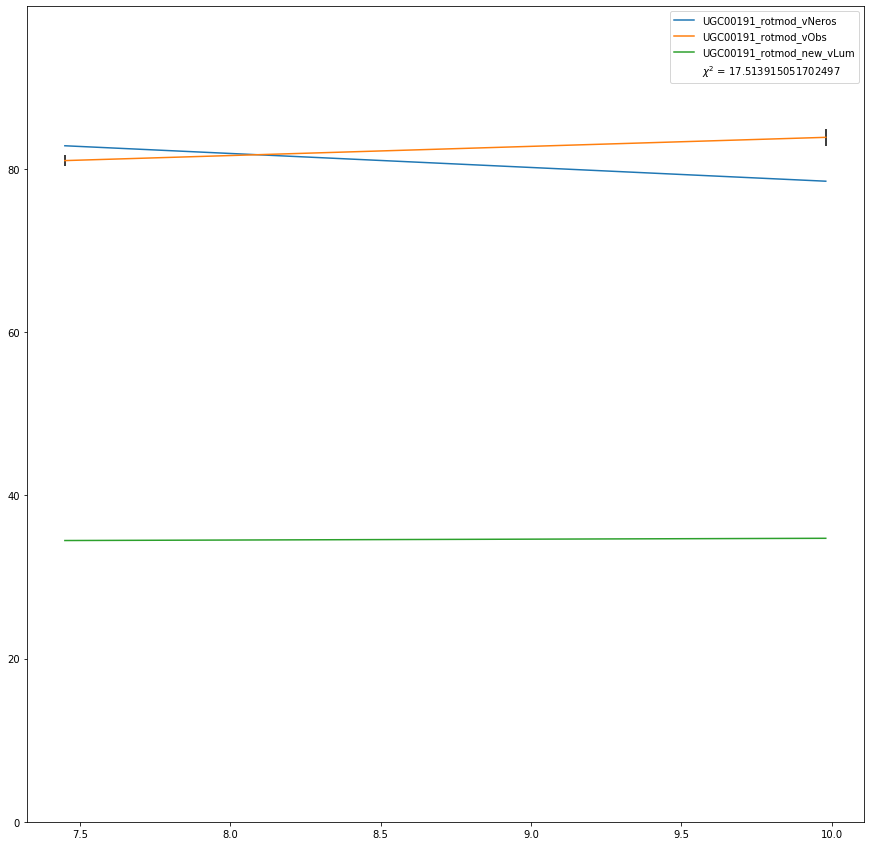

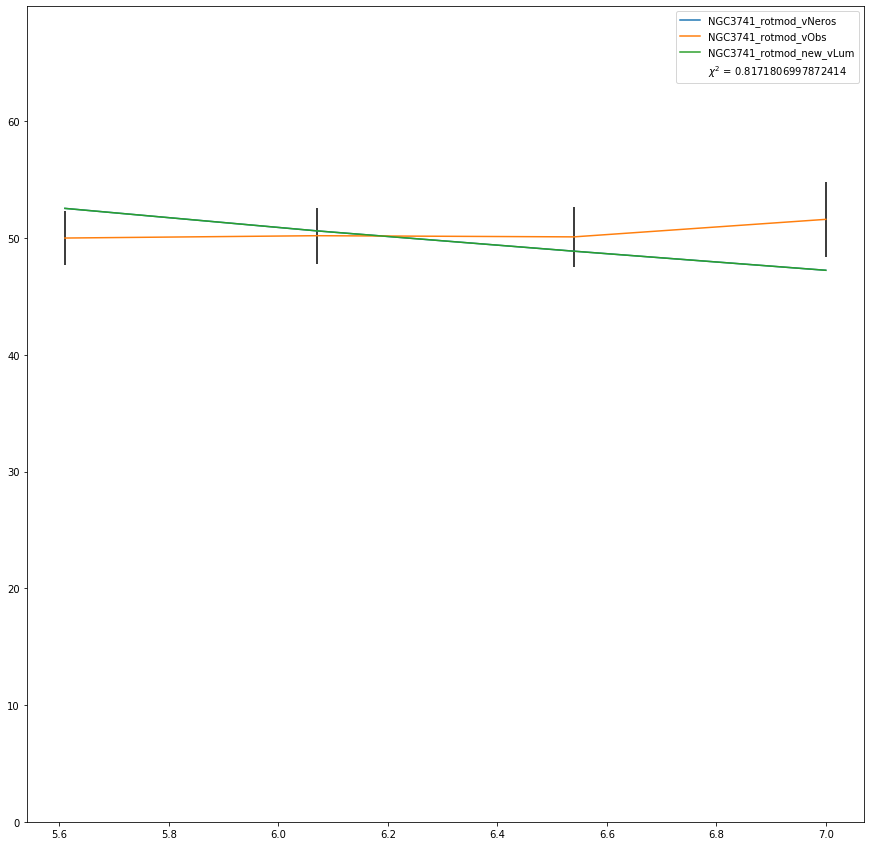

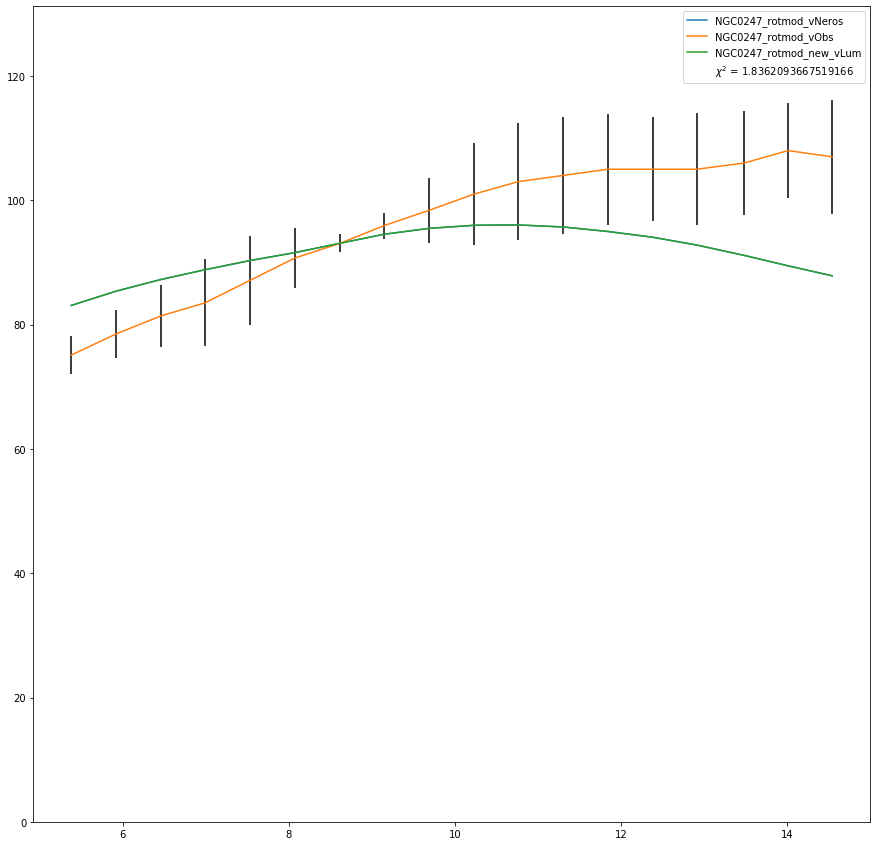

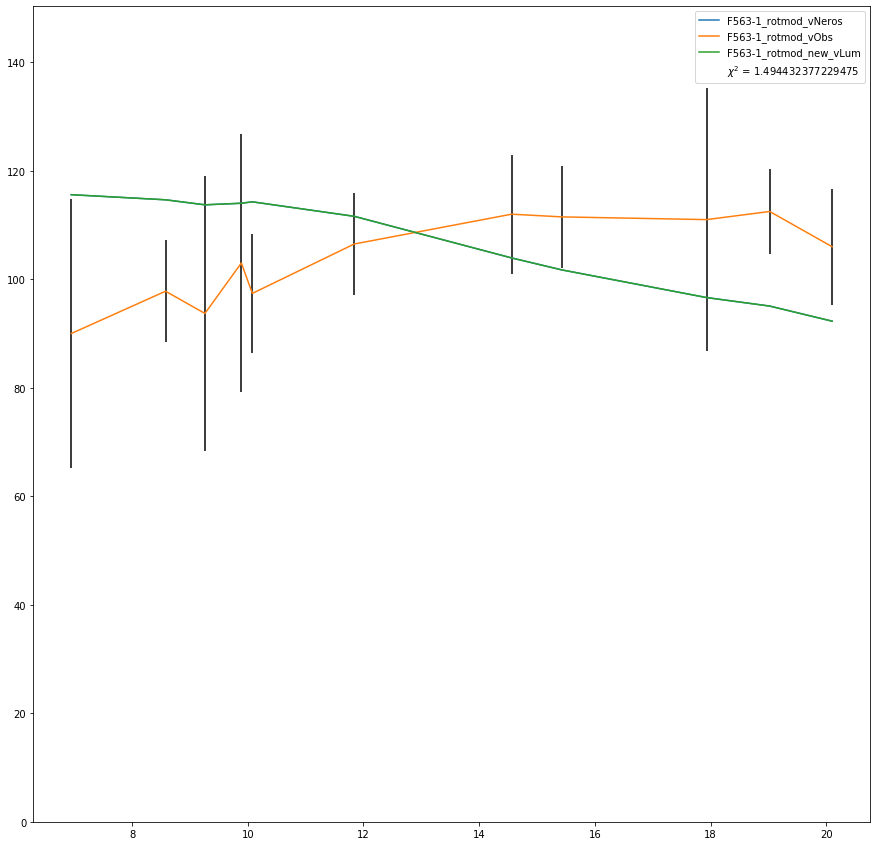

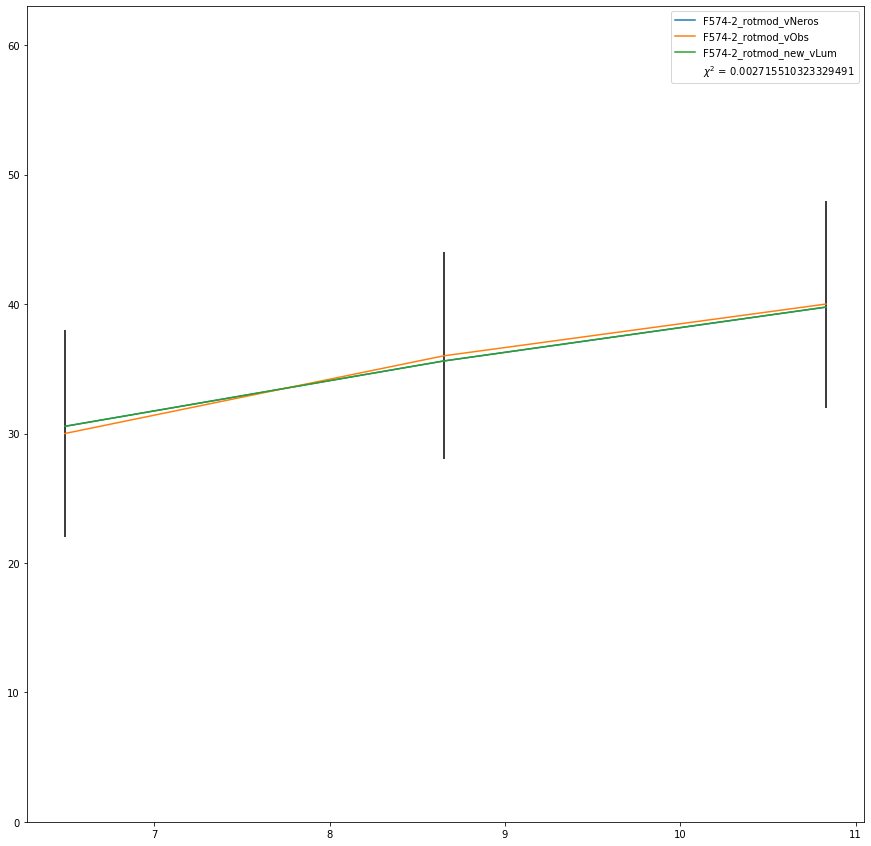

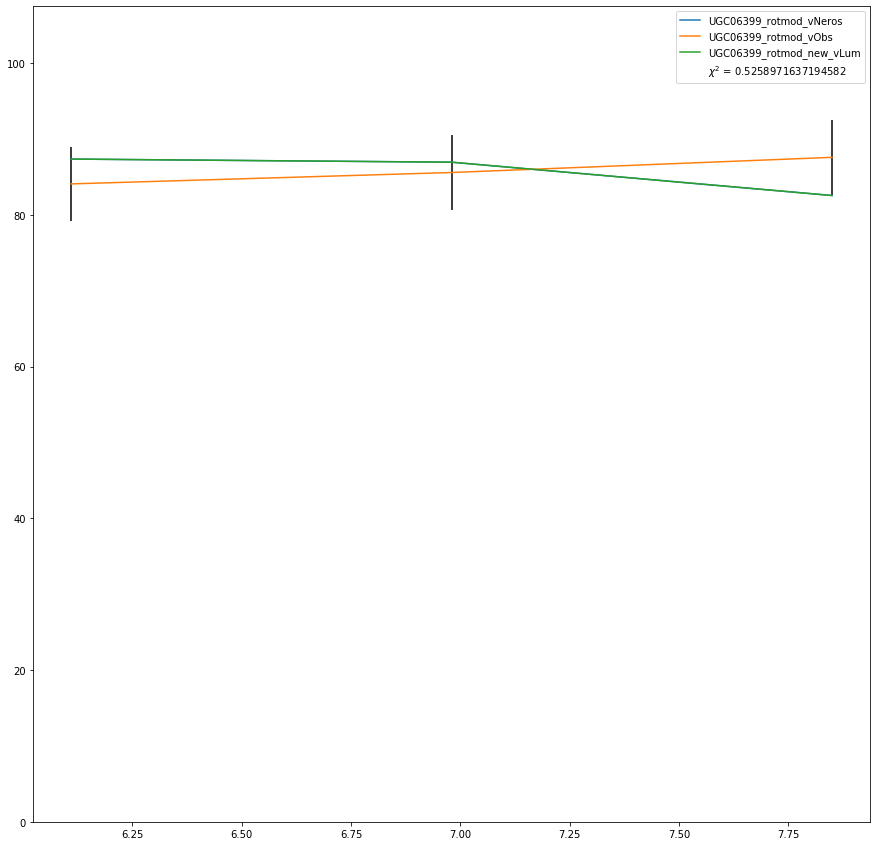

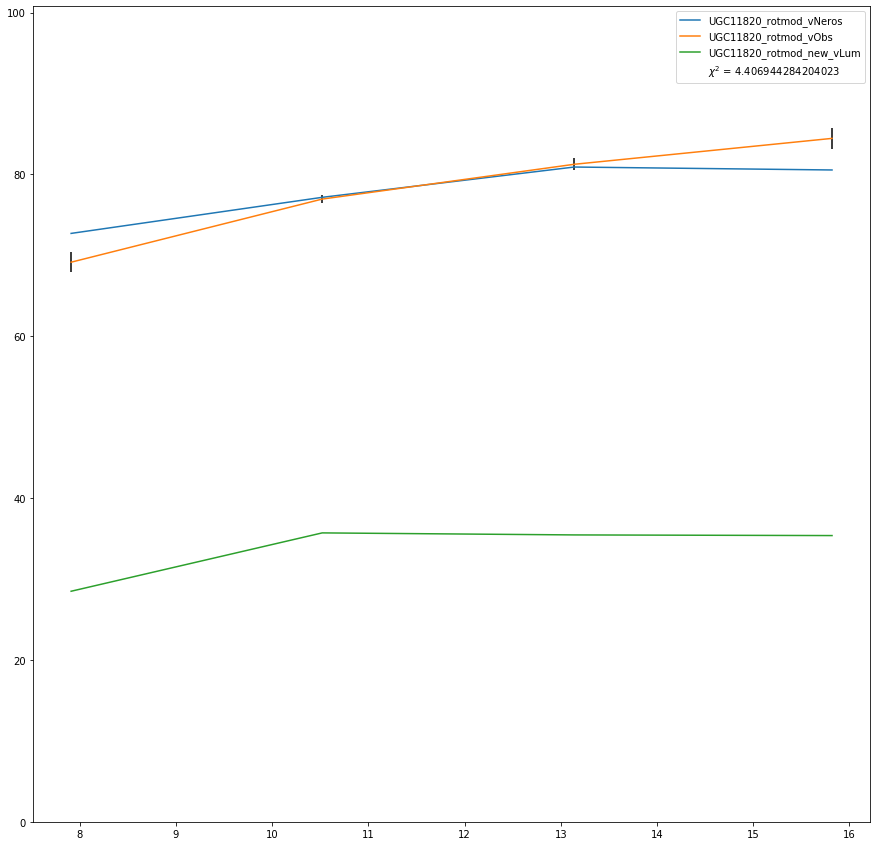

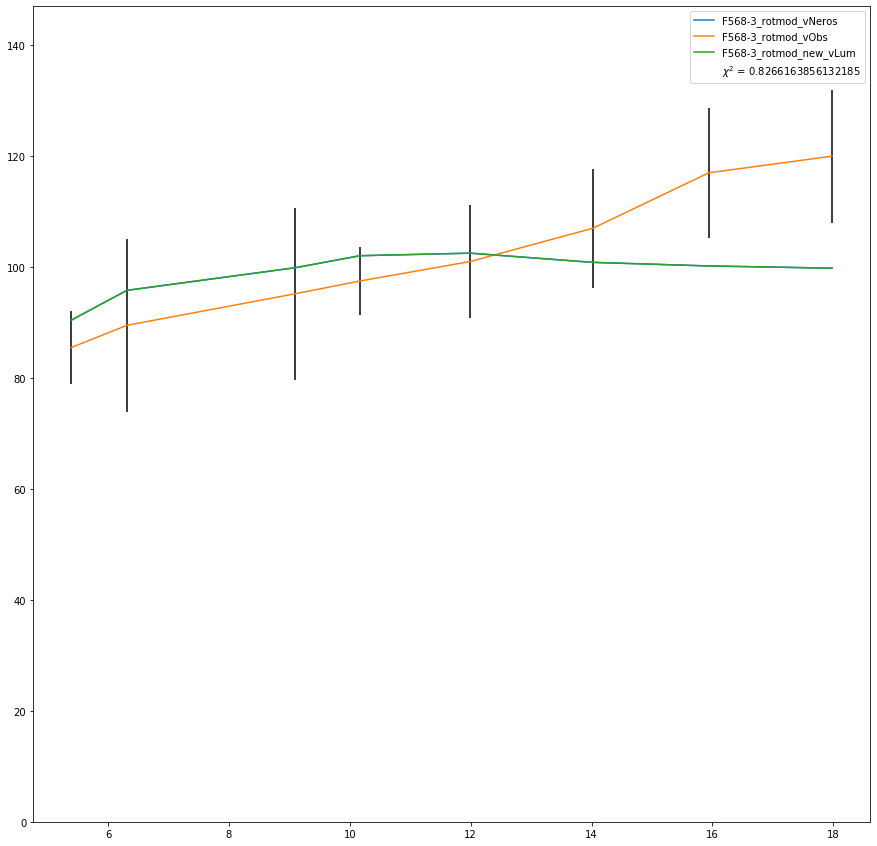

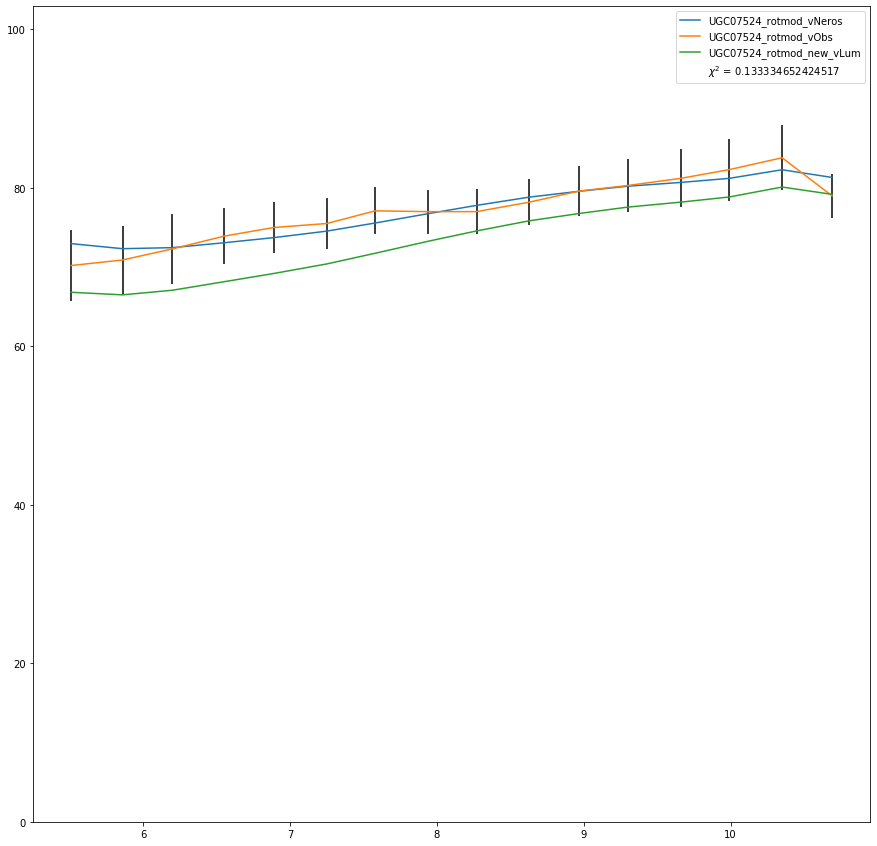

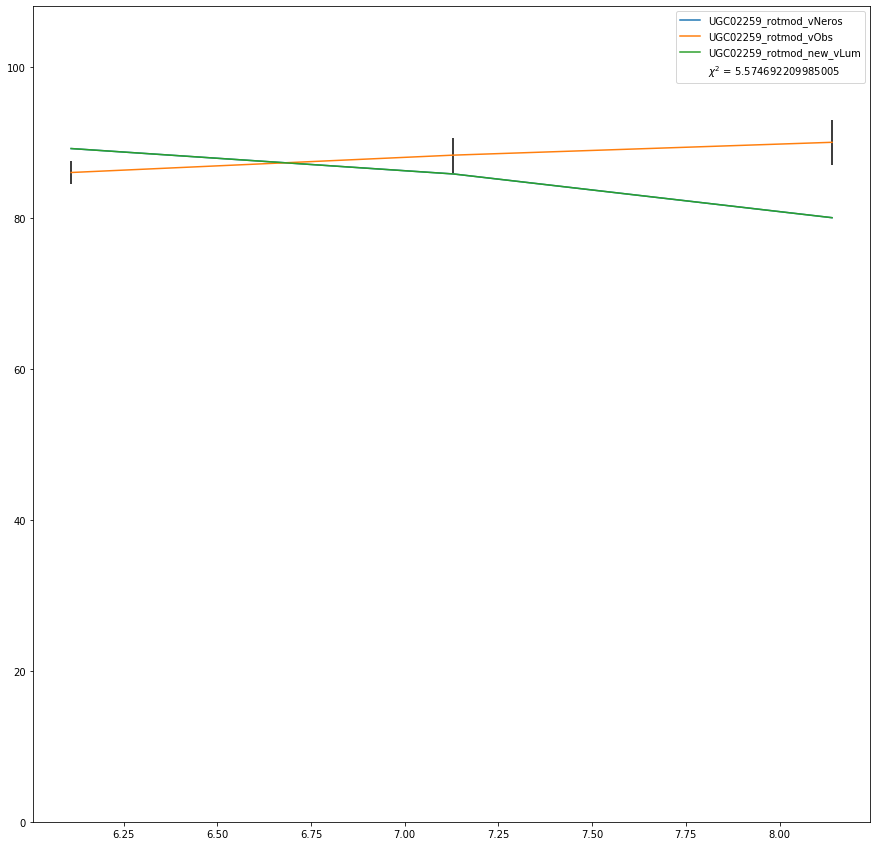

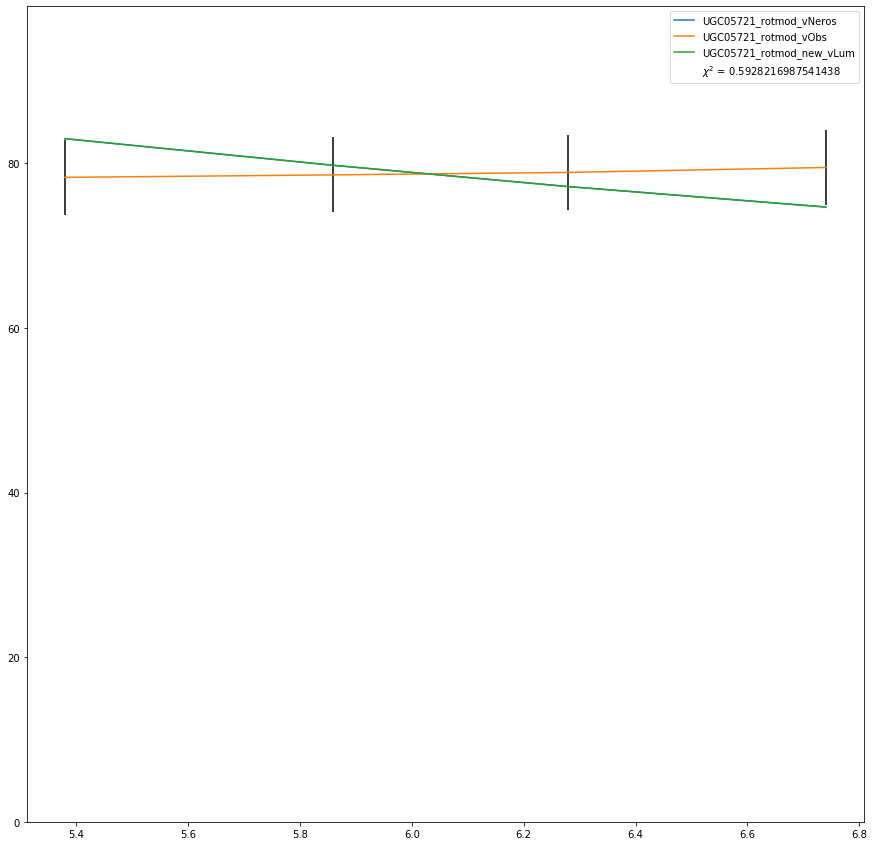

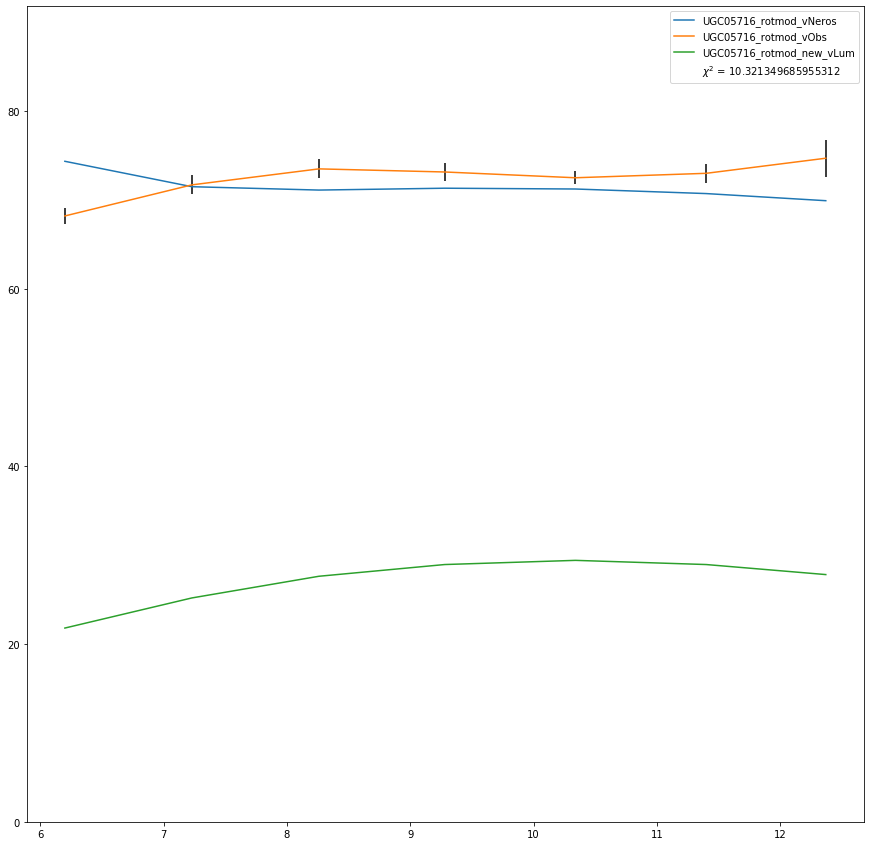

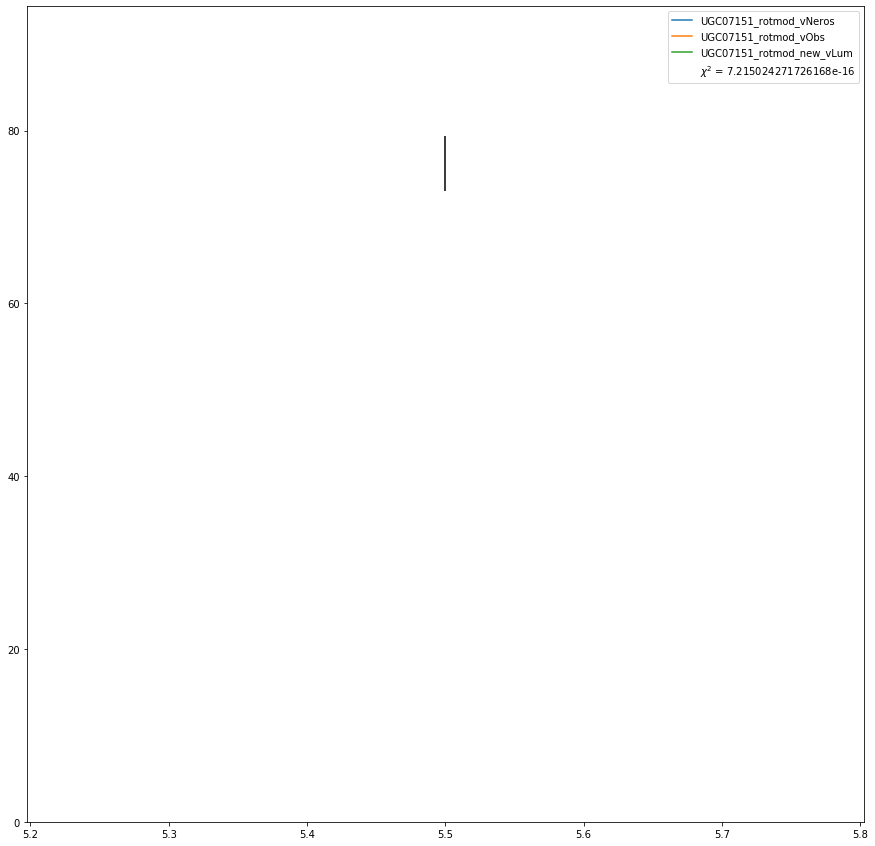

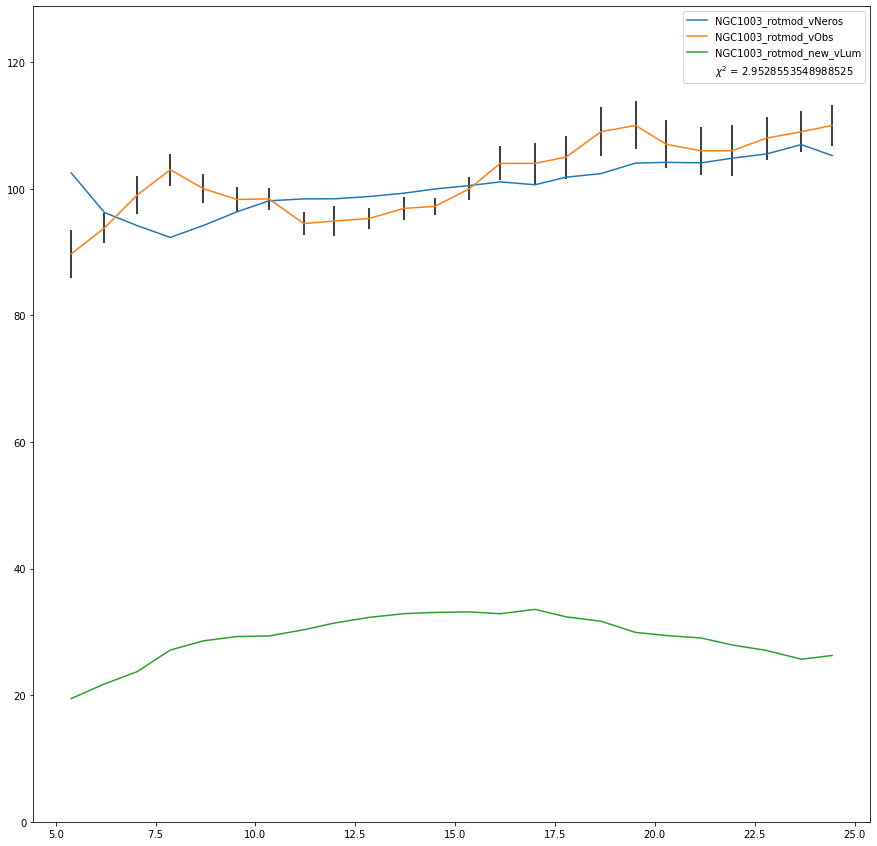

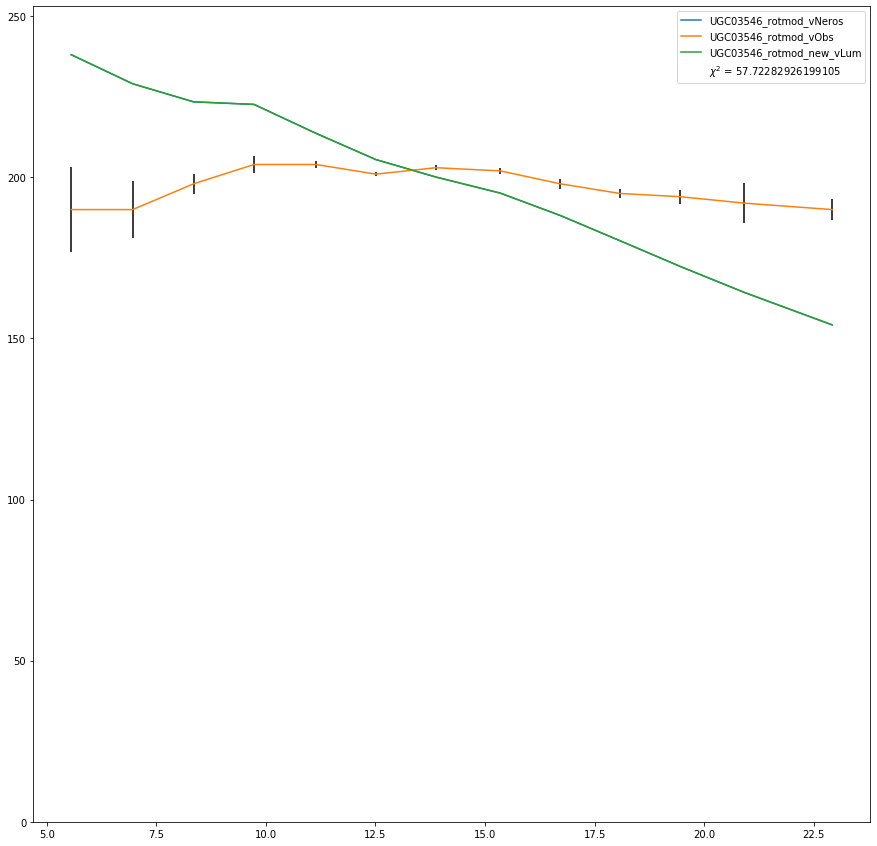

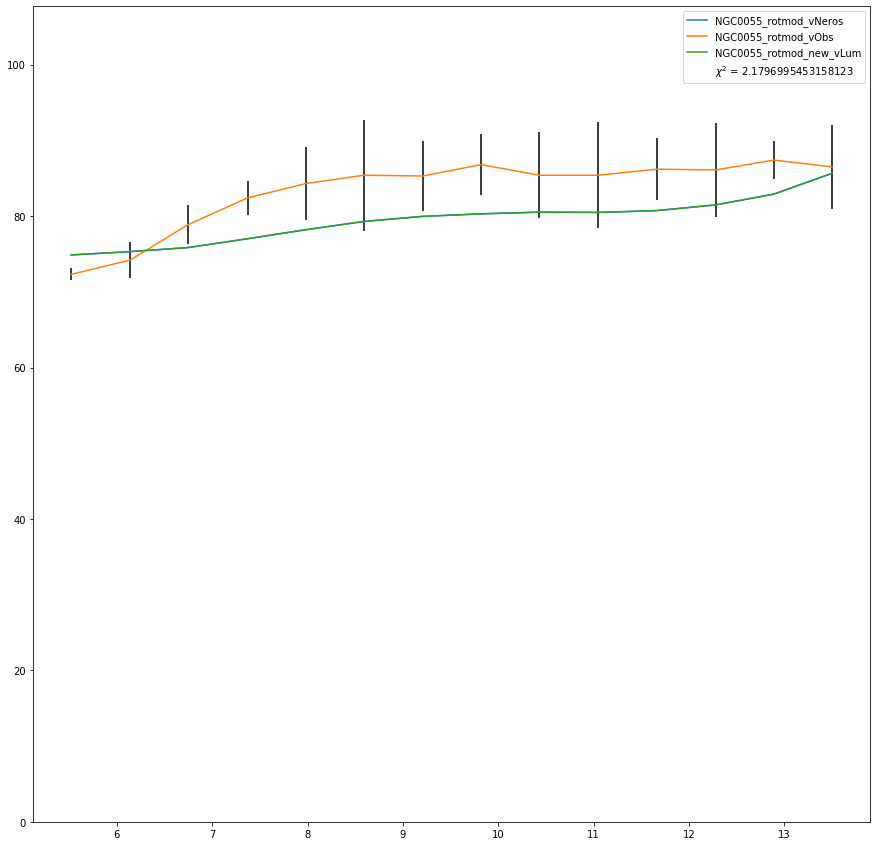

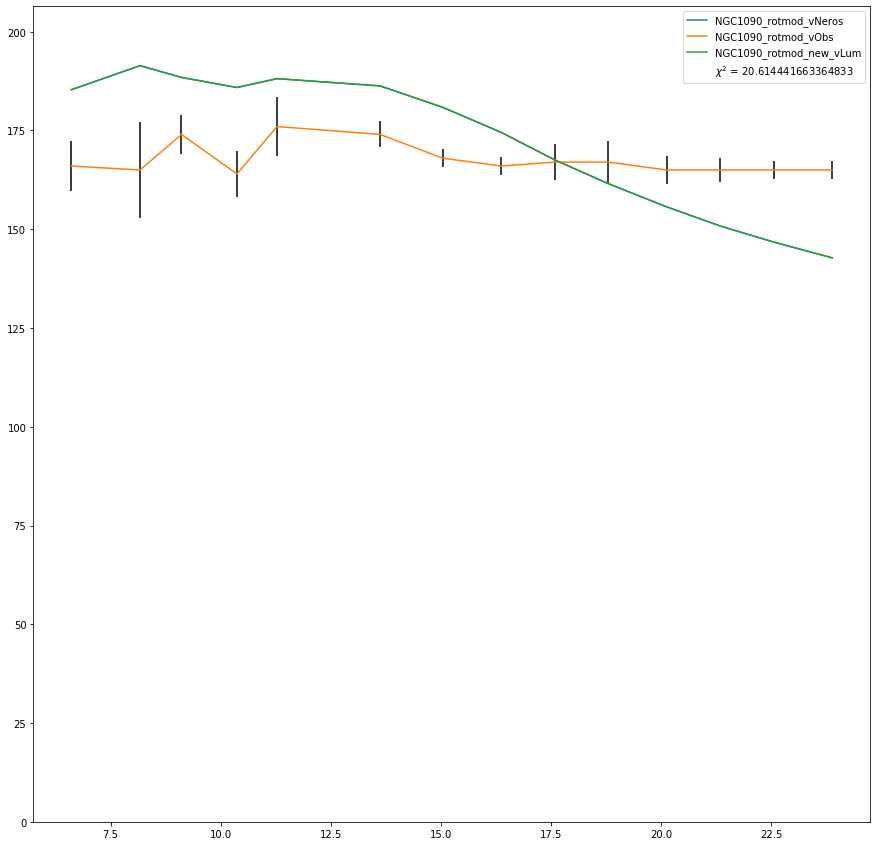

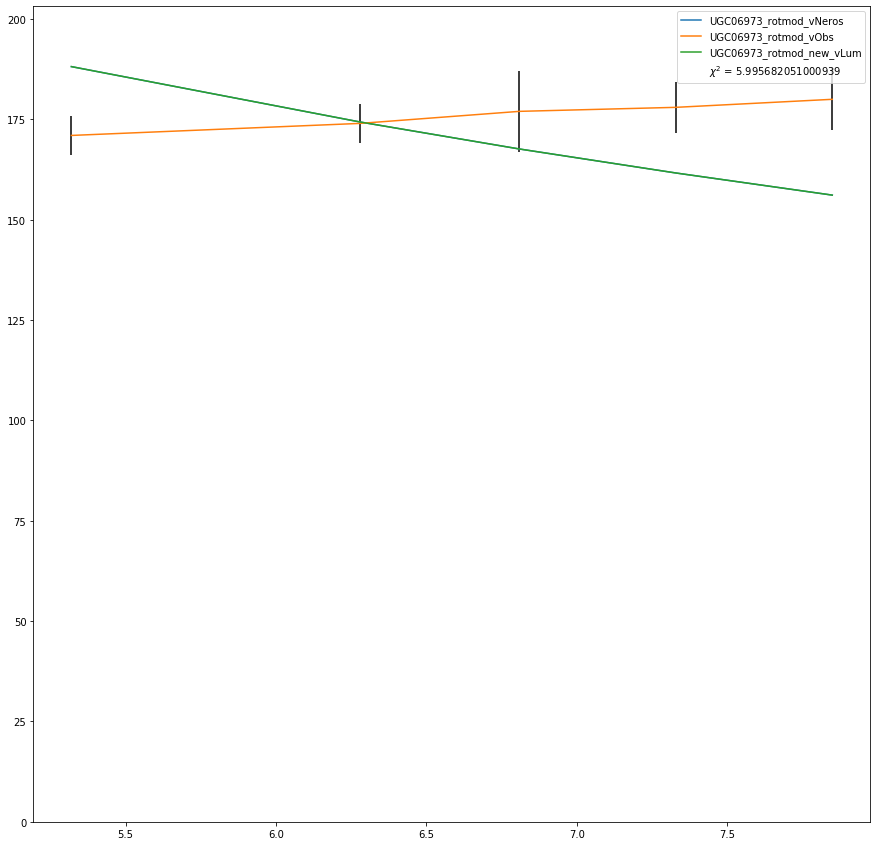

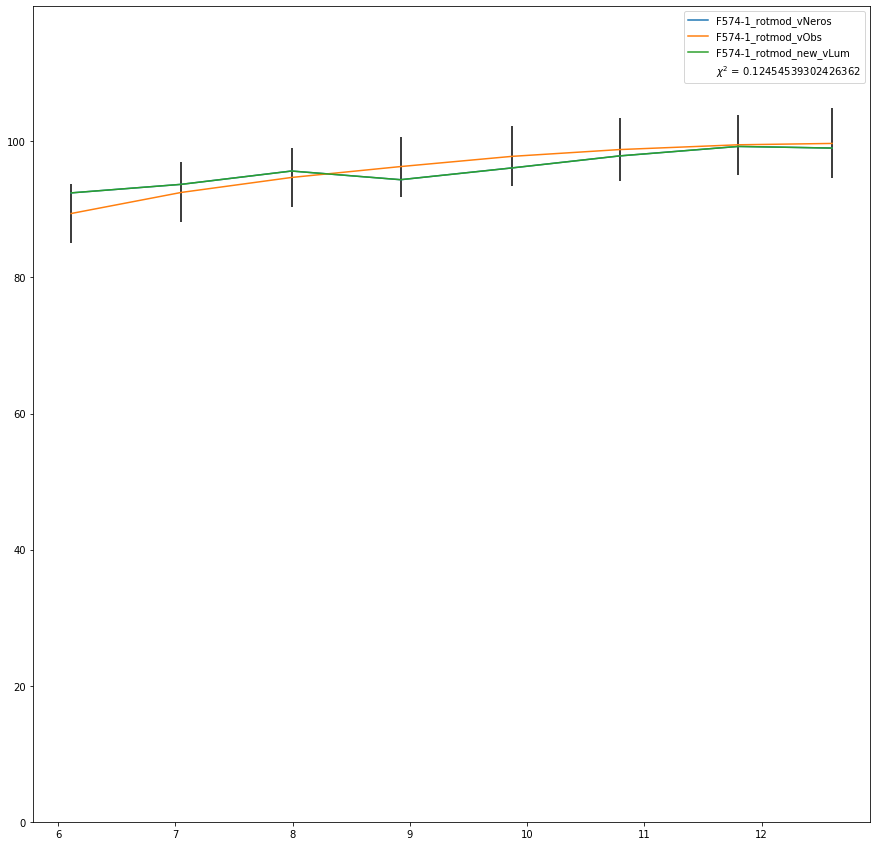

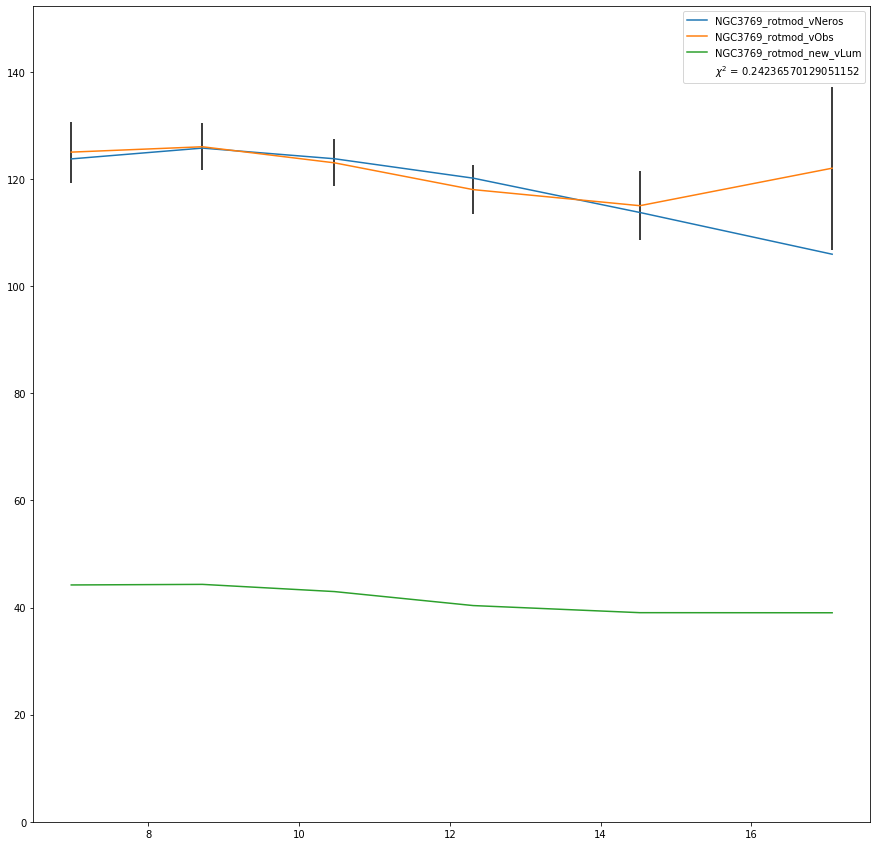

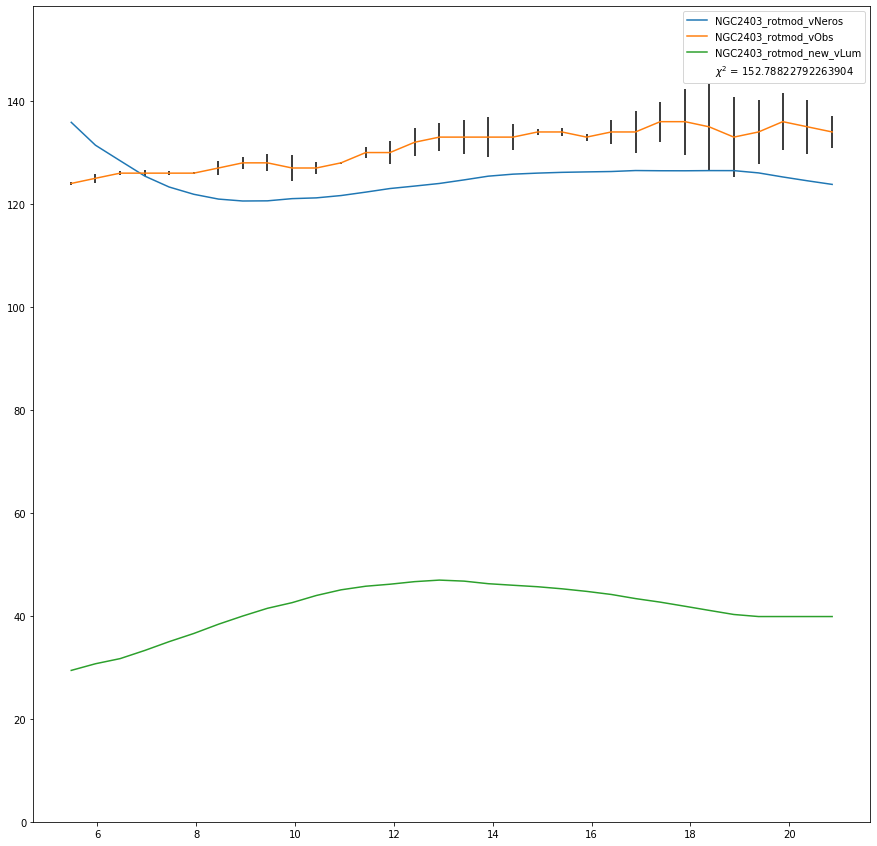

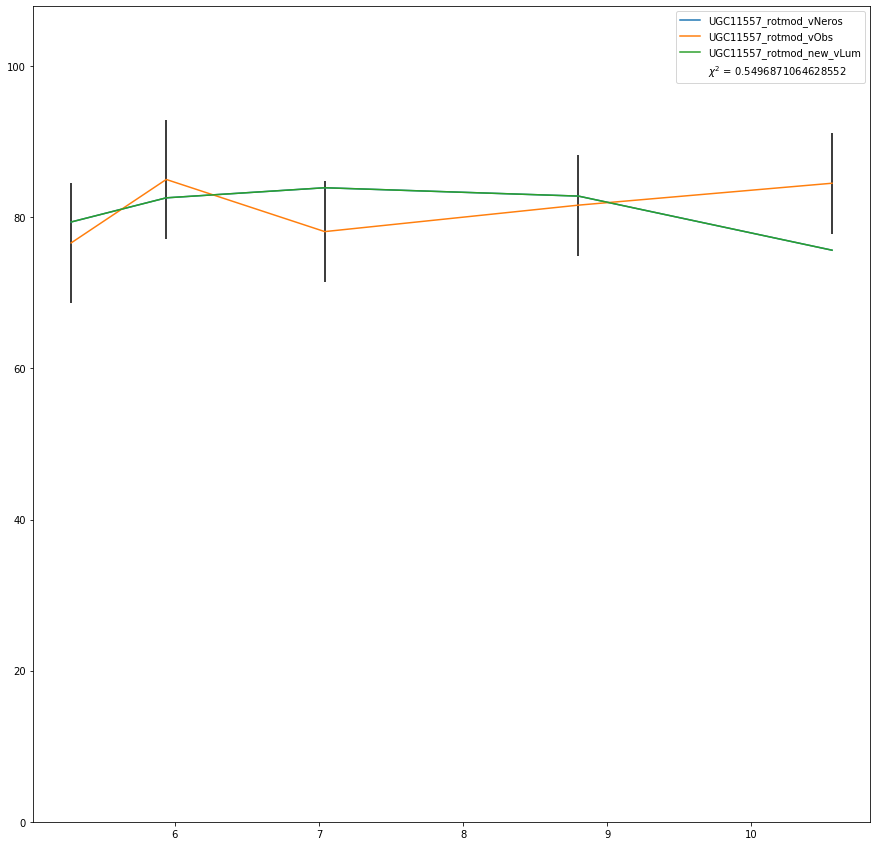

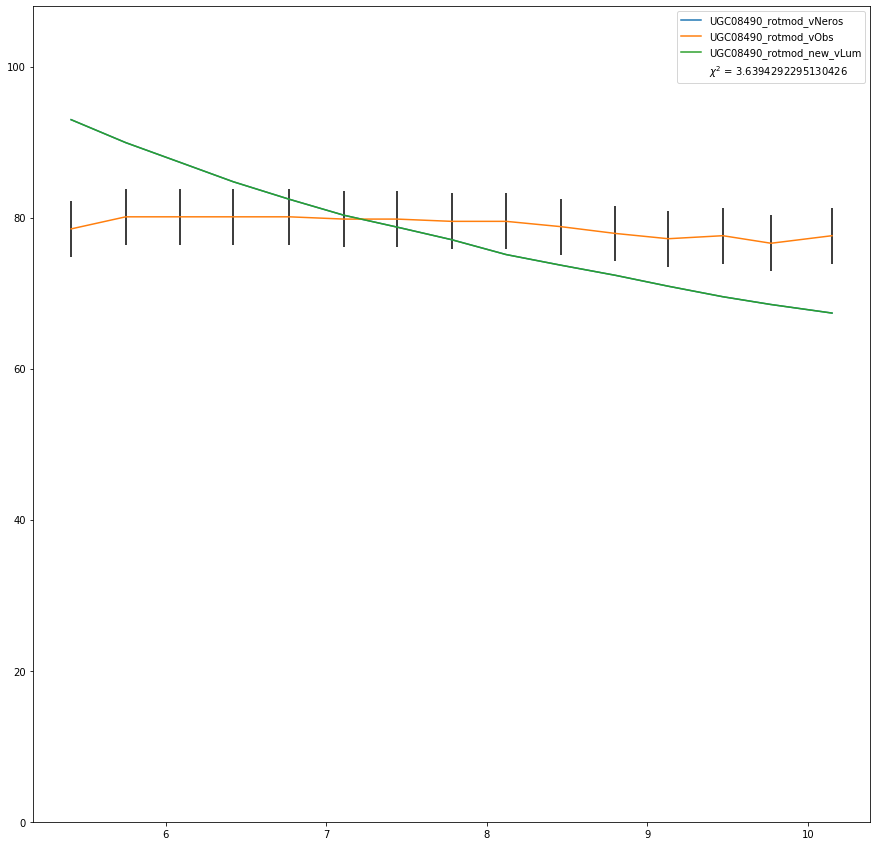

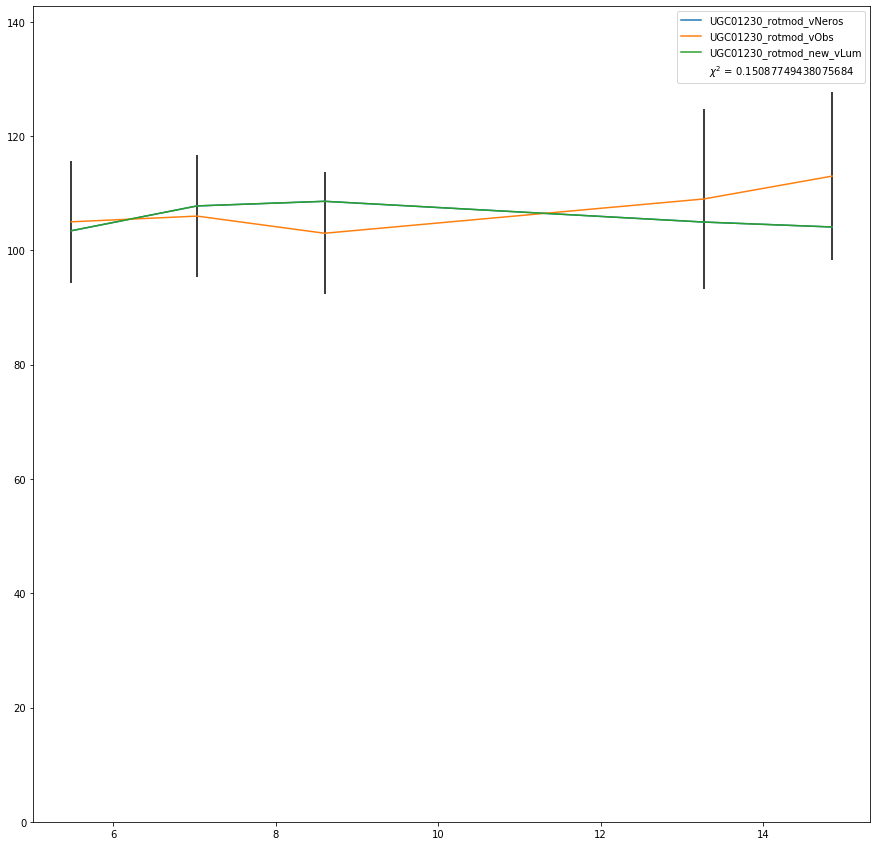

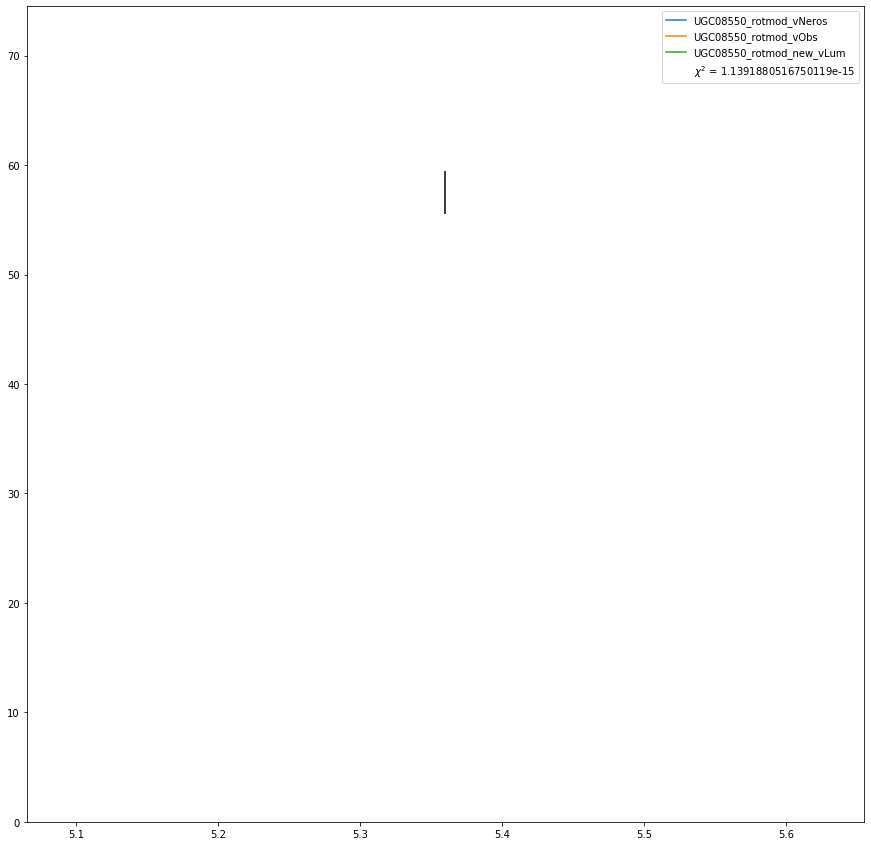

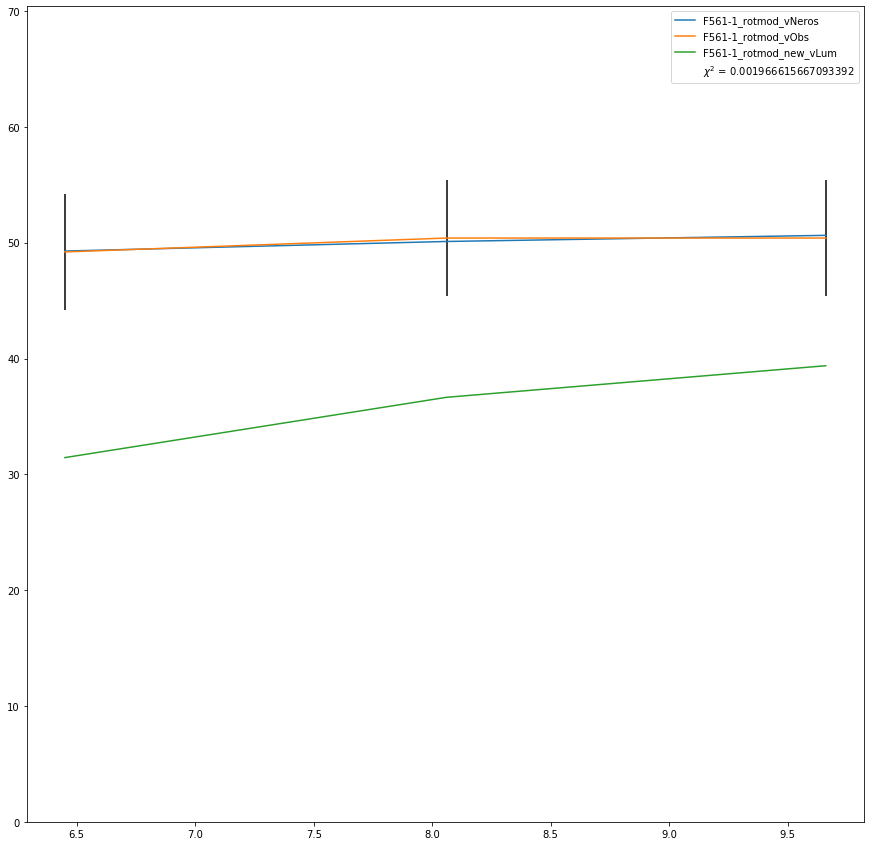

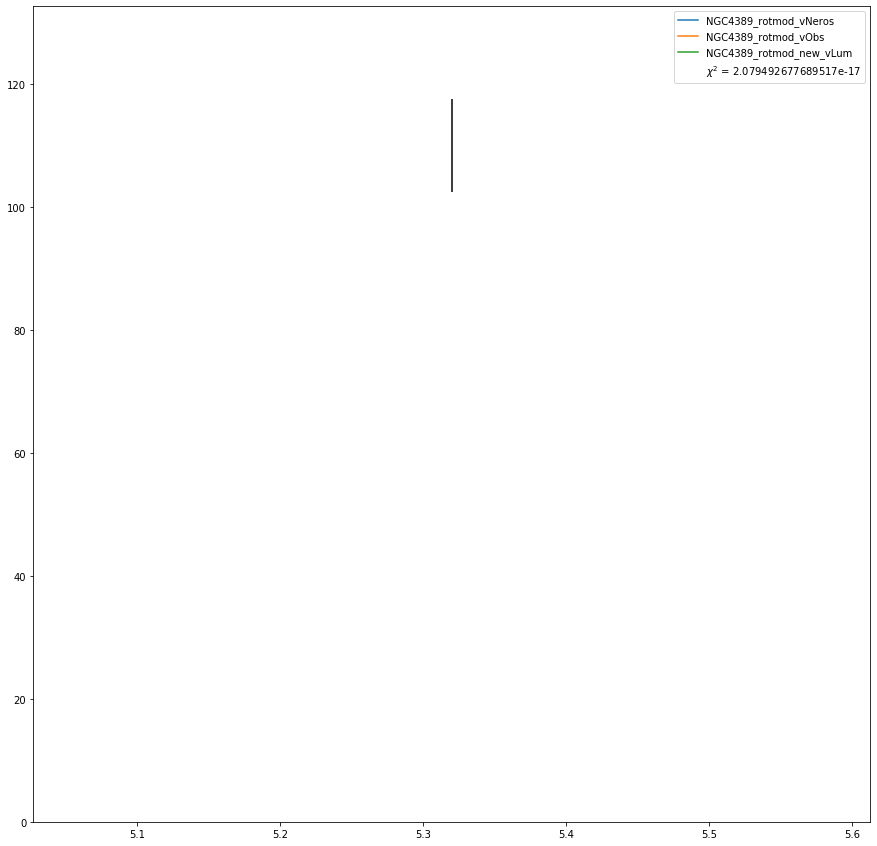

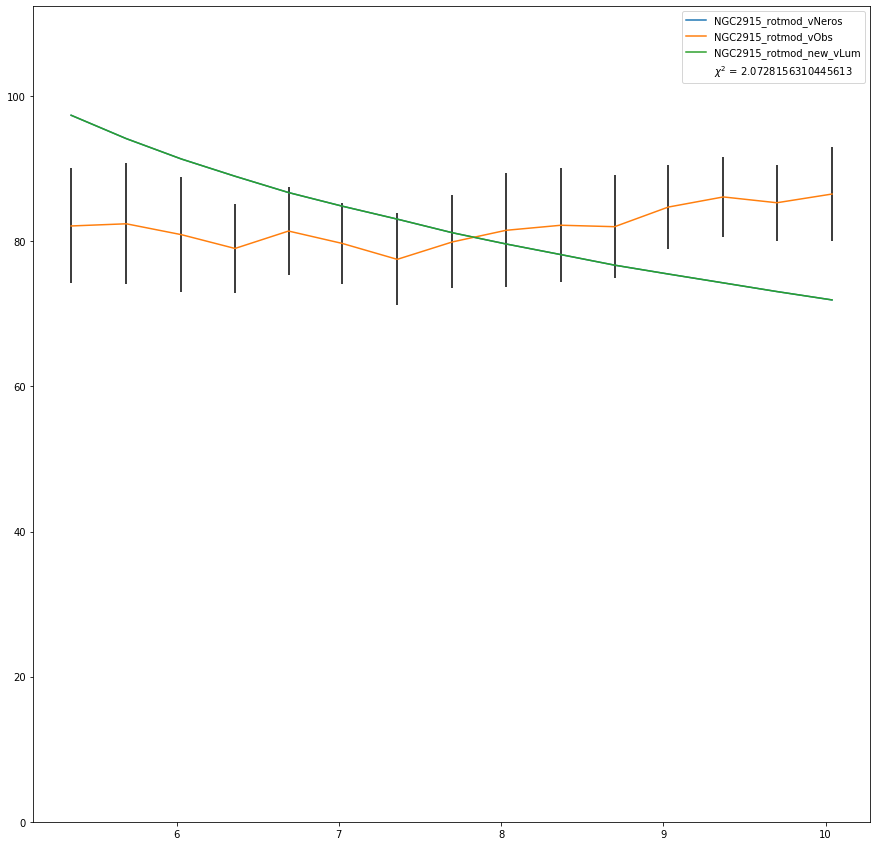

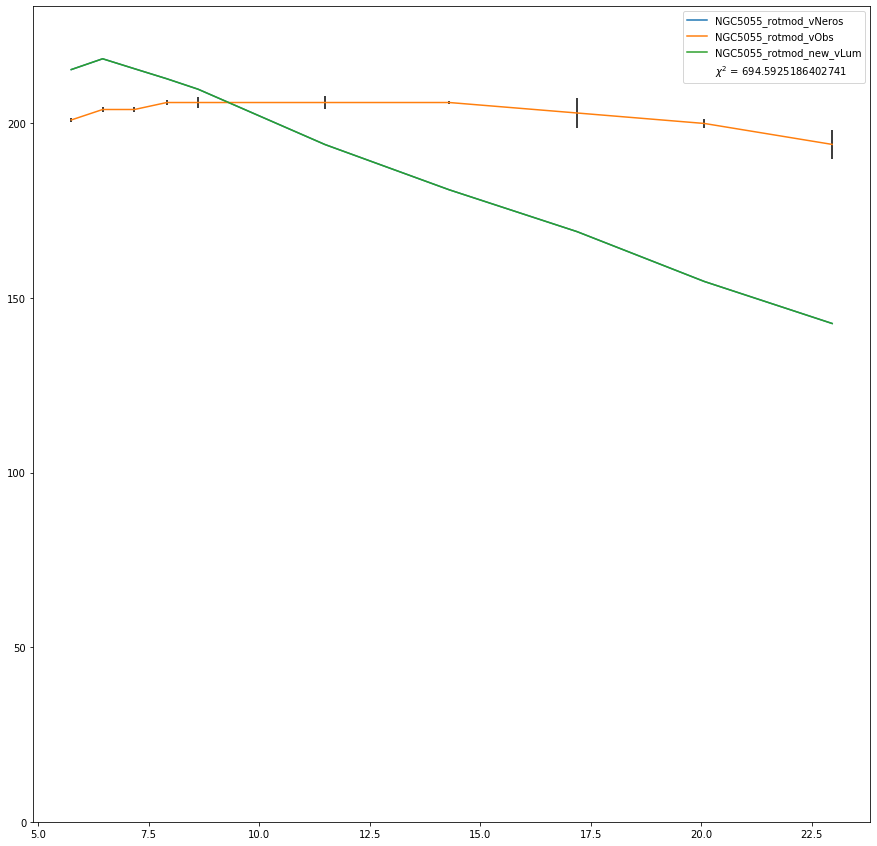

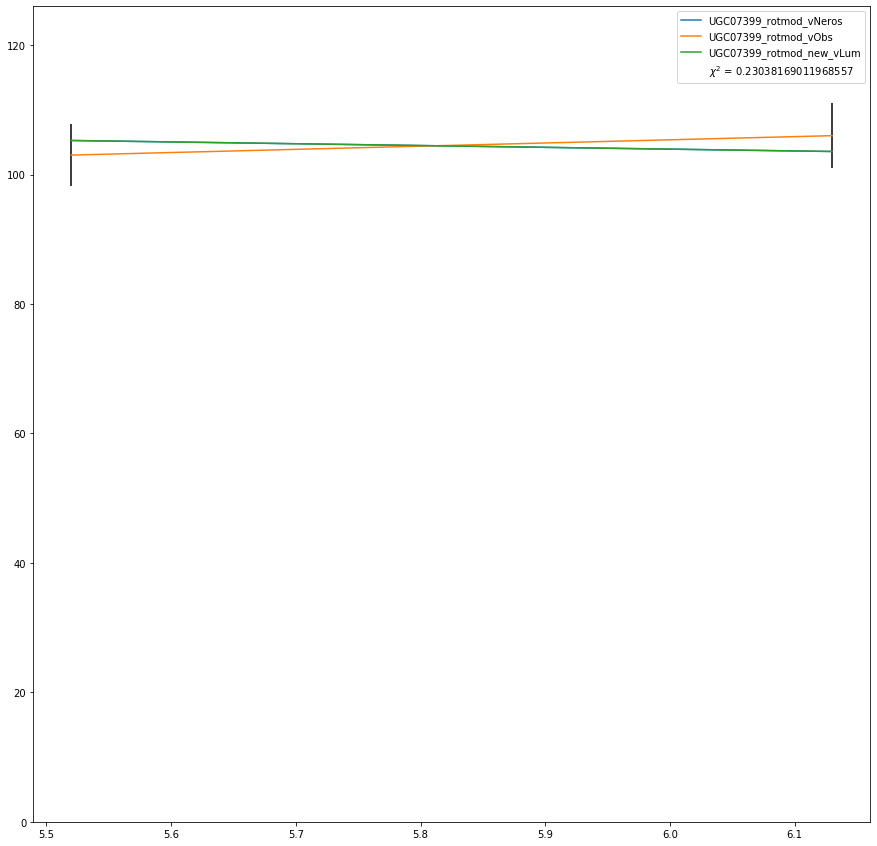

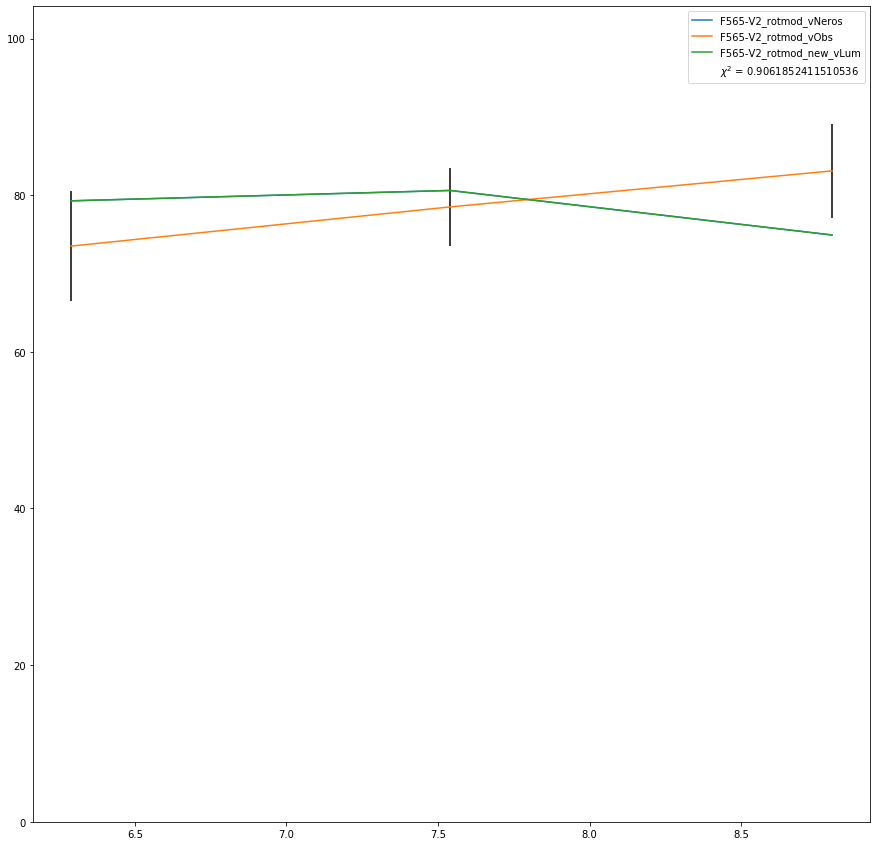

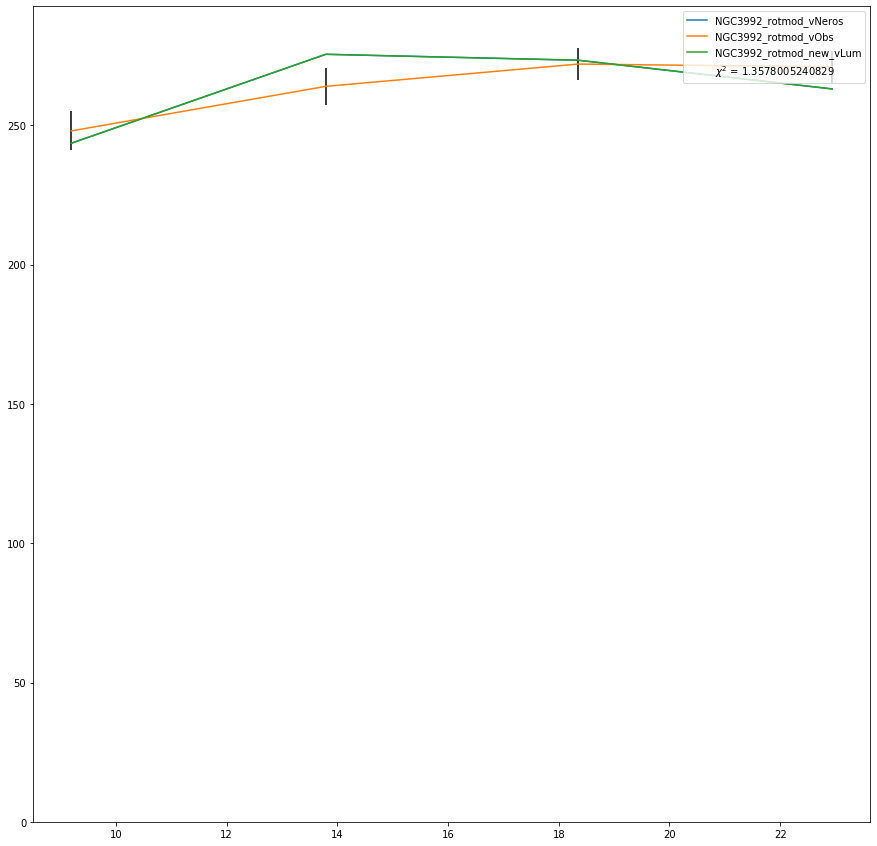

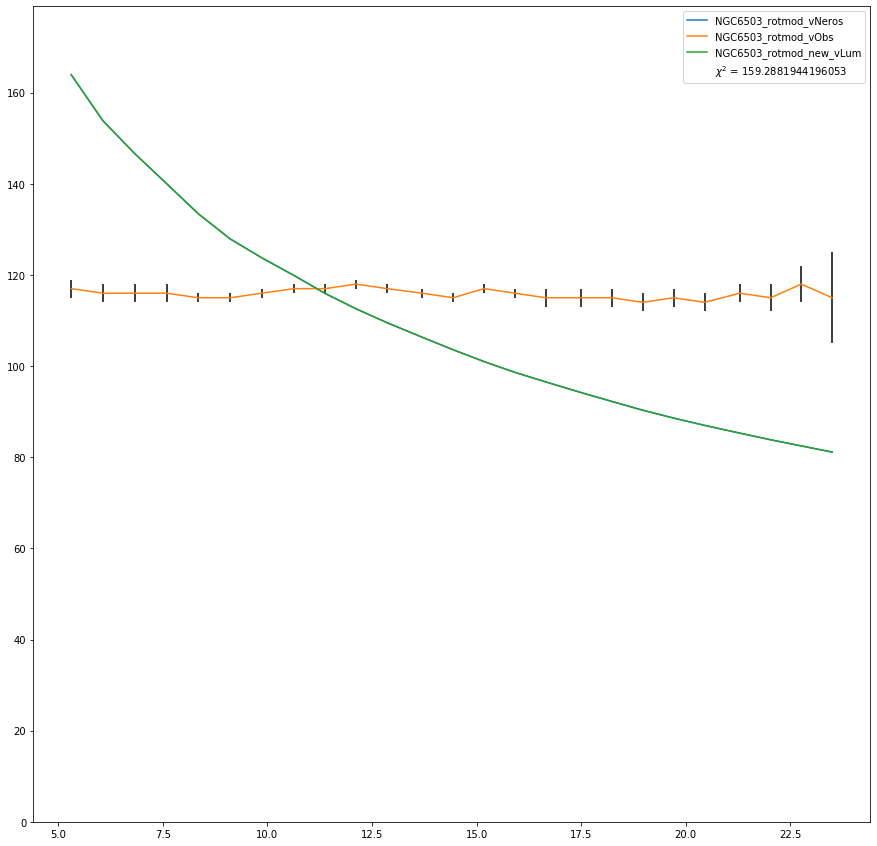

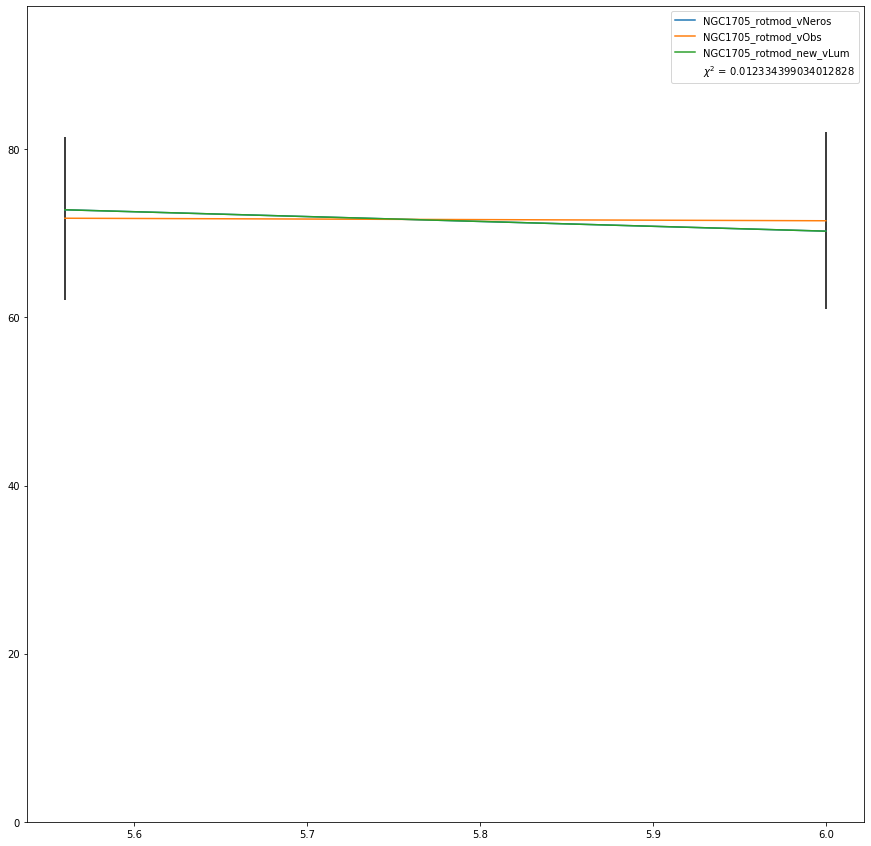

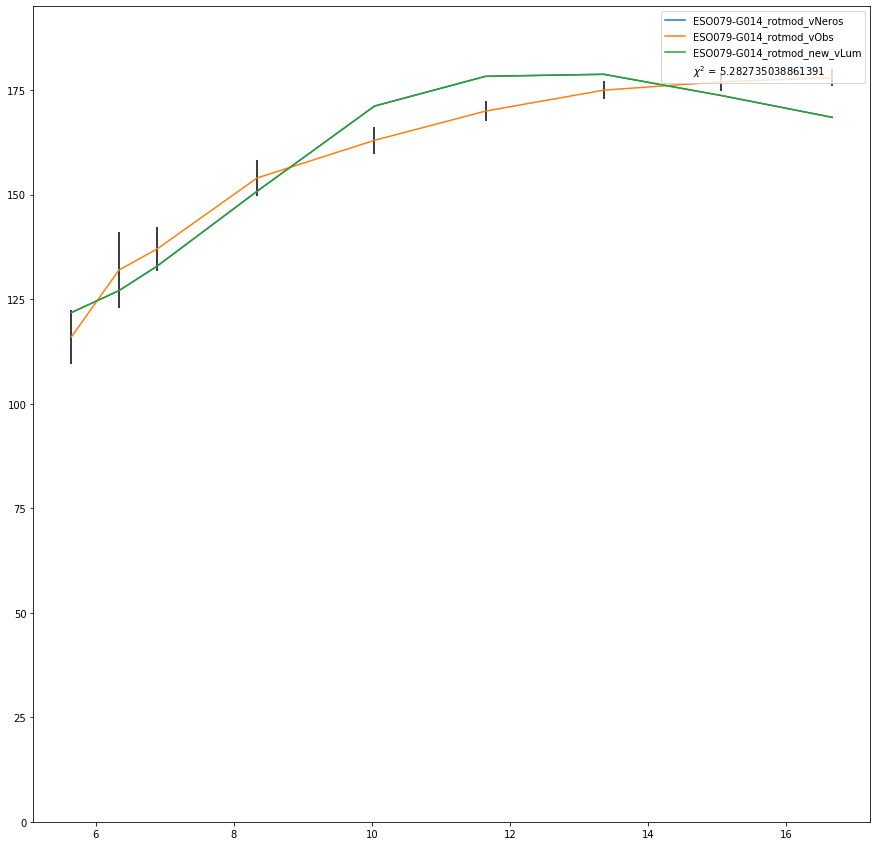

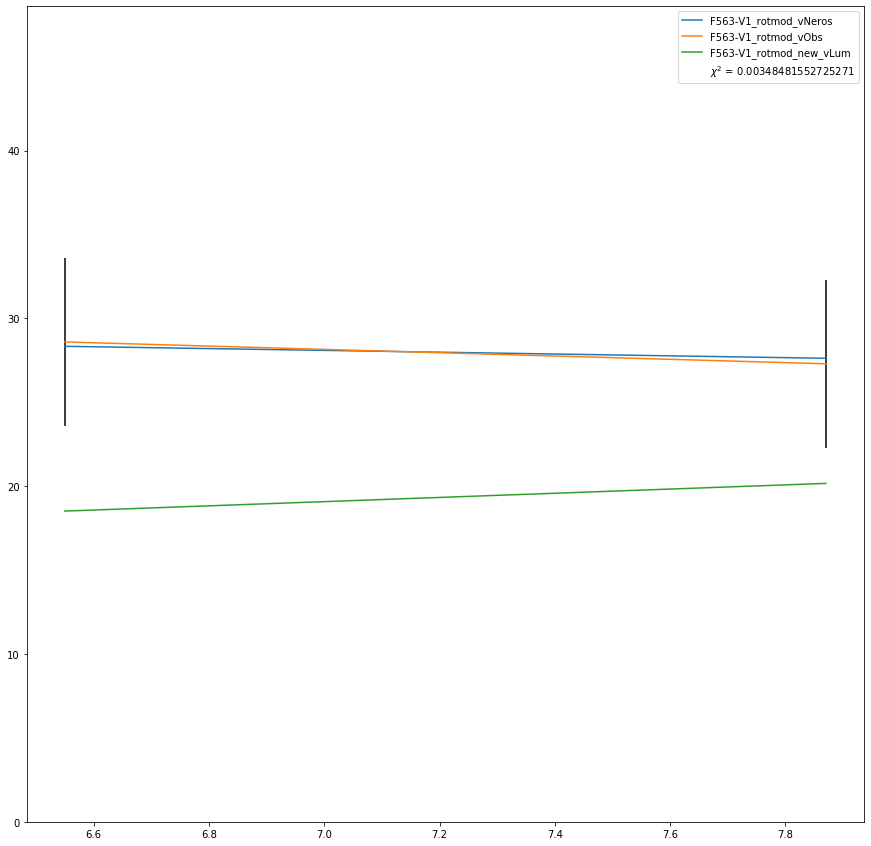

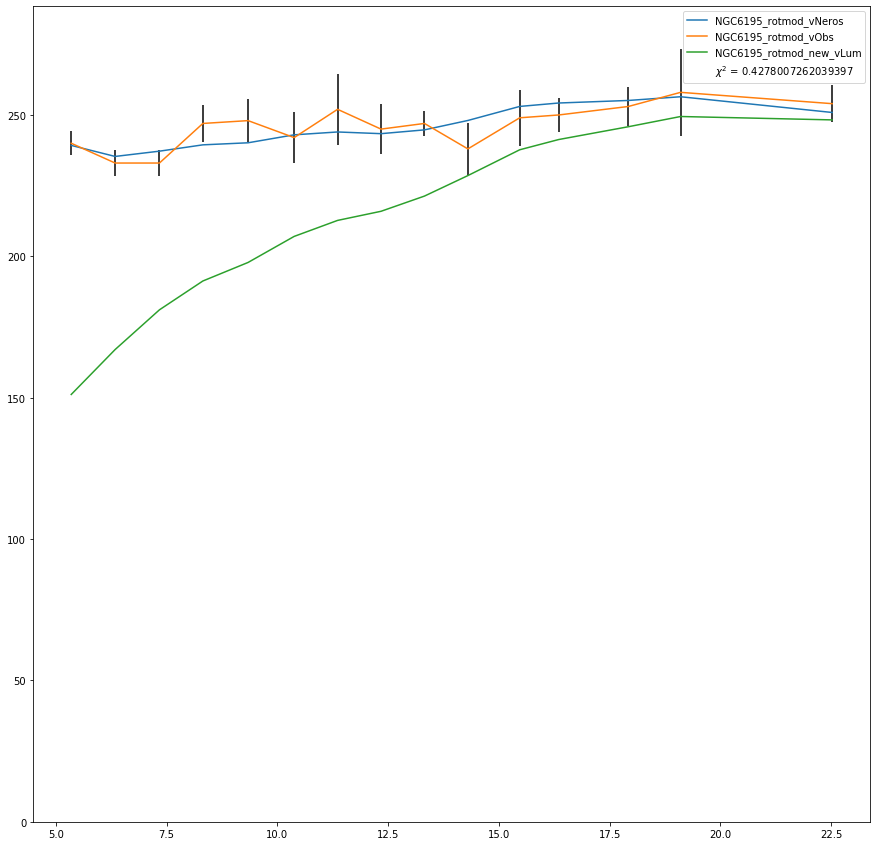

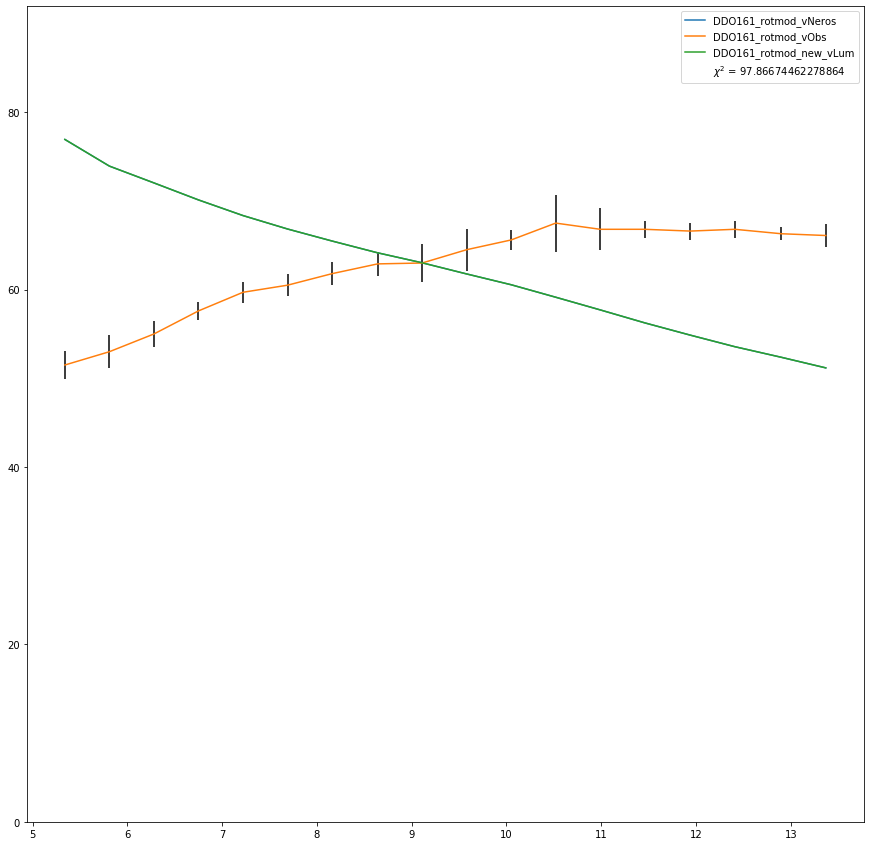

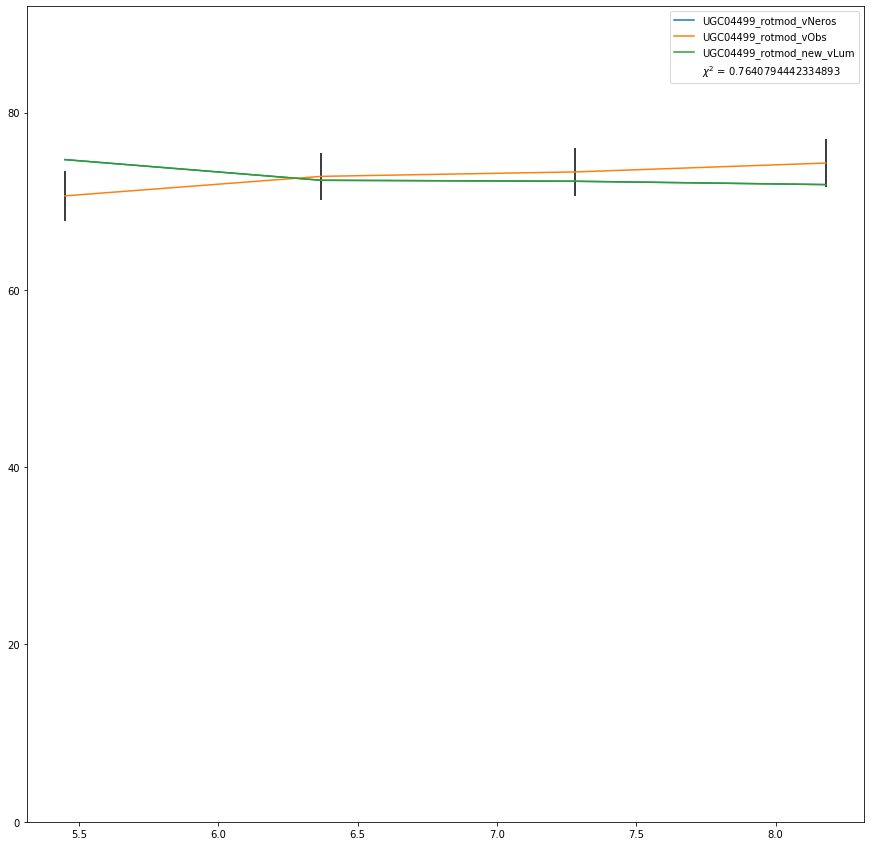

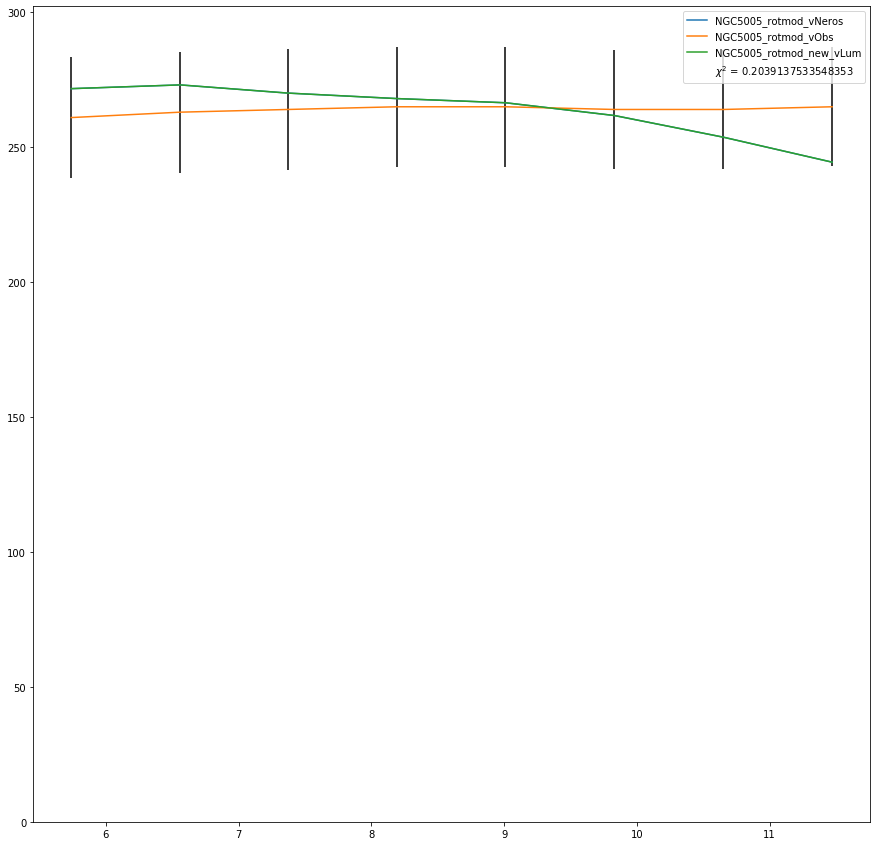

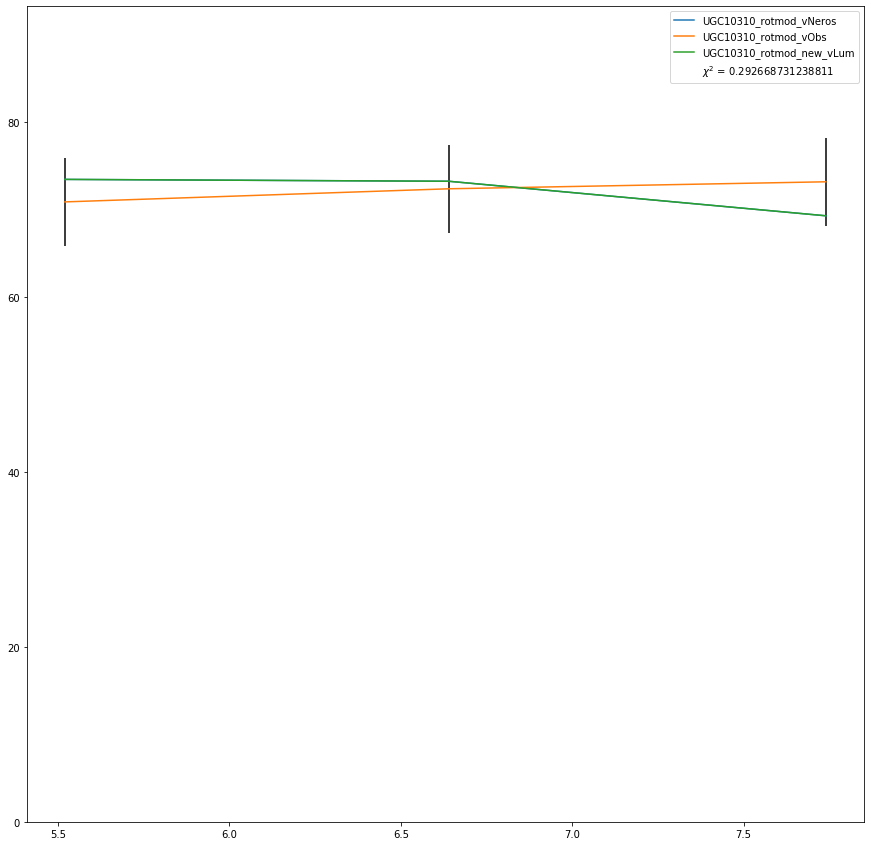

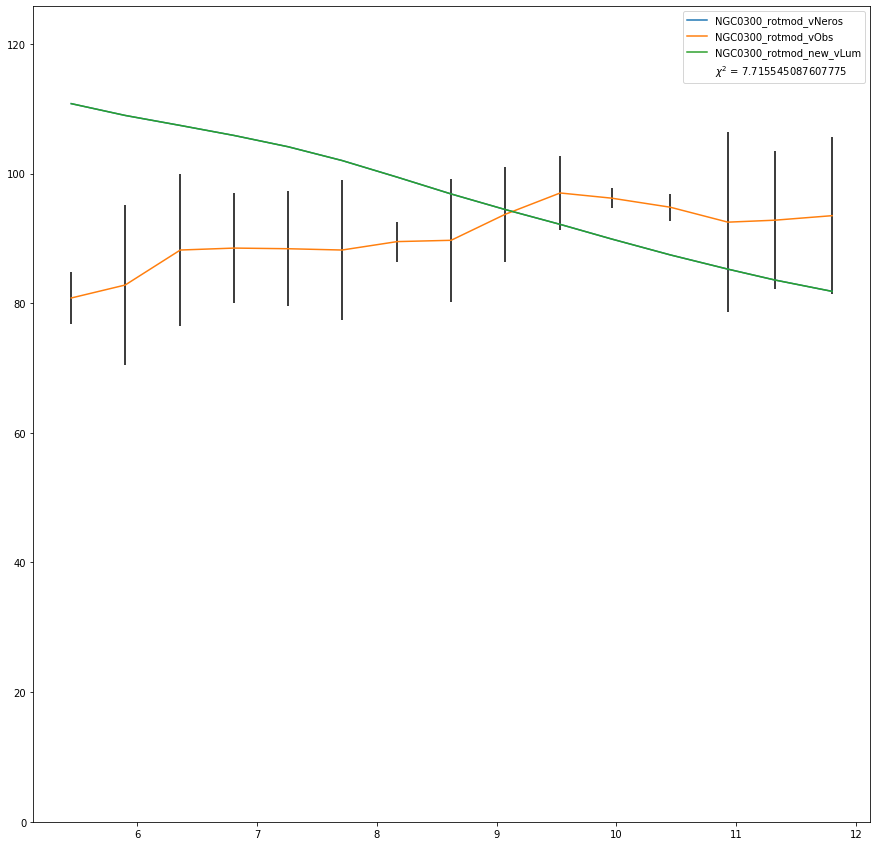

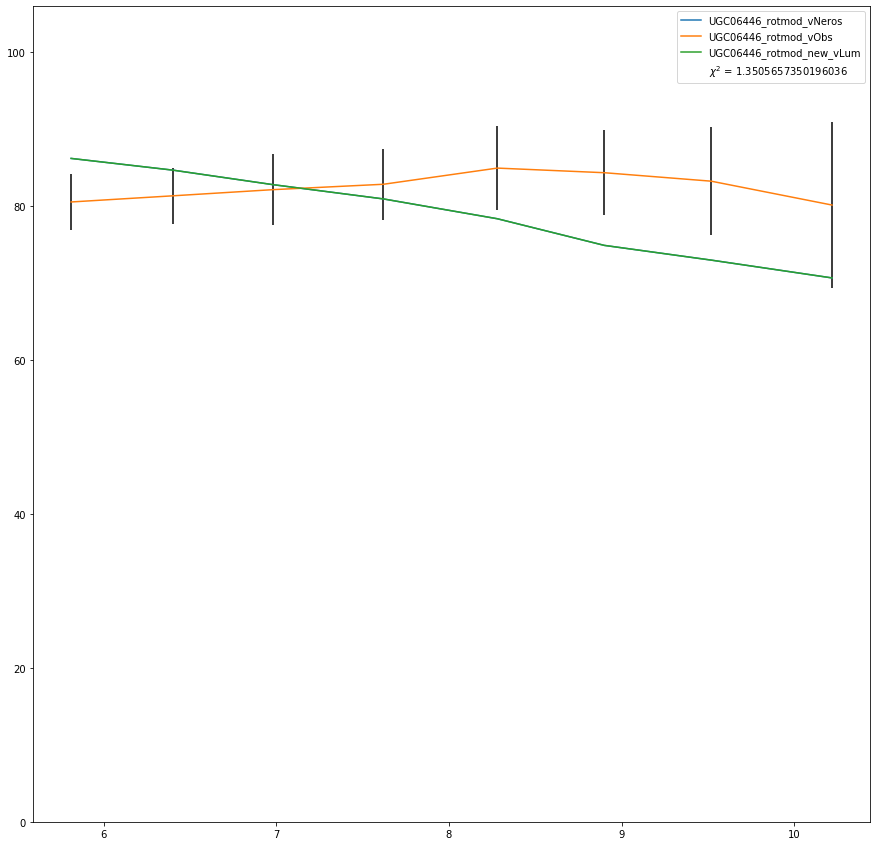

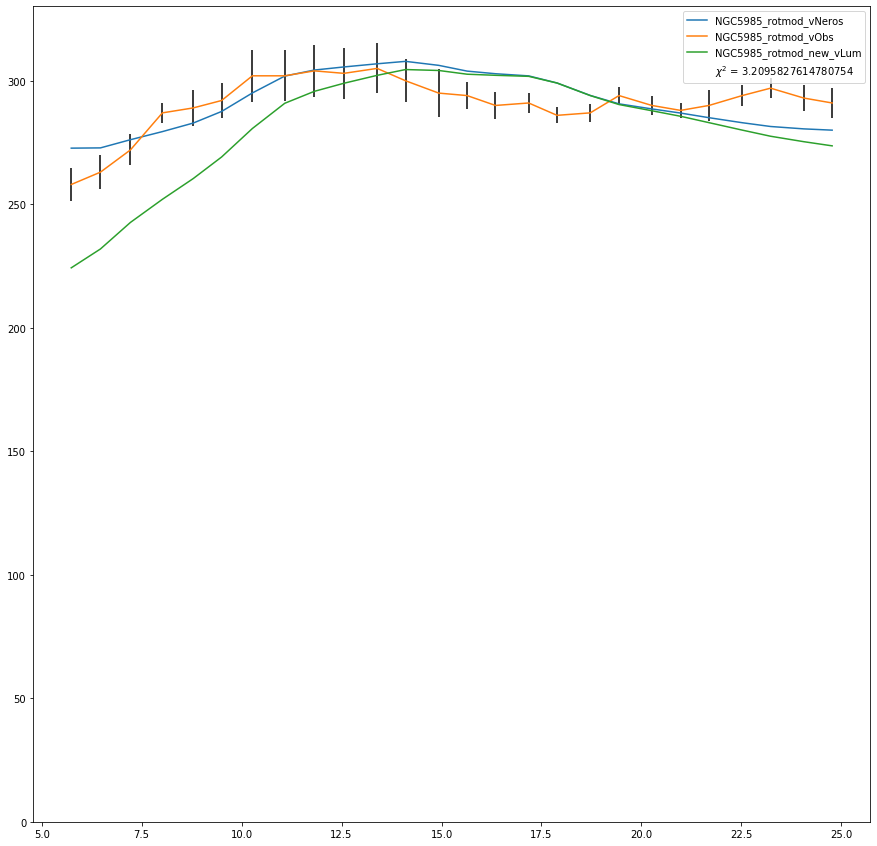

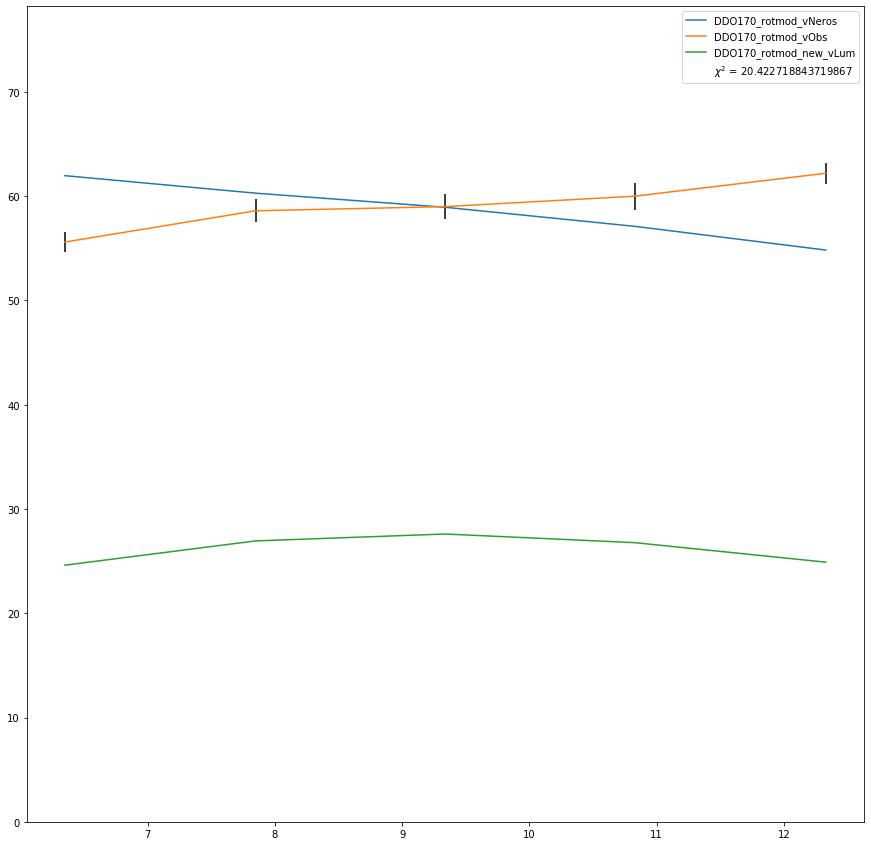

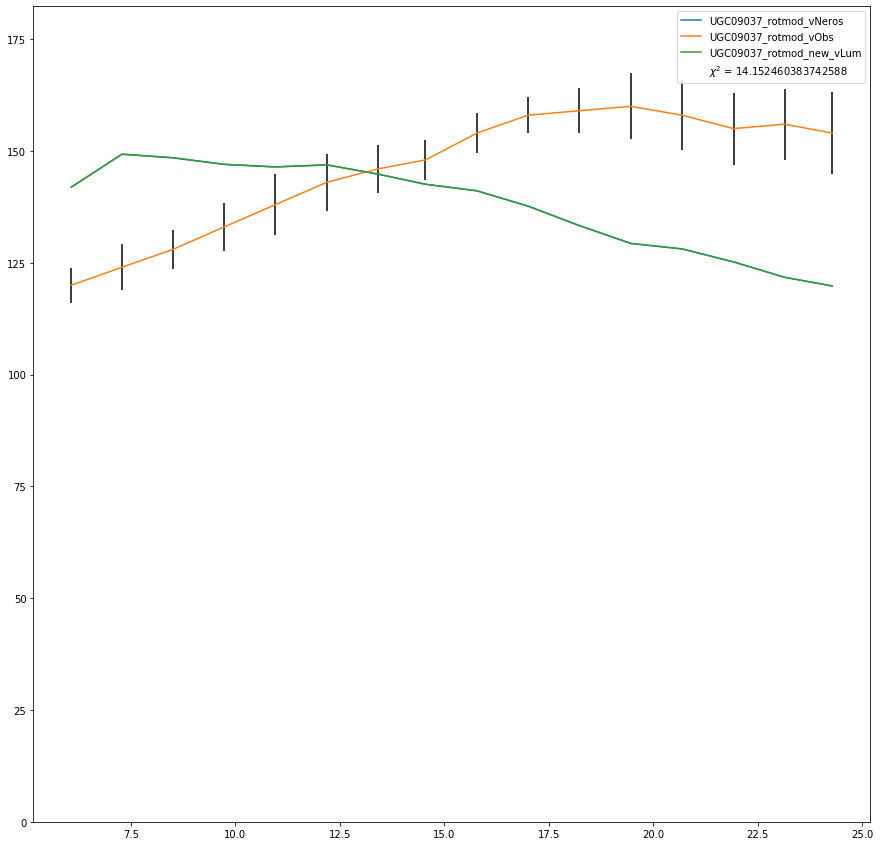

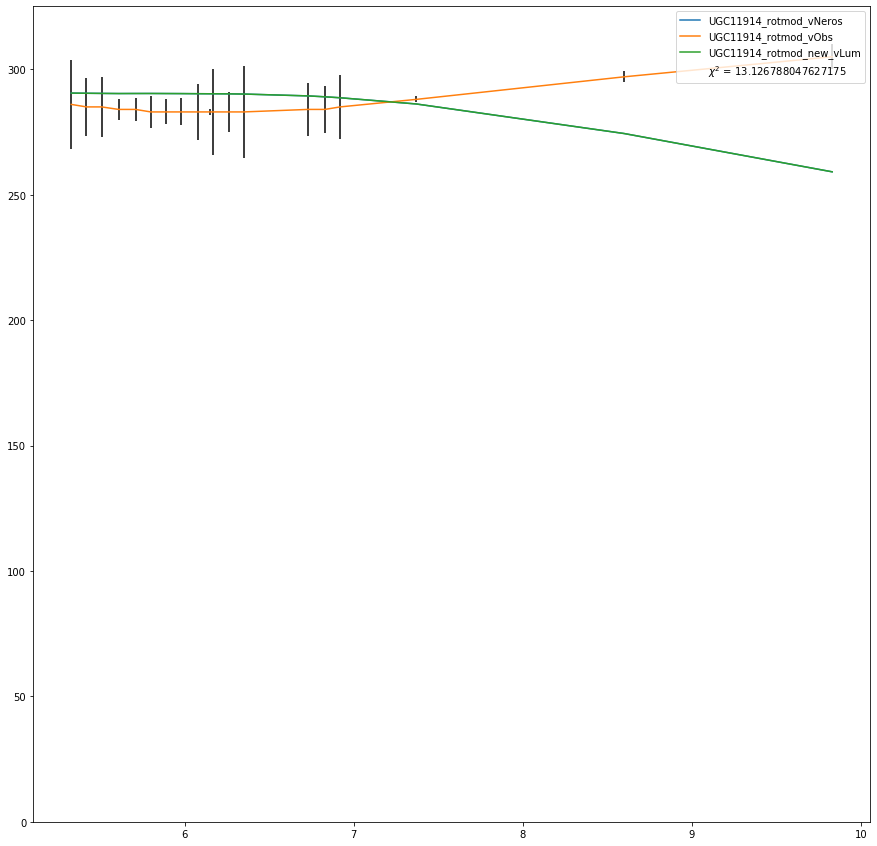

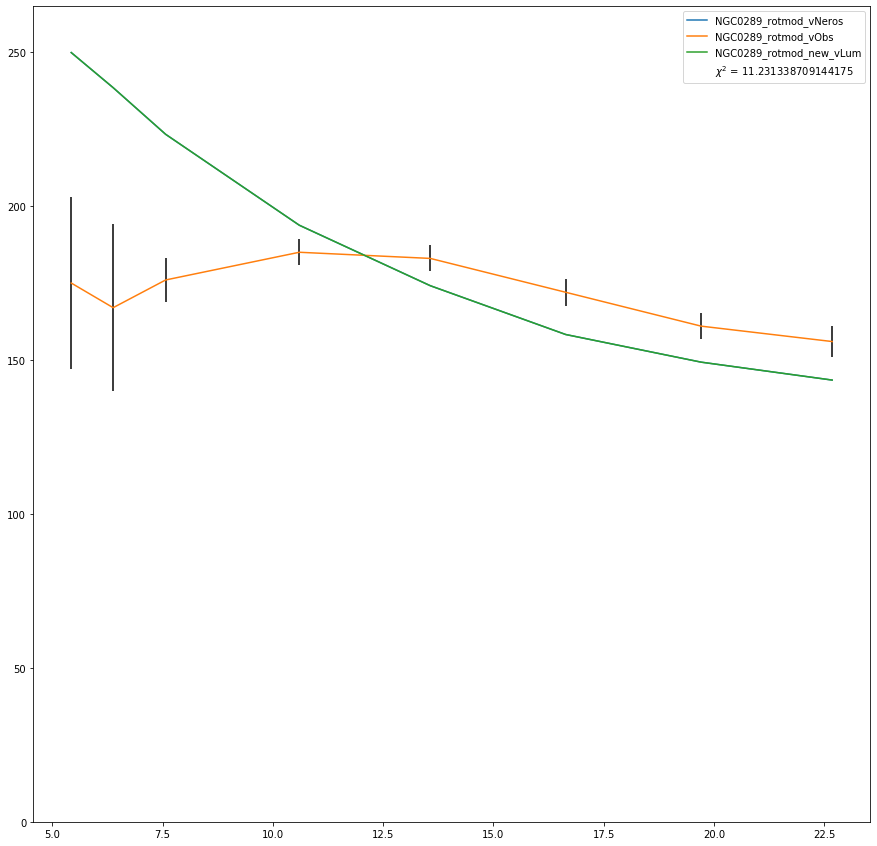

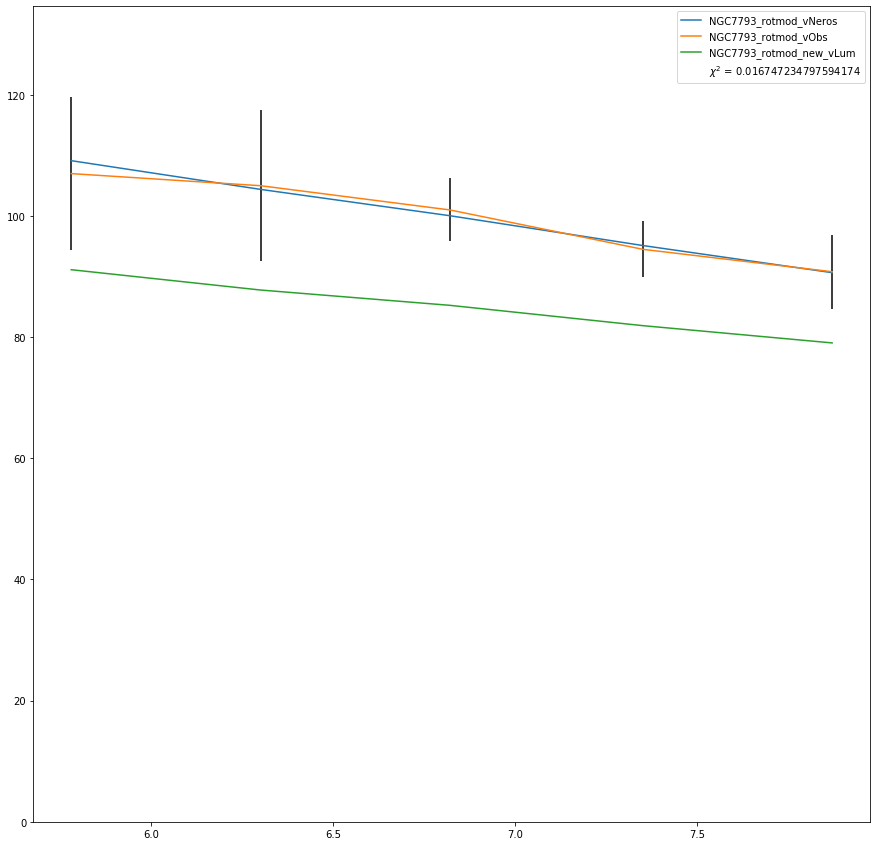

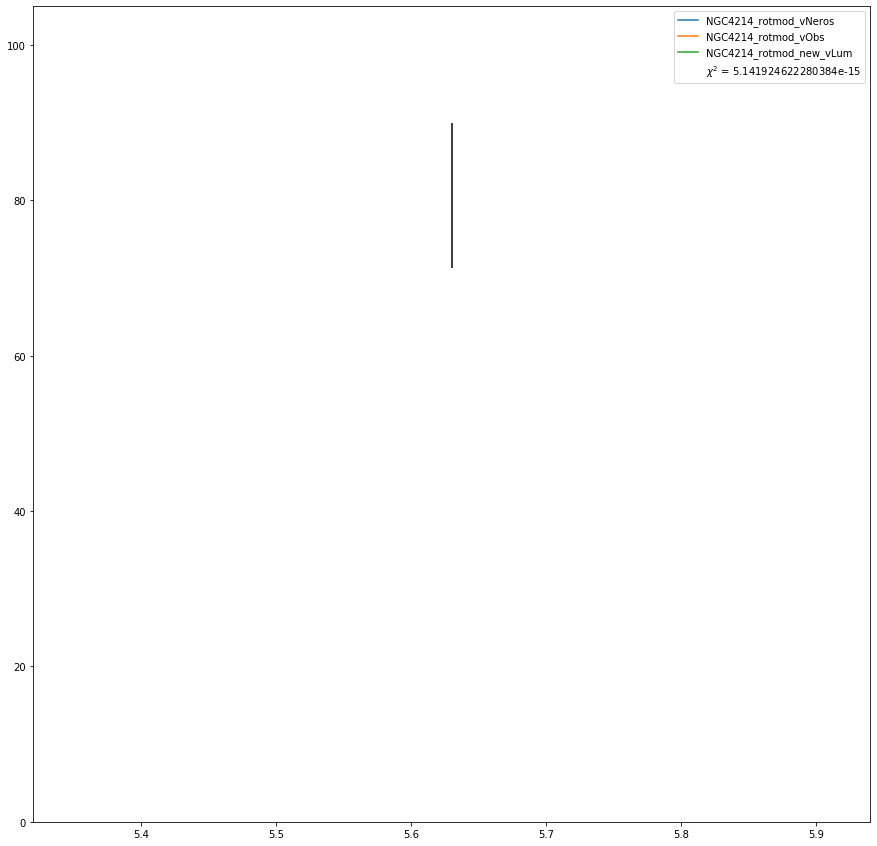

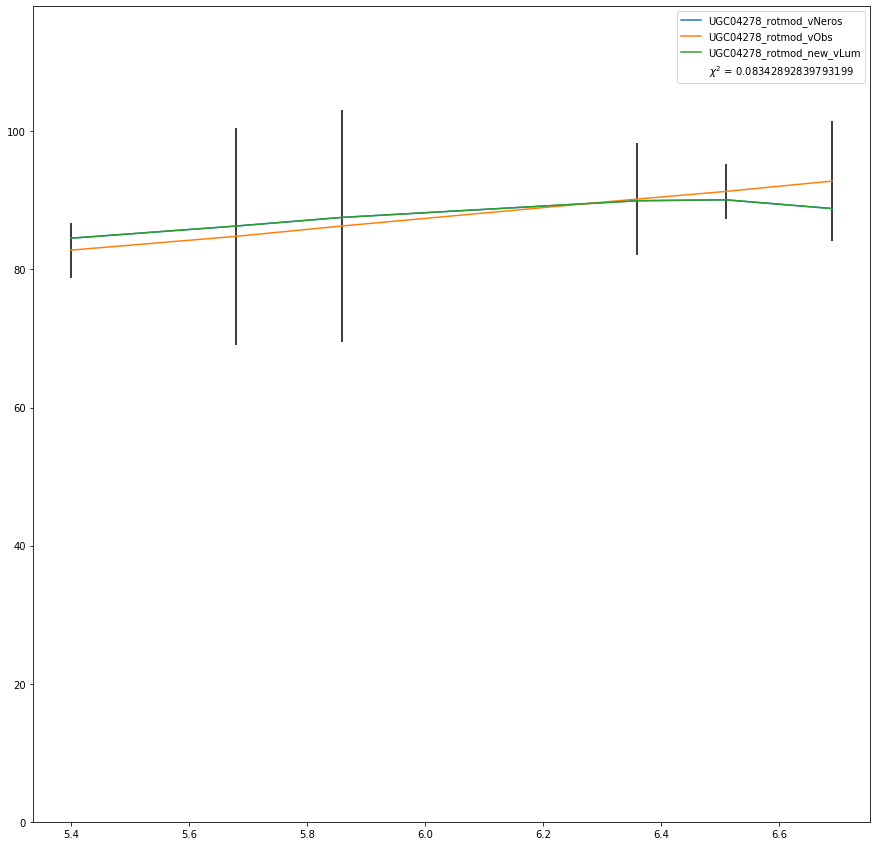

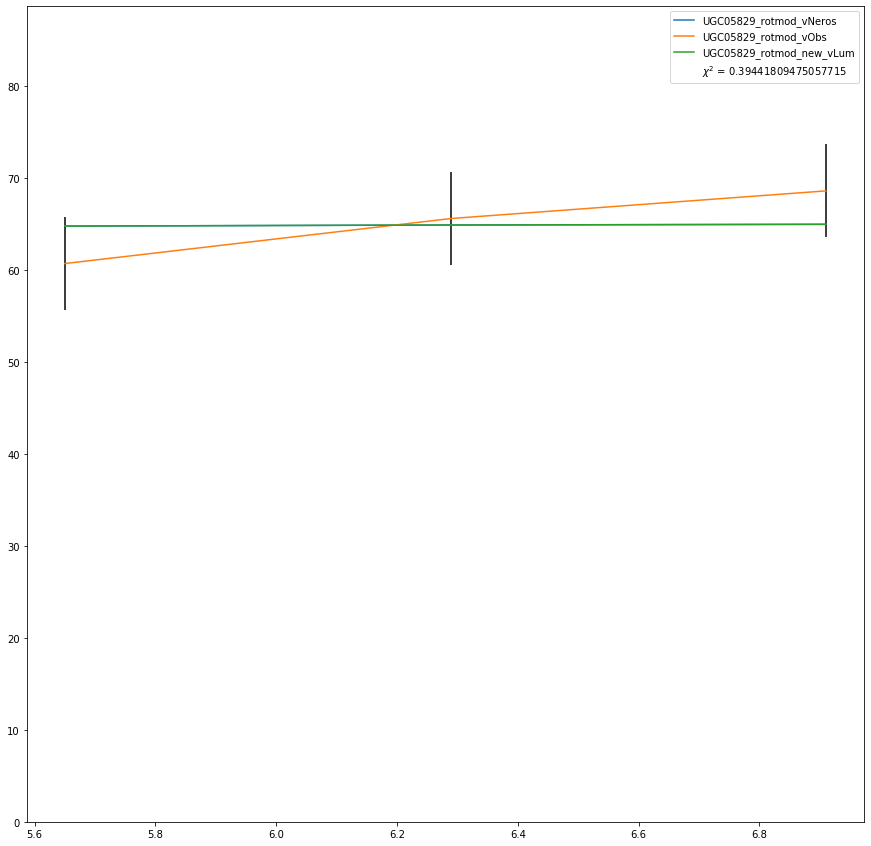

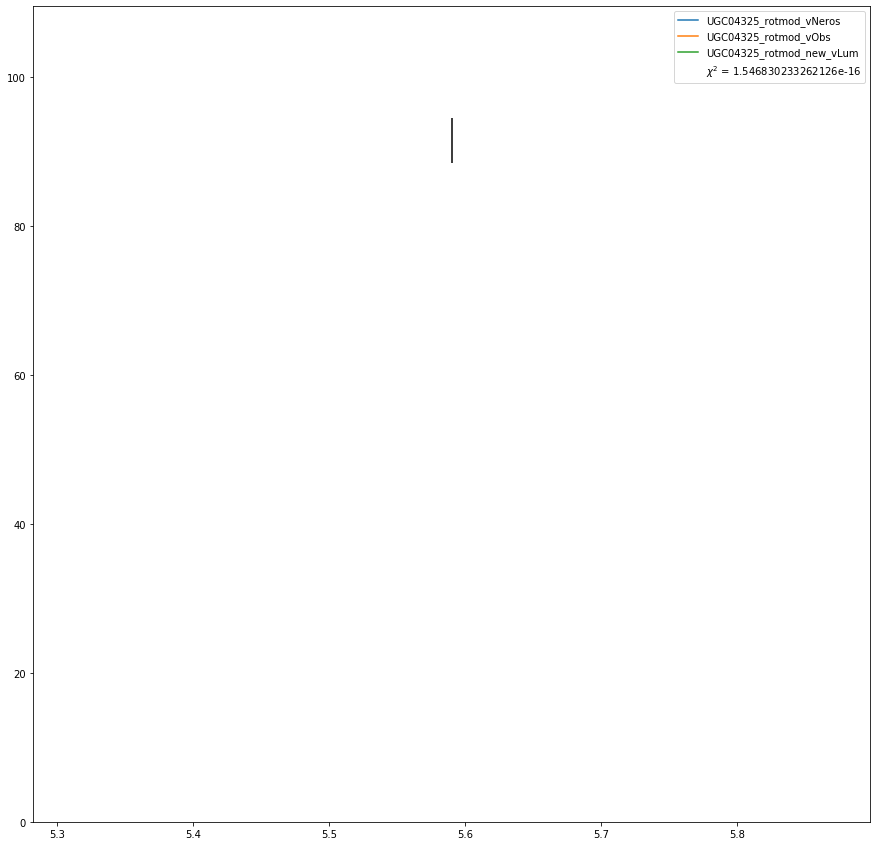

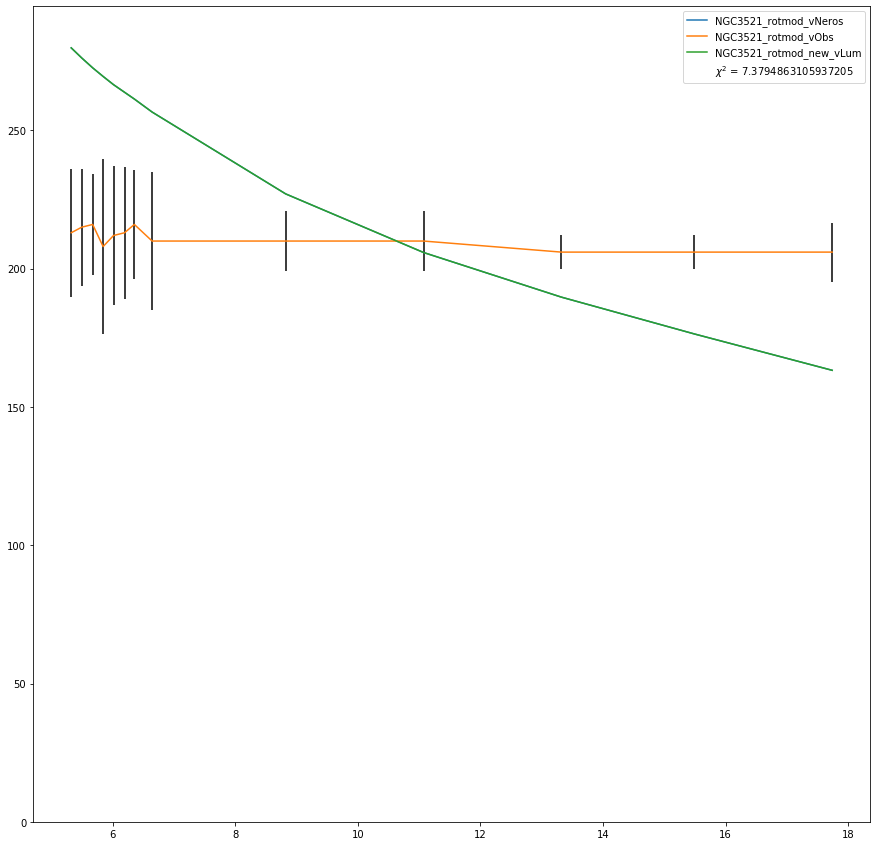

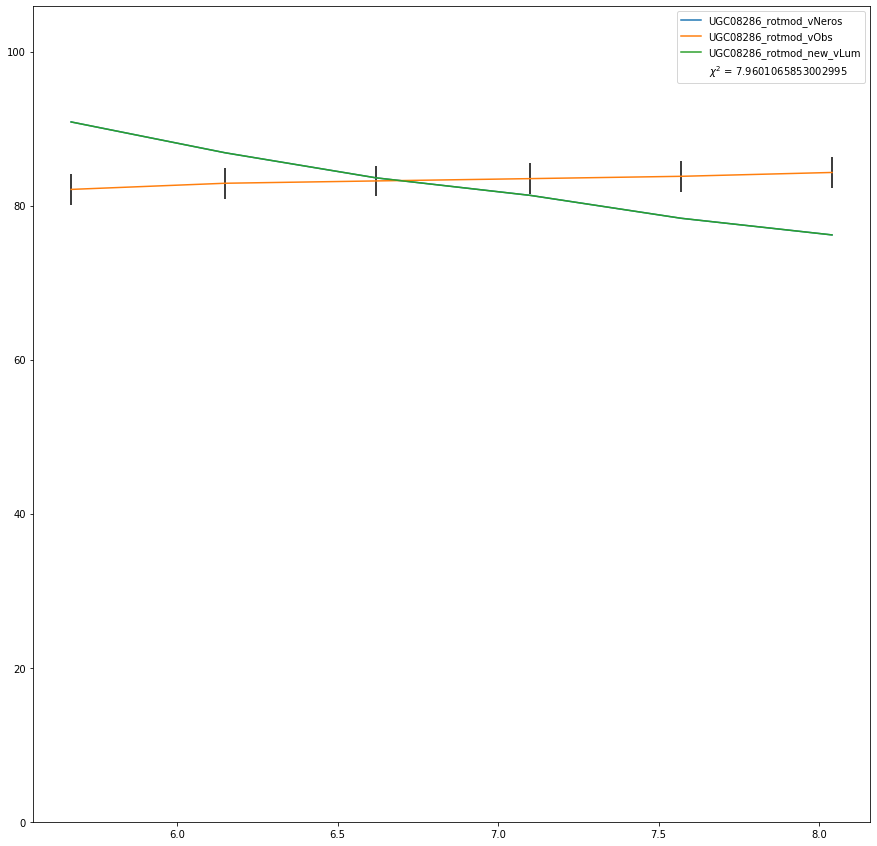

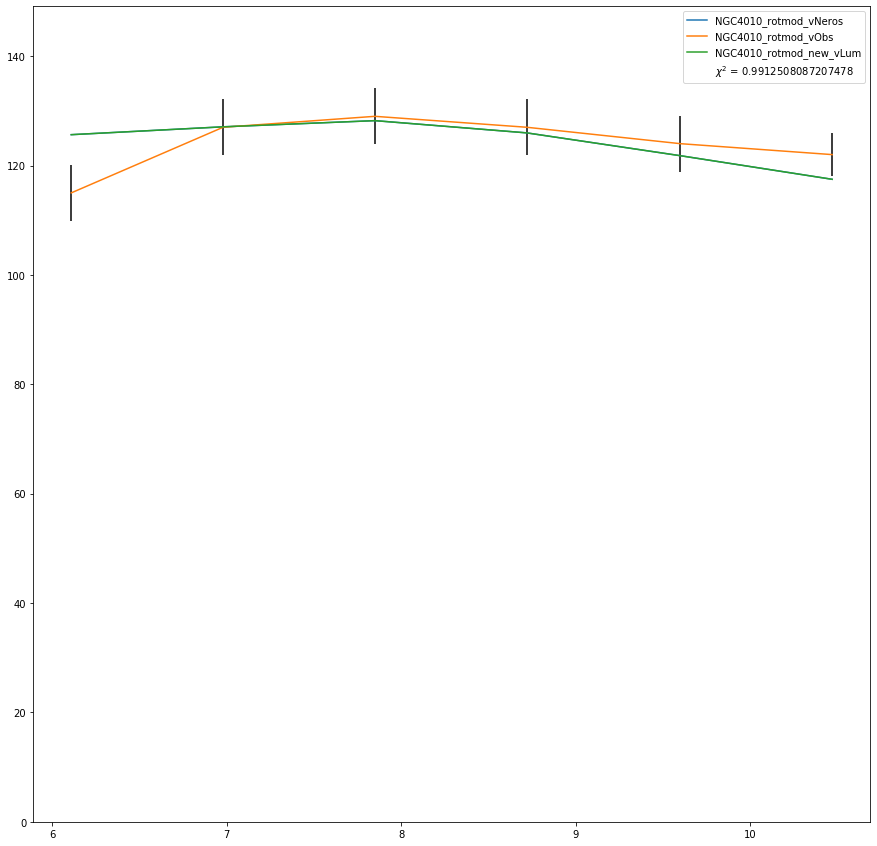

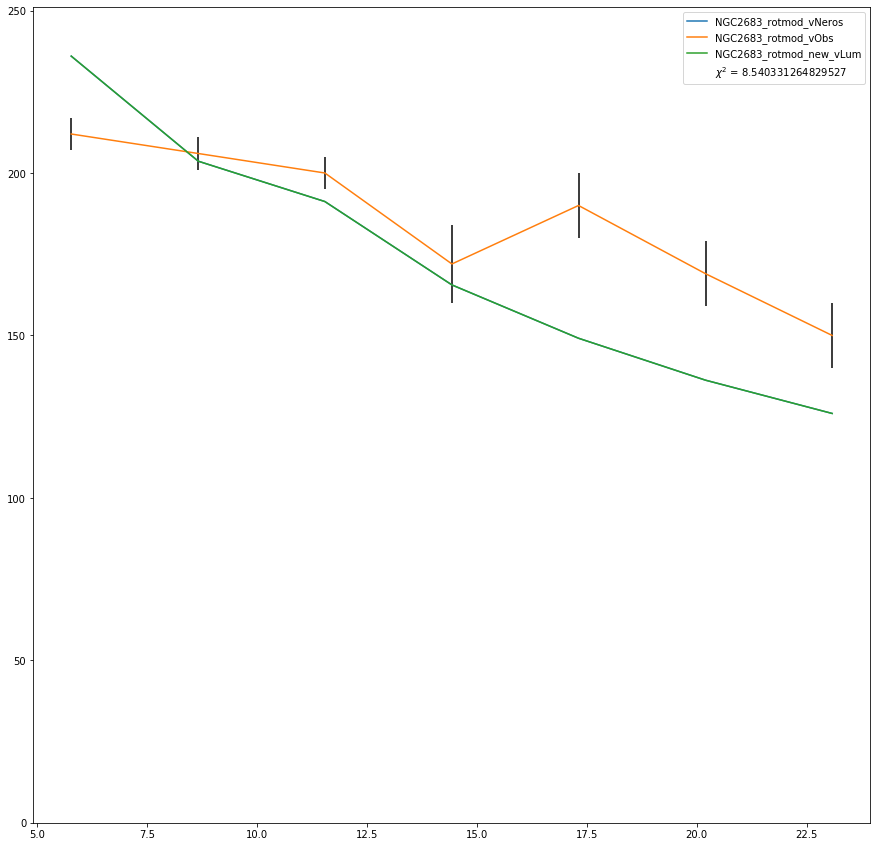

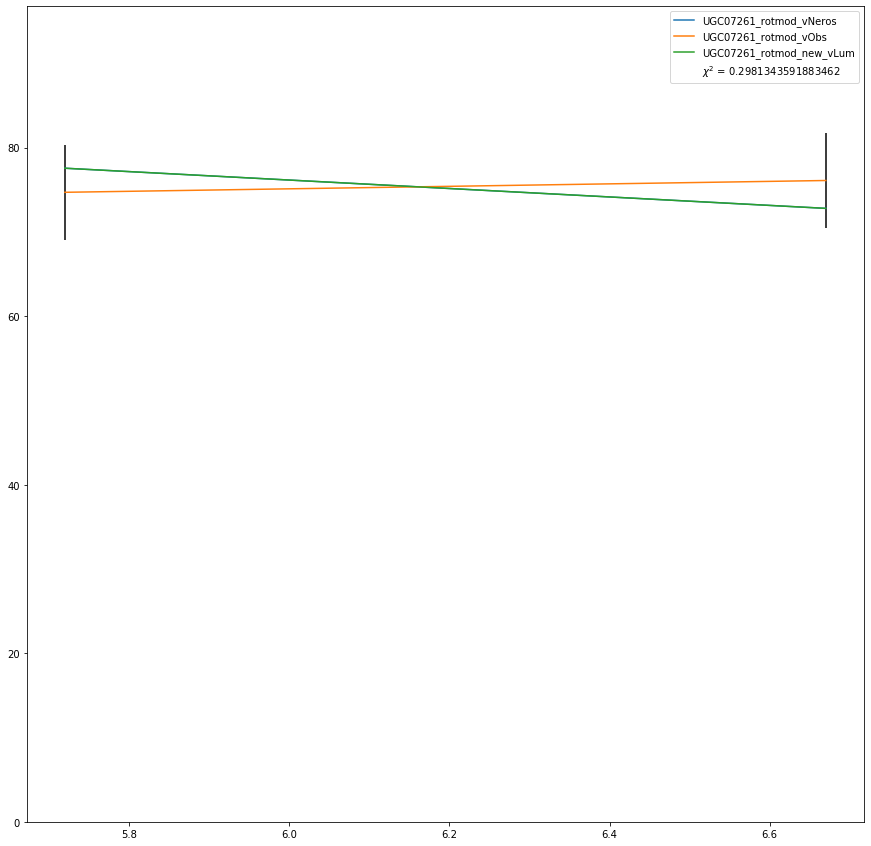

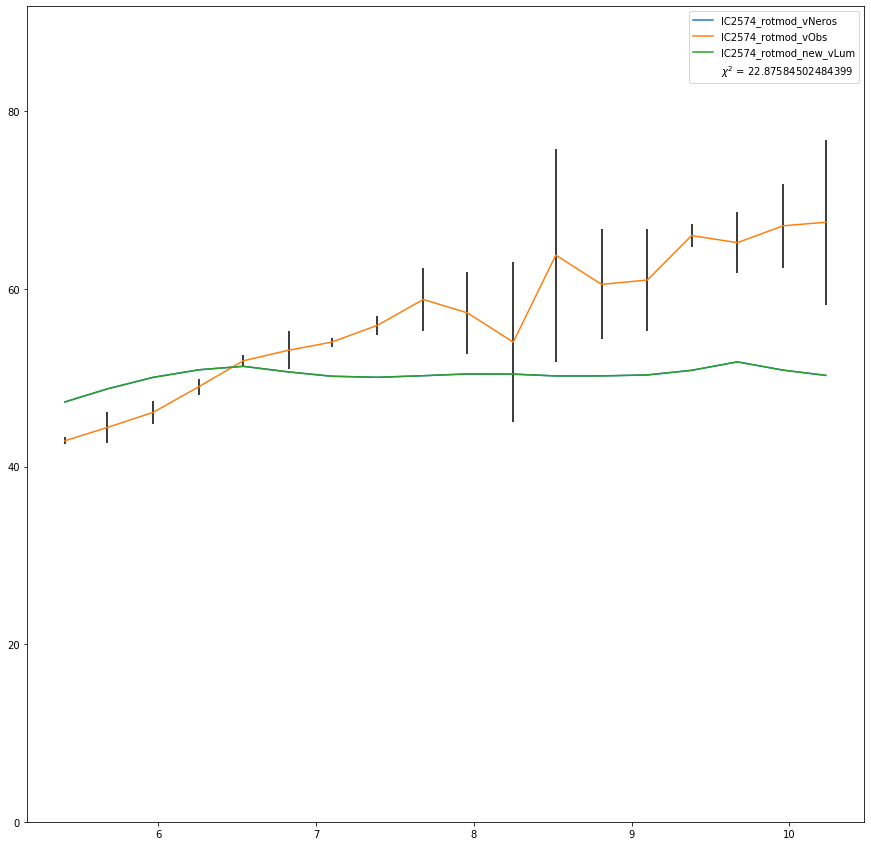

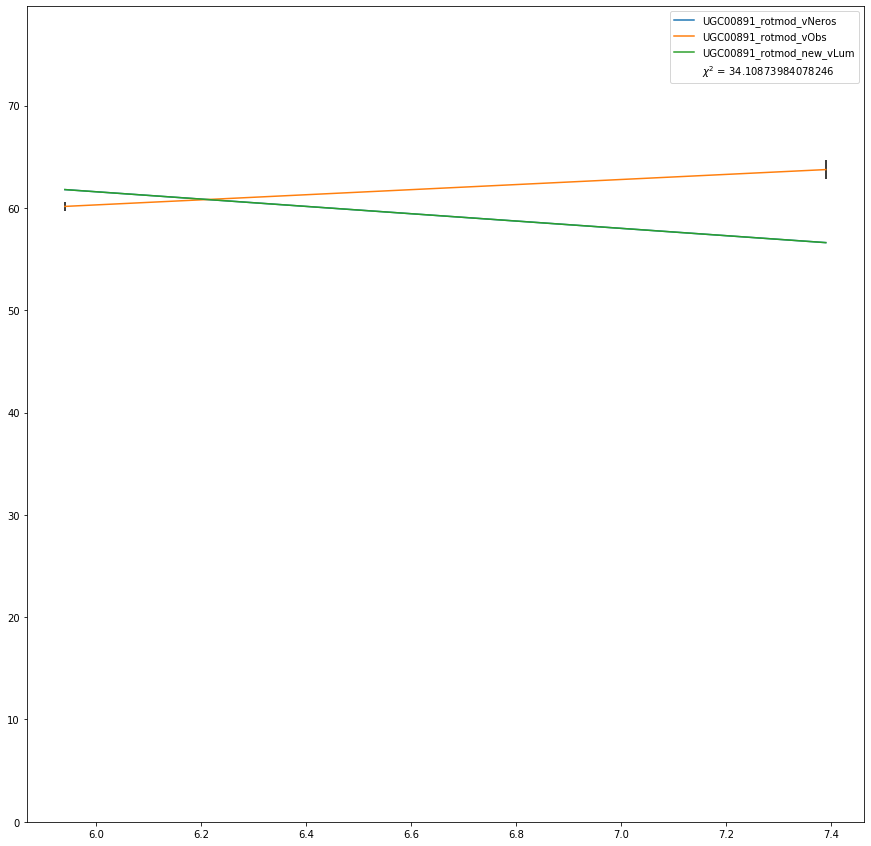

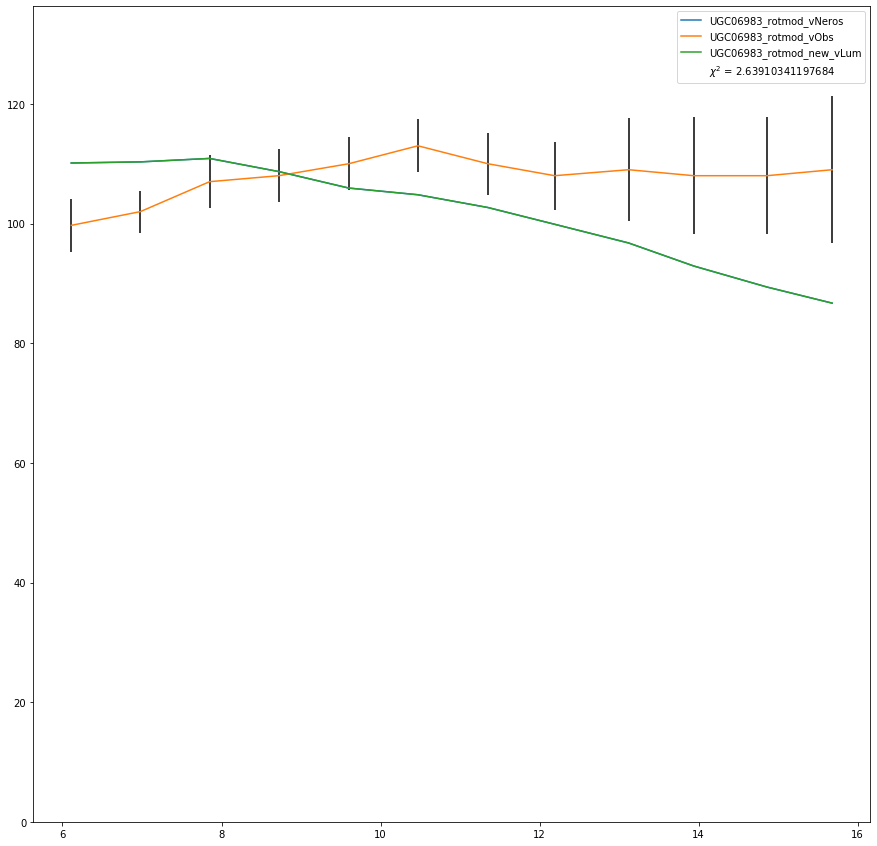

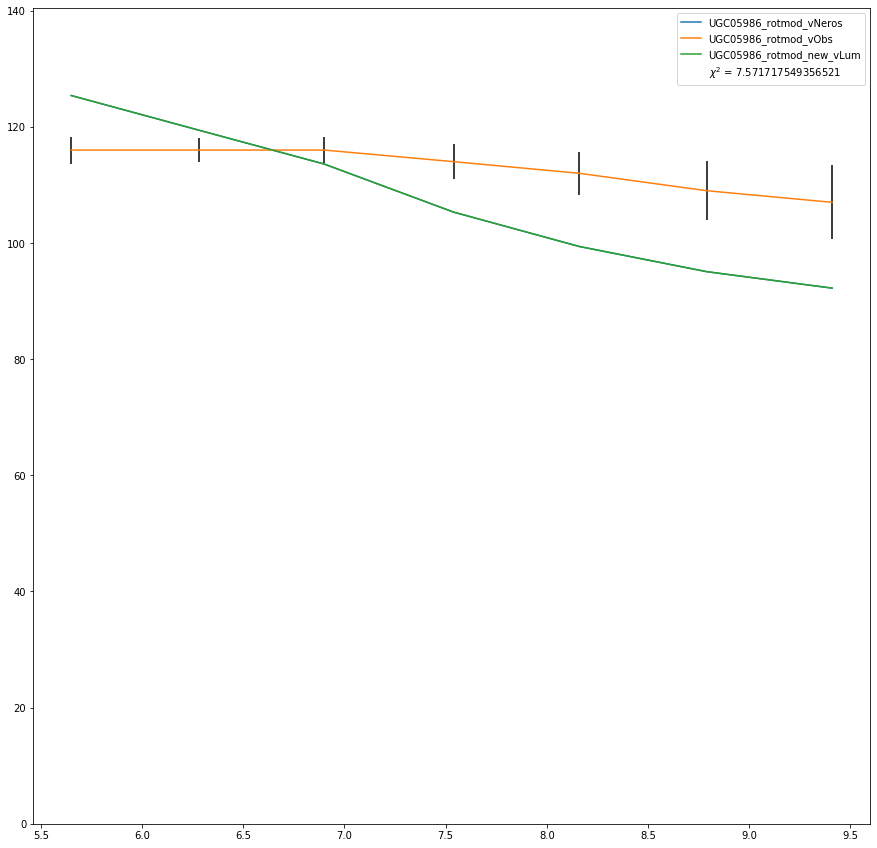

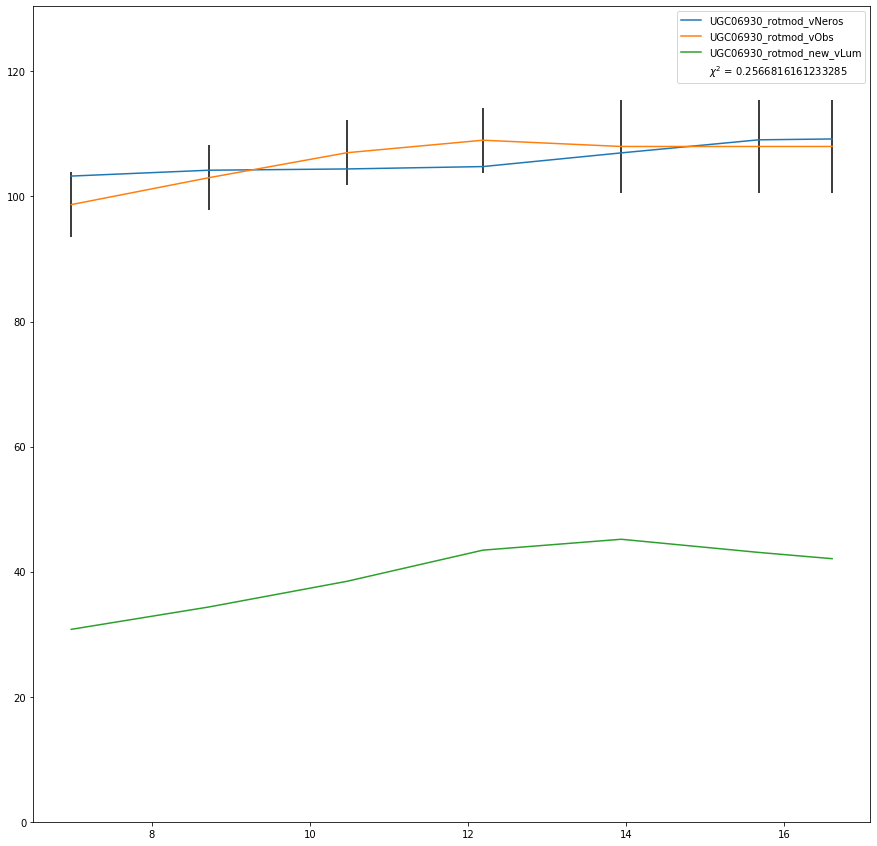

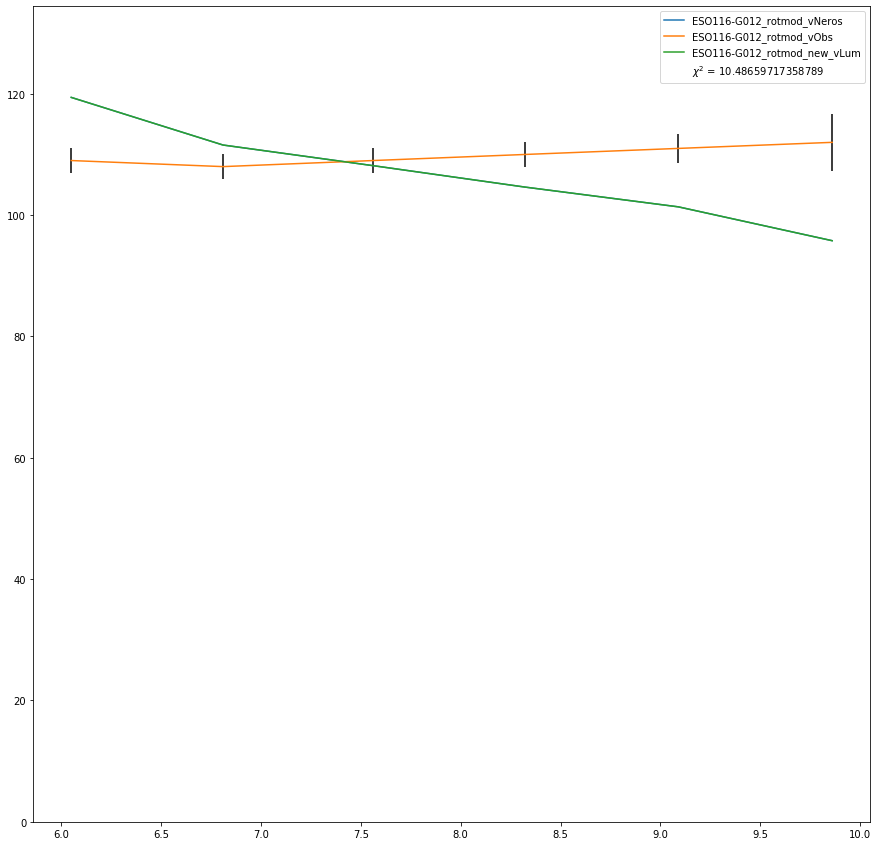

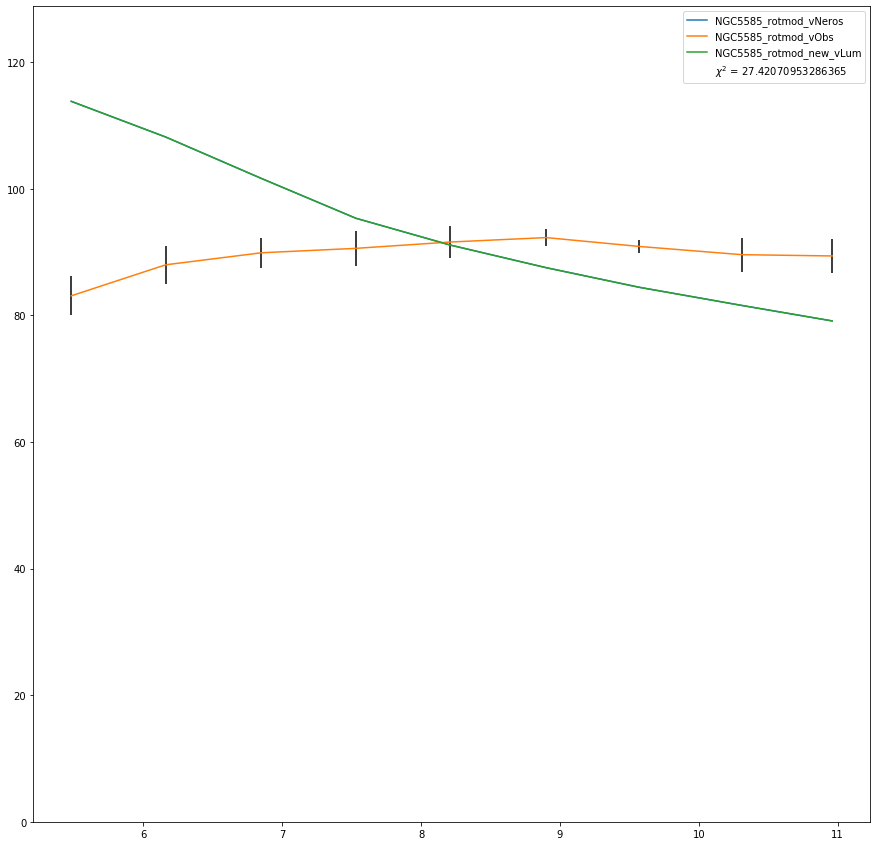

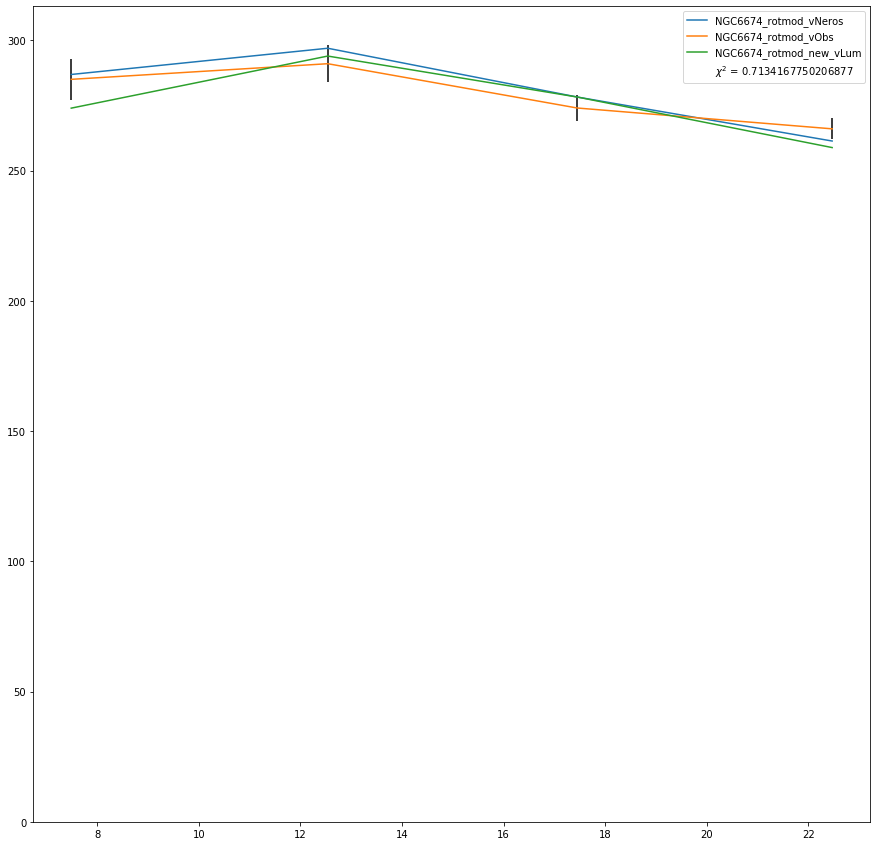

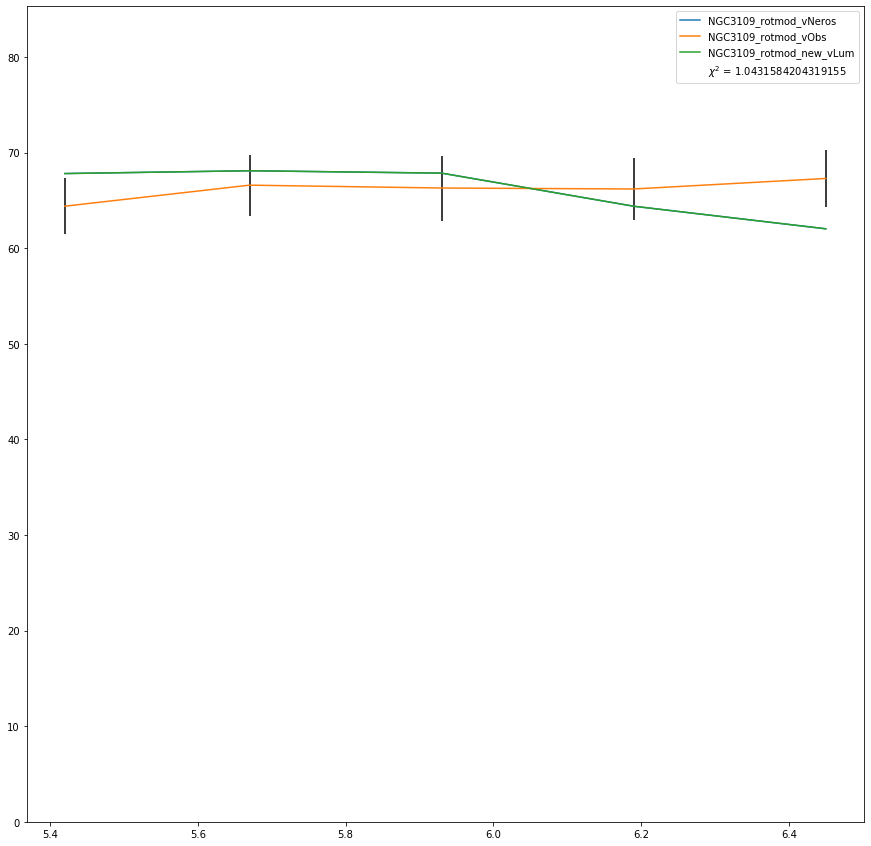

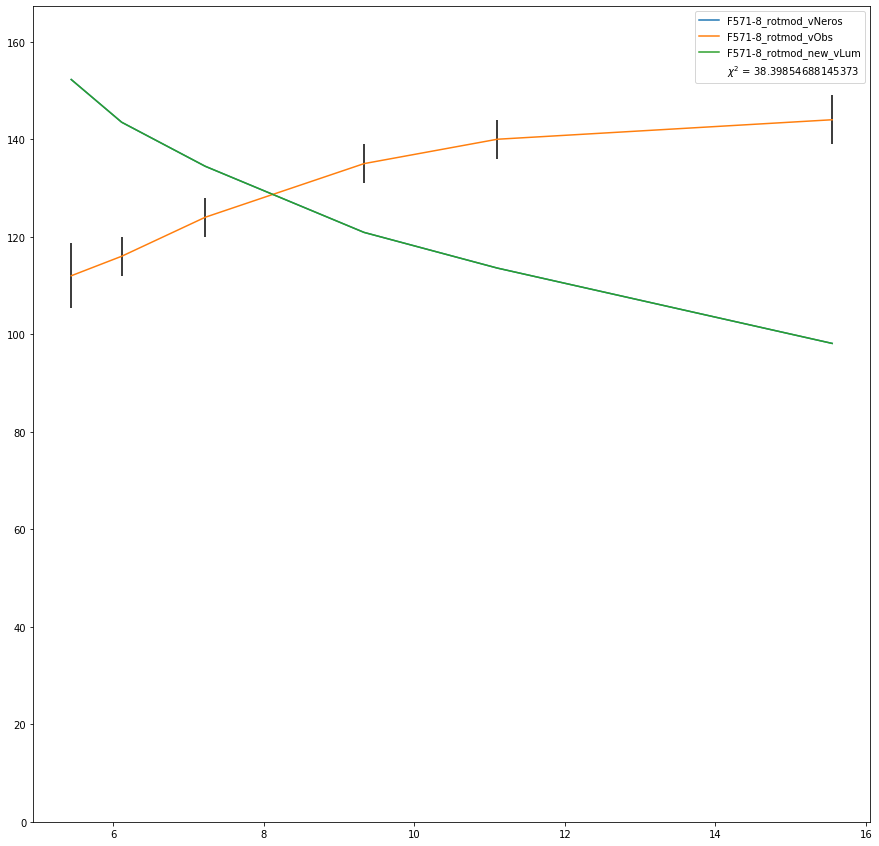

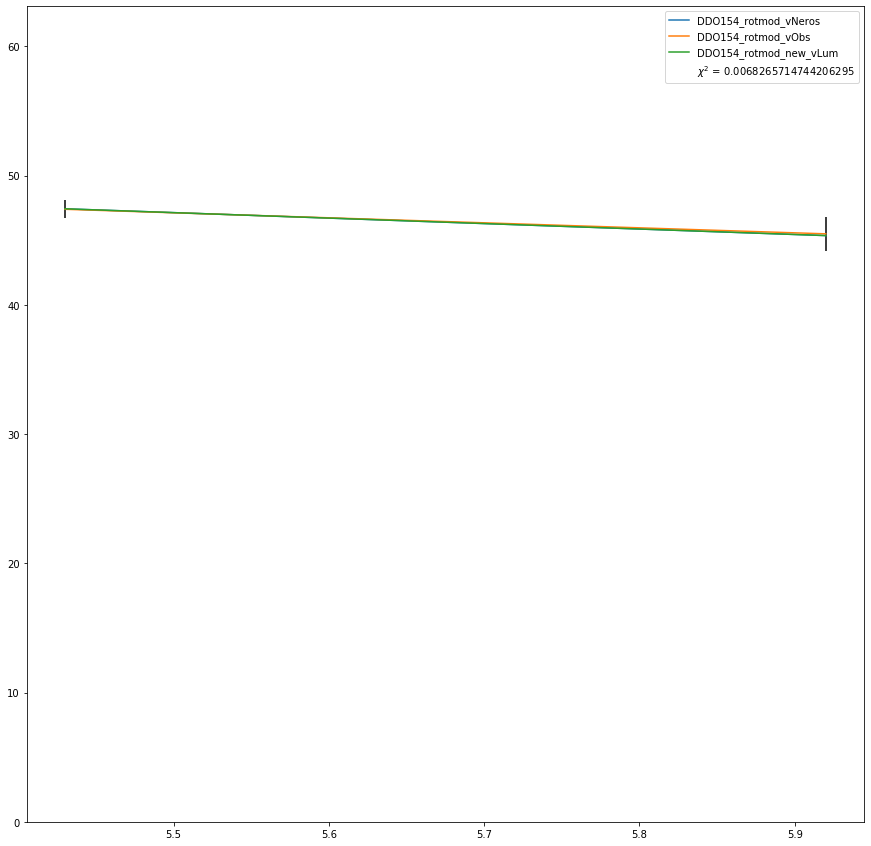

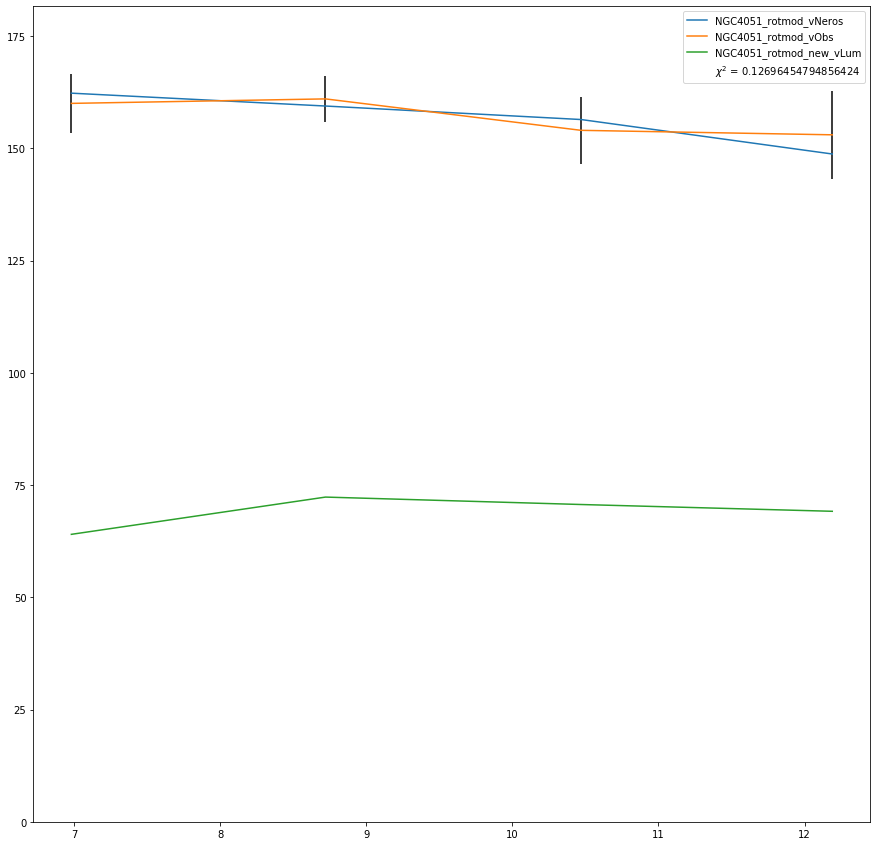

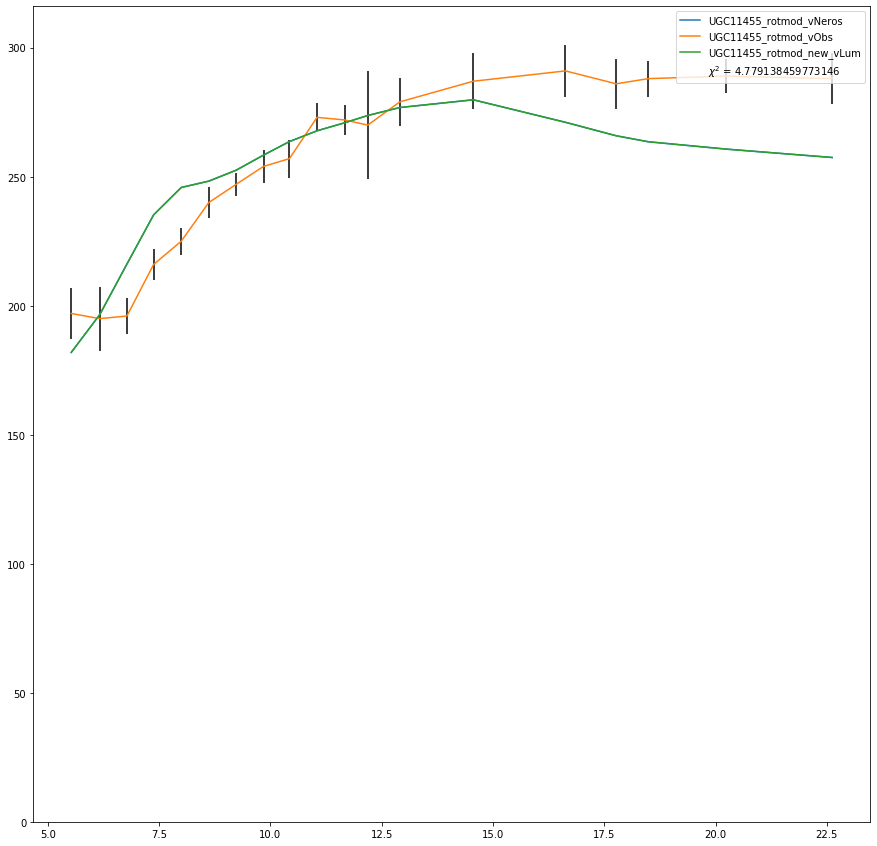

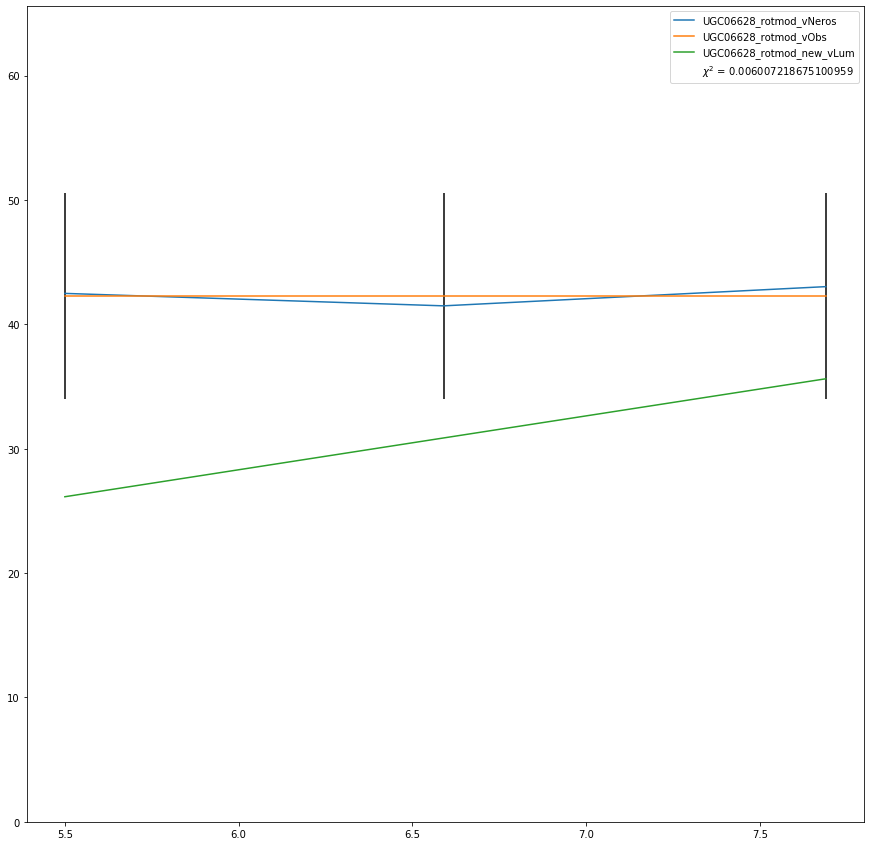

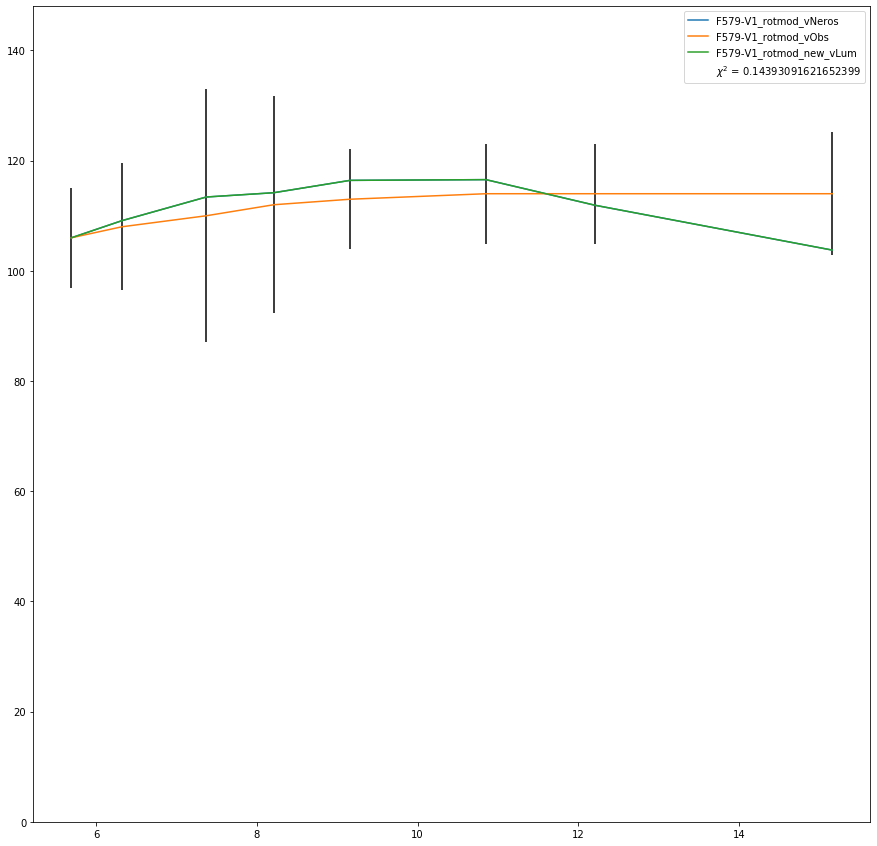

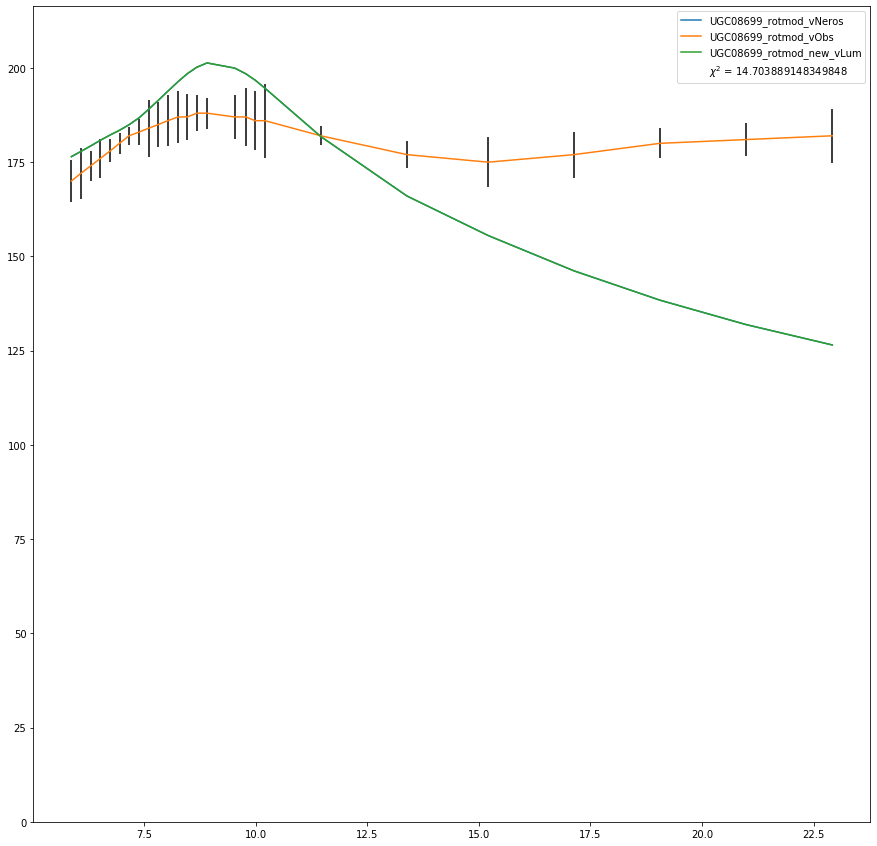

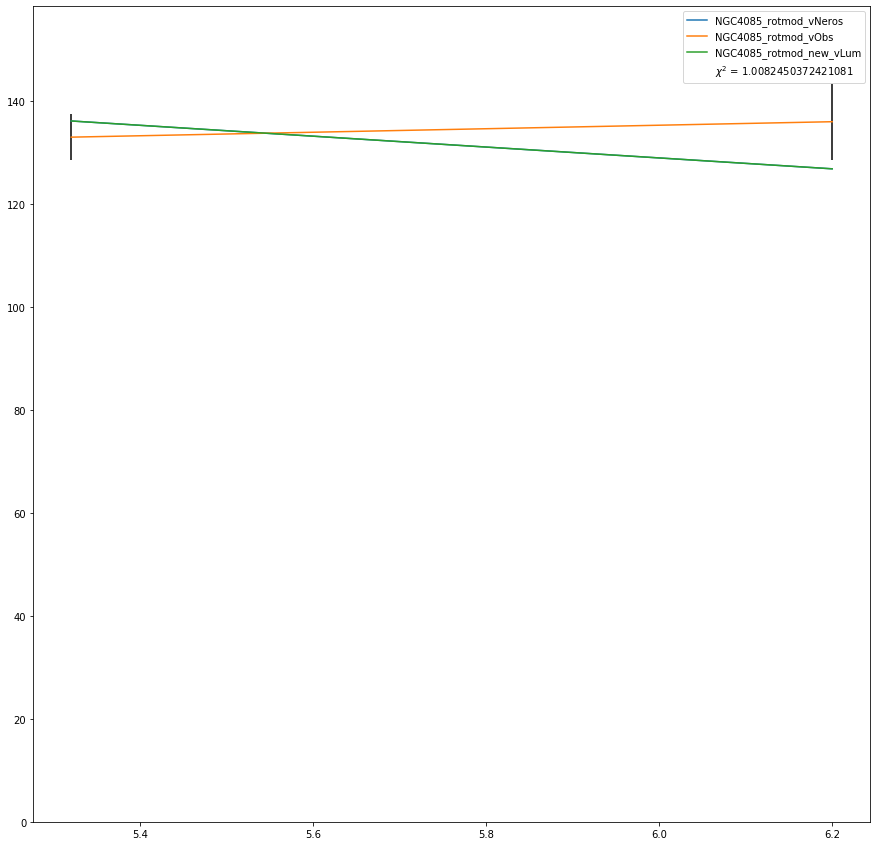

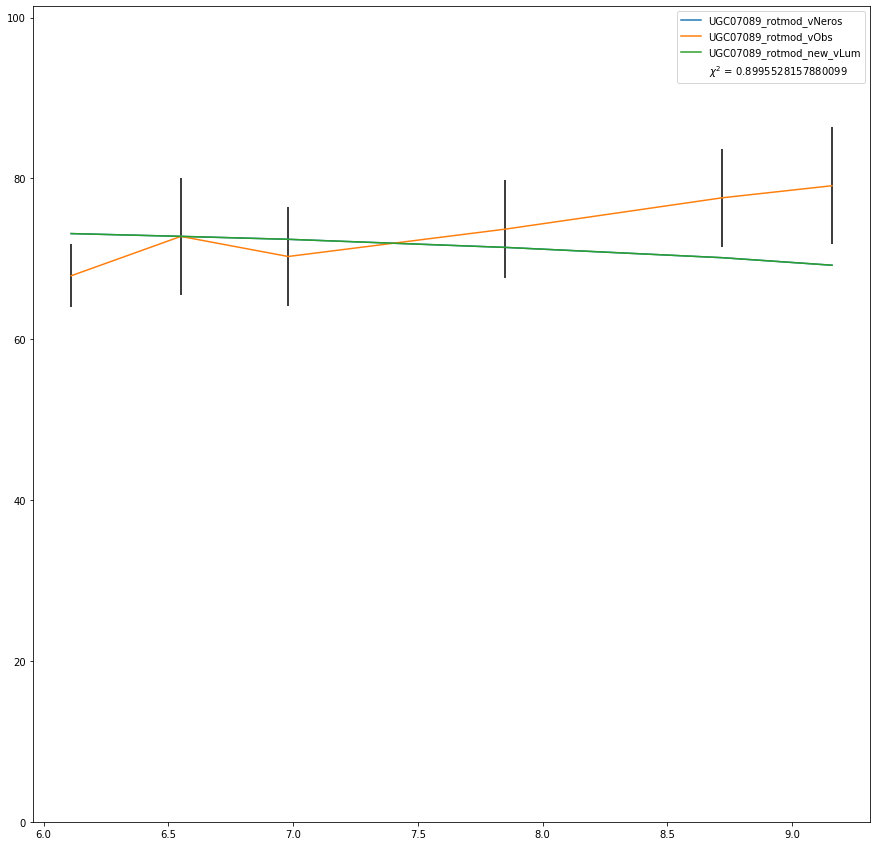

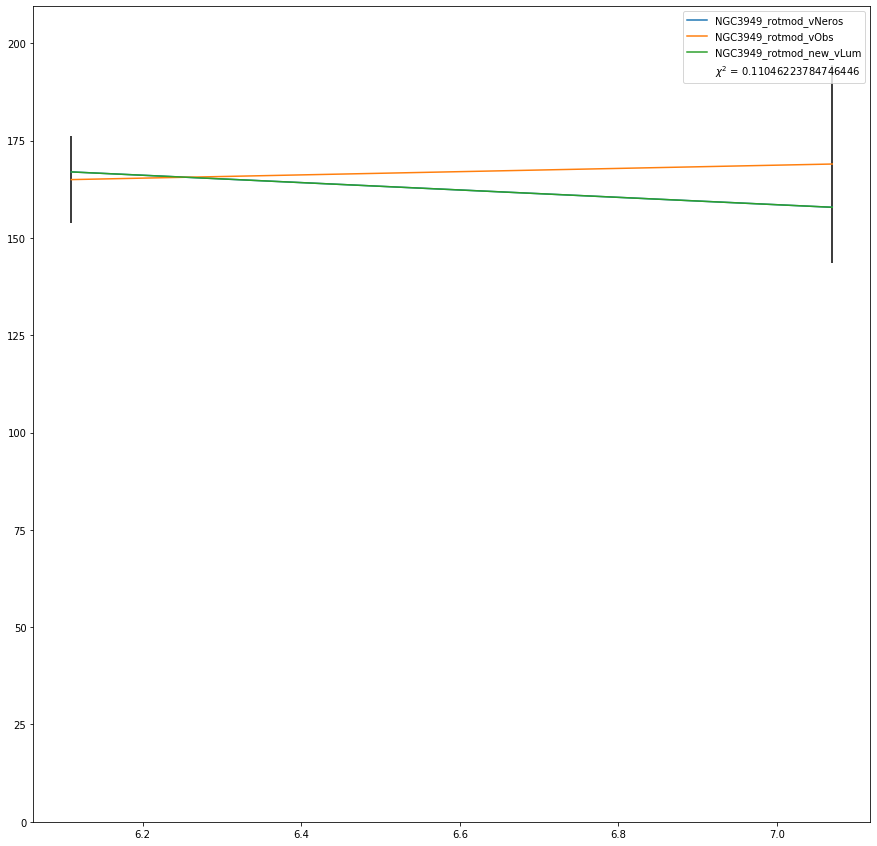

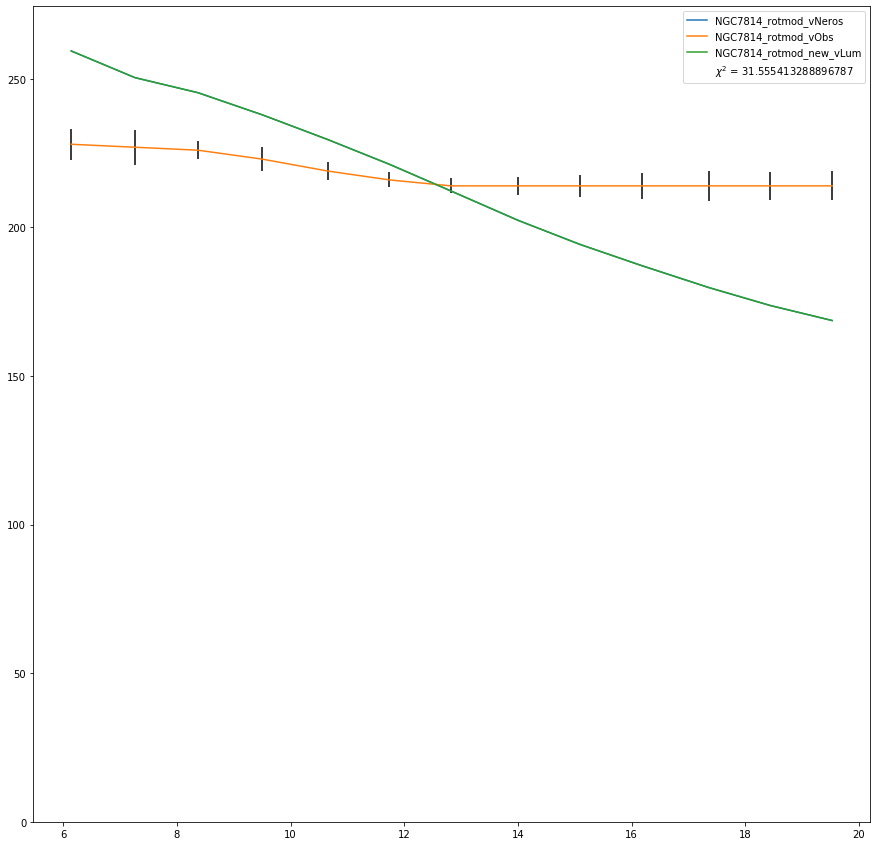

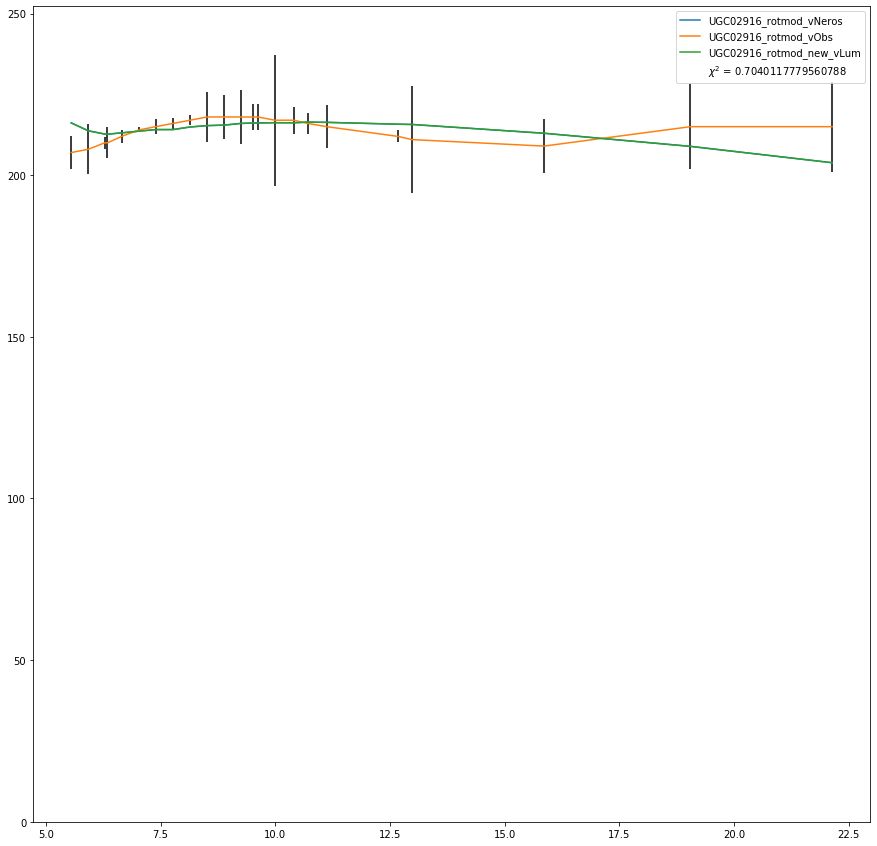

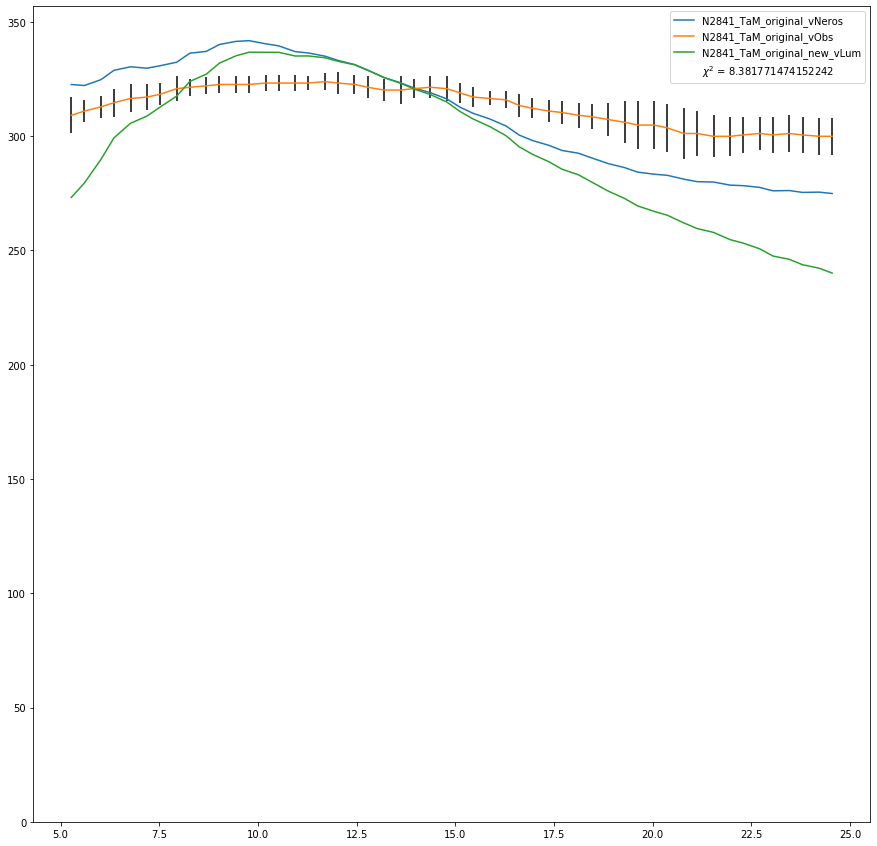

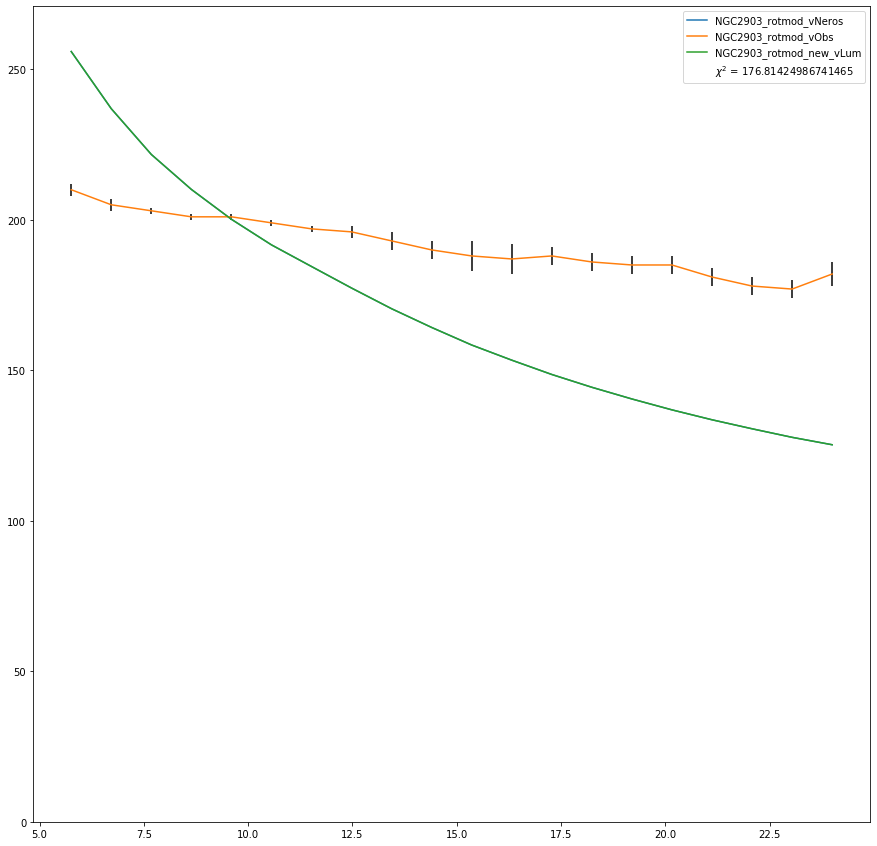

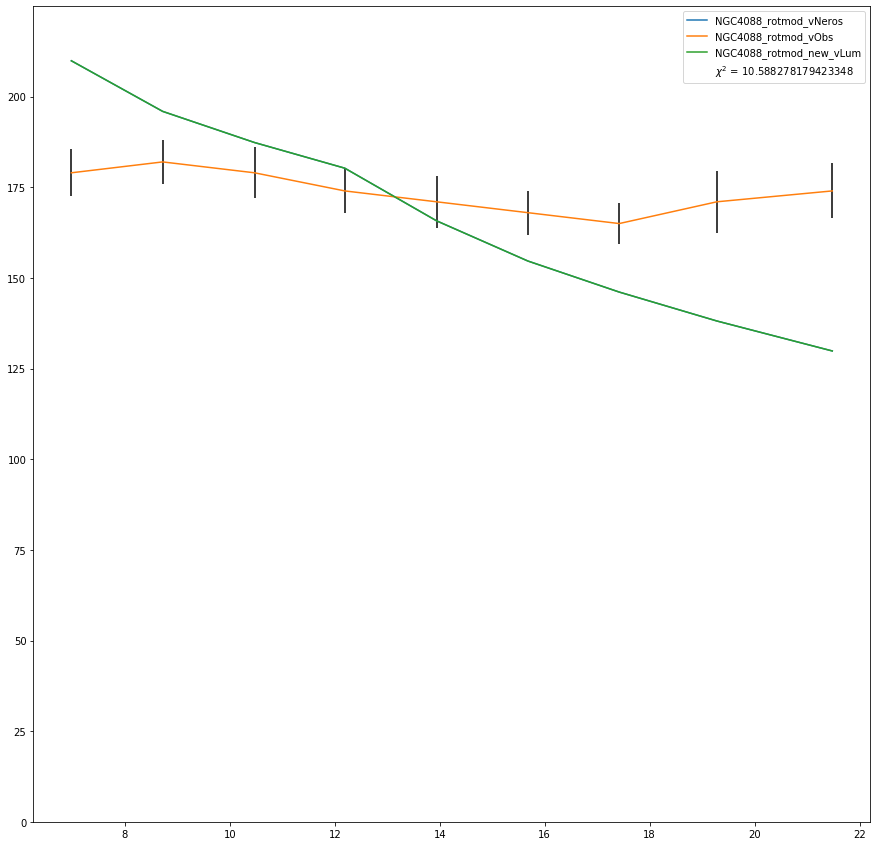

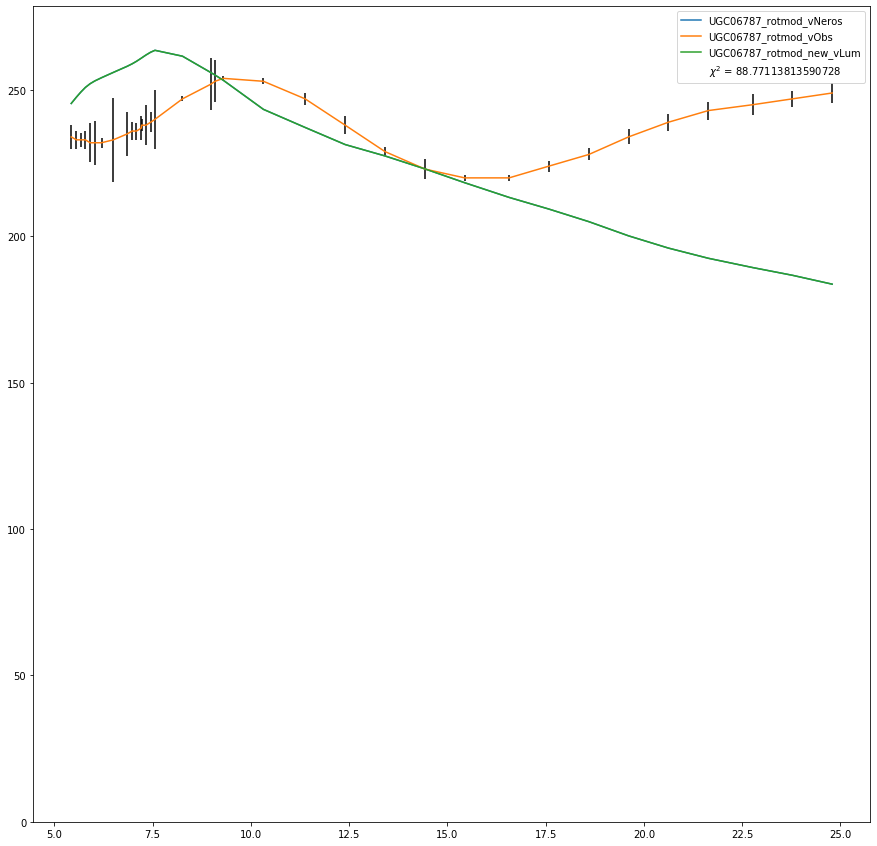

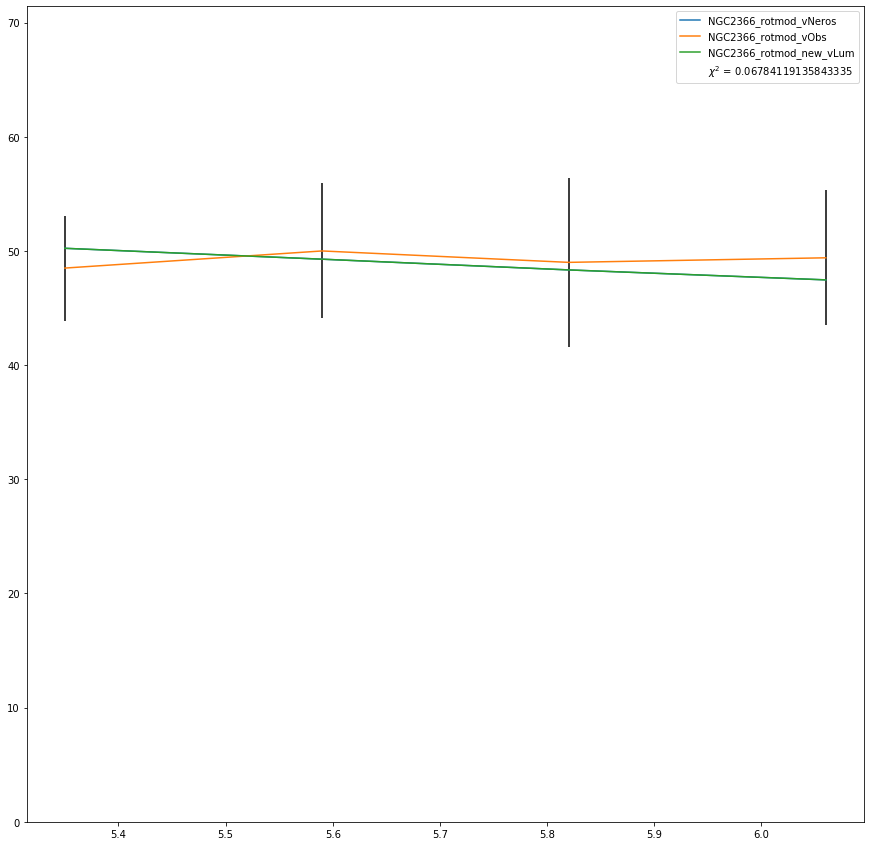

In [10]:
"""
This is the main body of the model. 
It loops through galaxies in the designated sample,
it calculates vLCM, vNeros, and chiSquared,
it fits galaxy data using alpha and vLumFreeParam,
it prints the values of alpha and vLumFreeParam to the console,
and it saves the graphs to a file.
"""

# This is where the fitted alpha & vlum free parameter will be written for each galaxy
out_file = "imported-data/data_" + str(MW_name) + ".csv"
with open(out_file, 'w') as f:
    f.write('{0},{1},{2},{3},{4},{5}\n'.format("Galaxy", "chi_square",  "alpha", "disk_scale", "bulge_scale","phi_zero"))
f.close()

total_chi_squared = []

# Initialize variables to track number of failed fits
error_count=0 # number of failed fits
error_galaxies=[] # The names of galaxies whose fits failed

for galaxyName in galaxies:
    try:
        f, ax = plt.subplots(1, figsize = (15, 15))

        # Extract out the needed galaxy components
        galaxy = np.array(galaxies[galaxyName])
        galaxy_rad = galaxy[:,0]
        galaxy_vObs = galaxy[:,1]
        galaxy_error = galaxy[:,2]
        galaxy_gas = galaxy[:,3]
        galaxy_disk = galaxy[:,4]
        galaxy_bulge = galaxy[:,5]

        # Just fit then extract the relevant pieces
        neros_fns.fit(galaxy_rad, galaxy_gas, galaxy_disk, galaxy_bulge, galaxy_vObs, galaxy_error)

        print(f"galaxyName is: {galaxyName}")
        fit_results = neros_fns.get_fit_results(galaxy_rad)
        for param in fit_results:
            print(f"{param} is: {fit_results[param]}")
        print("--------------------------")

        total_chi_squared.append(fit_results['chi_squared'])

        print("Running average chi_squared: {}".format(sum(total_chi_squared)/len(total_chi_squared)))


        # Write galaxyName, fitted parameters
        with open(out_file, 'a') as f:
            f.write(f"{galaxyName},{fit_results['chi_squared']},{fit_results['alpha']}, \
                    {fit_results['disk_scale']},{fit_results['bulge_scale']},{fit_results['phi_zero']} \n")
        f.close()

        trimmed_rad = neros_fns.get_rad()
        trimmed_vLum_updated = neros_fns.get_vLum_scaled()
        trimmed_vObs = neros_fns.get_vObs()
        trimmed_error = neros_fns.get_vObsError()
        vNeros = neros_fns.get_vNeros()

        # plot
        # y-axis scales to the maximum velocity value in the list galaxy_vObs_err_incl
        # or to the maximum value in the list vNeros, whichever is the bigger number
        y_max = max(max(trimmed_vObs + trimmed_error), max(vNeros))
        ax.set_ylim(bottom = 0, top = y_max + 15)

        # plot vObs and vNeros and updated vLum
        ax.plot(trimmed_rad, vNeros, label="{}_vNeros".format(galaxyName))
        ax.plot(trimmed_rad, trimmed_vObs, label="{}_vObs".format(galaxyName))
        ax.plot(trimmed_rad, trimmed_vLum_updated, label="{}_new_vLum".format(galaxyName))
        ax.plot([],[], ' ', label="$\chi^2$ = {}".format(fit_results['chi_squared']))

        # error bar in vObs
        for i in range(len(trimmed_rad)):
            ax.vlines(trimmed_rad[i], trimmed_vObs[i] - trimmed_error[i], trimmed_vObs[i] + trimmed_error[i])

        ax.legend(loc="upper right")

        graph_file_name = "graphs/" + str(galaxyName) + "_" + str(MW_name)

        plt.savefig(graph_file_name)

    except:
        print("!!!\nERROR FITTING GALAXY!\n The galaxy radii are out of range of the milky way model\n!!!")
        error_count += 1
        error_galaxies.append(galaxyName)
        print("--------------------------")
        plt.close()
        continue


In [8]:
error_count

31

In [9]:
error_galaxies

['UGC07603_rotmod',
 'UGC02023_rotmod',
 'UGC07232_rotmod',
 'NGC4068_rotmod',
 'D564-8_rotmod',
 'DDO168_rotmod',
 'UGC05918_rotmod',
 'NGC2976_rotmod',
 'UGC09992_rotmod',
 'D512-2_rotmod',
 'UGC04483_rotmod',
 'UGC03580_rotmod',
 'ESO444-G084_rotmod',
 'NGC6789_rotmod',
 'UGC07559_rotmod',
 'PGC51017_rotmod',
 'UGC07577_rotmod',
 'DDO064_rotmod',
 'UGC06923_rotmod',
 'UGC05764_rotmod',
 'UGC08837_rotmod',
 'UGC07866_rotmod',
 'UGC07608_rotmod',
 'UGCA444_rotmod',
 'KK98-251_rotmod',
 'UGC02455_rotmod',
 'UGCA281_rotmod',
 'CamB_rotmod',
 'UGC01281_rotmod',
 'UGC05414_rotmod',
 'UGC07690_rotmod']